# 1. Executive Summary
---

## 1.1. Purpose and Audience

This notebook provides a hands-on guide for building **temporally-aware knowledge graphs** and performing **multi-hop retrieval directly over those graphs**. 

It's designed for engineers, architects, and analysts working on temporally-aware knowledge graphs. Whether you’re prototyping, deploying at scale, or exploring new ways to use structured data, you’ll find practical workflows, best practices, and decision frameworks to accelerate your work.

This cookbook presents two hands-on workflows you can use, extend, and deploy right away:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Temporally-aware knowledge graph (KG) construction</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      A key challenge in developing knowledge-driven AI systems is maintaining a database that stays current and relevant. While much attention is given to boosting retrieval accuracy with techniques like semantic similarity and re-ranking, this guide focuses on a fundamental—yet frequently overlooked—aspect: <em>systematically updating and validating your knowledge base as new data arrives</em>.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      No matter how advanced your retrieval algorithms are, their effectiveness is limited by the quality and freshness of your database. This cookbook demonstrates how to routinely validate and update knowledge graph entries as new data arrives, helping ensure that your knowledge base remains accurate and up to date.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Multi-hop retrieval using knowledge graphs</strong><br />
<p style="margin-top: 0.5em; margin-bottom: 0.5em;">
  Learn how to combine OpenAI models (such as o3, o4-mini, GPT-4.1, and GPT-4.1-mini) with structured graph queries via tool calls, enabling the model to traverse your graph in multiple steps across entities and relationships.
</p>
<p style="margin-top: 0.5em; margin-bottom: 0.5em;">
  This method lets your system answer complex, multi-faceted questions that require reasoning over several linked facts, going well beyond what single-hop retrieval can accomplish.
</p>
  </li>
</ol>

Inside, you'll discover:

* **Practical decision frameworks** for choosing models and prompting techniques at each stage
* **Plug-and-play code examples** for easy integration into your ML and data pipelines
* **Links to in-depth resources** on OpenAI tool use, fine-tuning, graph backend selection, and more
* **A clear path from prototype to production**, with actionable best practices for scaling and reliability

> **Note:** All benchmarks and recommendations are based on the best available models and practices as of June 2025. As the ecosystem evolves, periodically revisit your approach to stay current with new capabilities and improvements.

## 1.2. Key takeaways

### Creating a Temporally-Aware Knowledge Graph with a Temporal Agent
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Why make your knowledge graph temporal?</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
     Traditional knowledge graphs treat facts as static, but real-world information evolves constantly. What was true last quarter may be outdated today, risking errors or misinformed decisions if the graph does not capture change over time. Temporal knowledge graphs allow you to precisely answer questions like “What was true on a given date?” or analyse how facts and relationships have shifted, ensuring decisions are always based on the most relevant context.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>What is a Temporal Agent?</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      A Temporal Agent is a pipeline component that ingests raw data and produces time-stamped triplets for your knowledge graph. This enables precise time-based querying, timeline construction, trend analysis, and more.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>How does the pipeline work?</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The pipeline starts by semantically chunking your raw documents. These chunks are decomposed into statements ready for our Temporal Agent, which then creates time-aware triplets. An Invalidation Agent can then perform temporal validity checks, spotting and handling any statements that are invalidated by new statements that are incident on the graph.
    </p>
  </li>
</ol>

### Multi-Step Retrieval Over a Knowledge Graph
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Why use multi-step retrieval?</strong><br />
<p style="margin-top: 0.5em; margin-bottom: 0.5em;">
  Direct, single-hop queries frequently miss salient facts distributed across a graph's topology. Multi-step (multi-hop) retrieval enables iterative traversal, following relationships and aggregating evidence across several hops. This methodology surfaces complex dependencies and latent connections that would remain hidden with one-shot lookups, providing more comprehensive and nuanced answers to sophisticated queries.
</p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Planners</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Planners orchestrate the retrieval process. <em>Task-orientated</em> planners decompose queries into concrete, sequential subtasks. <em>Hypothesis-orientated</em> planners, by contrast, propose claims to confirm, refute, or evolve. Choosing the optimal strategy depends on where the problem lies on the spectrum from deterministic reporting (well-defined paths) to exploratory research (open-ended inference).
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Tool Design Paradigms</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Tool design spans a continuum: <em>Fixed tools</em> provide consistent, predictable outputs for specific queries (e.g., a service that always returns today’s weather for San Francisco). At the other end, <em>Free-form tools</em> offer broad flexibility, such as code execution or open-ended data retrieval. <em>Semi-structured tools</em> fall between these extremes, restricting certain actions while allowing tailored flexibility—specialized sub-agents are a typical example. Selecting the appropriate paradigm is a trade-off between control, adaptability, and complexity.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Evaluating Retrieval Systems</strong><br />
<p style="margin-top: 0.5em; margin-bottom: 0.5em;">
  High-fidelity evaluation hinges on expert-curated "golden" answers, though these are costly and labor-intensive to produce. Automated judgments, such as those from LLMs or tool traces, can be quickly generated to supplement or pre-screen, but may lack the precision of human evaluation. As your system matures, transition towards leveraging real user feedback to measure and optimize retrieval quality in production.
</p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      A proven workflow: Start with synthetic tests, benchmark on your curated human-annotated "golden" dataset, and iteratively refine using live user feedback and ratings.
    </p>
  </li>
</ol>

### Prototype to Production
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Keep the graph lean</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Established archival policies and assign numeric relevance scores to each edge (e.g., recency x trust x query-frequency). Automate the archival or sparsification of low-value nodes and edges, ensuring only the most critical and frequently accessed facts remain for rapid retrieval.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Parallelize the ingestion pipeline</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Transition from a linear document → chunk → extraction → resolution pipeline to a staged, asynchronous architecture. Assign each processing phase its own queue and dedicated worker pool. Apply clustering or network-based batching for invalidation jobs to maximize efficiency. Batch external API requests (e.g., OpenAI) and database writes wherever possible. This design increases throughput, introduces backpressure for reliability, and allows you to scale each pipeline stage independently.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Integrate Robust Production Safeguards</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Enforce rigorous output validation: standardise temporal fields (e.g., ISO-8601 date formatting), constrain entity types to your controlled vocabulary, and apply lightweight model-based sanity checks for output consistency. Employ structured logging with traceable identifiers and monitor real-time quality and performance metrics in real lime to proactively detect data drift, regressions, or pipeline anomalised before they impact downstream applications.
    </p>
  </li>
</ol>

# 2. How to Use This Cookbook
---

This cookbook is designed for flexible engagement:

1. Use it as a comprehensive technical guide—read from start to finish for a deep understanding of temporally-aware knowledge graph systems.
2. Skim for advanced concepts, methodologies, and implementation patterns if you prefer a high-level overview.
3. Jump into any of the three modular sections; each is self-contained and directly applicable to real-world scenarios.

Inside, you'll find:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Creating a Temporally-Aware Knowledge Graph with a Temporal Agent</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Build a pipeline that extracts entities and relations from unstructured text, resolves temporal conflicts, and keeps your graph up-to-date as new information arrives.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Multi-Step Retrieval Over a Knowledge Graph</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Use structured queries and language model reasoning to chain multiple hops across your graph and answer complex questions.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Prototype to Production</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Move from experimentation to deployment. This section covers architectural tips, integration patterns, and considerations for scaling reliably.
    </p>
  </li>
</ol>


## 2.1. Pre-requisites

Before diving into building temporal agents and knowledge graphs, let's set up your environment. Install all required dependencies with pip, and set your OpenAI API key as an environment variable. Python 3.12 or later is required.

In [10]:
!python -V
%pip install --upgrade pip
%pip install -qU chonkie datetime ipykernel jinja2 matplotlib networkx numpy openai plotly pydantic rapidfuzz scipy tenacity tiktoken pandas
%pip install -q "datasets<3.0"

Python 3.12.8
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os

if "OPENAI_API_KEY" not in os.environ:
    import getpass
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Paste your OpenAI API key here: ")

# 3. Creating a Temporally-Aware Knowledge Graph with a Temporal Agent
---

**Accurate data is the foundation of any good business decision.** 
OpenAI’s latest models like o3, o4-mini, and the GPT-4.1 family are enabling businesses to build state-of-the-art retrieval systems for their most important workflows. However, information evolves rapidly: facts ingested confidently yesterday may already be outdated today.

<!-- ![Benefits of Temporal Knowledge Base](images/01_benefit_of_temporal_kb.jpg) -->
<img
  src="../../../images/01_benefit_of_temporal_kb.jpg"
  alt="Benefits of Temporal Knowledge Base"
  width="791"
  style="height:auto;"
/>

Without the ability to track when each fact was valid, retrieval systems risk returning answers that are outdated, non-compliant, or misleading. The consequences of missing temporal context can be severe in any industry, as illustrated by the following examples.

<table>
  <thead>
    <tr>
      <th>Industry</th>
      <th>Example question</th>
      <th>Risk if database is not temporal</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="3"><strong>Financial Services</strong></td>
      <td><em>"How has Moody’s long‑term rating for Bank YY evolved since Feb 2023?"</em></td>
      <td>Mispricing credit risk by mixing historical & current ratings</td>
    </tr>
    <tr>
      <td><em>"Who was the CFO of Retailer ZZ when the FY‑22 guidance was issued?"</em></td>
      <td>Governance/insider‑trading analysis may blame the wrong executive</td>
    </tr>
    <tr>
      <td><em>"Was Fund AA sanctioned under Article BB at the time it bought Stock CC in Jan 2024?"</em></td>
      <td>Compliance report could miss an infraction if rules changed later</td>
    </tr>
    <tr>
      <td rowspan="3"><strong>Manufacturing / Automotive</strong></td>
      <td><em>"Which ECU firmware was deployed in model Q3 cars shipped between 2022‑05 and 2023‑03?"</em></td>
      <td>Misdiagnosing field failures due to firmware drift</td>
    </tr>
    <tr>
      <td><em>"Which robot‑controller software revision ran on Assembly Line 7 during Lot 8421?"</em></td>
      <td>Root‑cause analysis may blame the wrong software revision</td>
    </tr>
    <tr>
      <td><em>"What torque specification applied to steering‑column bolts in builds produced in May 2024?"</em></td>
      <td>Safety recall may miss affected vehicles</td>
    </tr>
  </tbody>
</table>


While we've called out some specific examples here, this theme is true across many industries including pharmaceuticals, law, consumer goods, and more.

**Looking beyond standard retrieval**

A temporally-aware knowledge graph allows you to go beyond static fact lookup. It enables richer retrieval workflows such as factual Q&A grounded in time, timeline generation, change tracking, counterfactual analysis, and more. We dive into these in more detail in our retrieval section later in the cookbook.

<!-- ![Question types suitable for temporal knowledge bases](./images/02_question_types_for_temporal_kbs.jpg) -->
<img
  src="../../../images/02_question_types_for_temporal_kbs.jpg"
  alt="Question types suitable for temporal knowledge bases"
  style="width:1091px; height:auto;"
/>

## 3.1. Introducing our Temporal Agent
---

A **temporal agent** is a specialized pipeline that converts raw, free-form statements into time-aware triplets ready for ingesting into a knowledge graph that can then be queried with the questions of the character *“What was true at time T?”*. 

Triplets are the basic building blocks of knowledge graphs. It's a way to represent a single fact or piece of knowledge using three parts (hence, *"triplet"*): 
- **Subject** - the entity you are talking about
- **Predicate** - the type of relationship or property
- **Object** - the value or other entity that the subject is connected to

You can thinking of this like a sentence with a structure `[Subject] - [Predicate] - [Object]`. As a more clear example:
```
"London" - "isCapitalOf" - "United Kingdom"
```

The Temporal Agent implemented in this cookbook draws inspiration from [Zep](https://arxiv.org/abs/2501.13956) and [Graphiti](https://github.com/getzep/graphiti), while introducing tighter control over fact invalidation and a more nuanced approach to episodic typing.

### 3.1.1. Key enhancements introduced in this cookbook

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Temporal validity extraction</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Builds on Graphiti's prompt design to identify temporal spans and episodic context without requiring auxiliary reference statements.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Fact invalidation logic</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Introduces bidirectionality checks and constrains comparisons by episodic type. This retains Zep's non-lossy approach while reducing unnecessary evaluations.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Temporal & episodic typing</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Differentiates between <code>Fact</code>, <code>Opinion</code>, <code>Prediction</code>, as well as between temporal classes <code>Static</code>, <code>Dynamic</code>, <code>Atemporal</code>.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Multi‑event extraction</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Handles compound sentences and nested date references in a single pass.
    </p>
  </li>
</ol>



This process allows us to update our sources of truth efficiently and reliably:

<br>

<!-- ![Statement Invalidation in practice](./images/03_statement_invalidation.png) -->
<img
  src="../../../images/03_statement_invalidation.png"
  alt="Statement Invalidation in practice"
  style="width:791px; height:auto;"
/>

> **Note**: While the implementation in this cookbook is focused on a graph-based implementation, this approach is generalizable to other knowledge base structures e.g., pgvector-based systems.
---

### 3.1.2. The Temporal Agent Pipeline

The Temporal Agent processes incoming statements through a three-stage pipeline:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Temporal Classification</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Labels each statement as <strong>Atemporal</strong>, <strong>Static</strong>, or <strong>Dynamic</strong>:
    </p>
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1em;">
      <li style="margin-bottom: 0.5em;"><em>Atemporal</em> statements never change (e.g., “The speed of light in a vaccuum is ≈3×10⁸ m s⁻¹”).</li>
      <li style="margin-bottom: 0.5em;"><em>Static</em> statements are valid from a point in time but do not change afterwards (e.g., "Person YY was CEO of Company XX on October 23rd 2014.").</li>
      <li><em>Dynamic</em> statements evolve (e.g., "Person YY is CEO of Company XX.").</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Temporal Event Extraction</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Identifies relative or partial dates (e.g., “Tuesday”, “three months ago”) and resolves them to an absolute date using the document timestamp or fallback heuristics (e.g., default to the 1st or last of the month if only the month is known).
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Temporal Validity Check</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Ensures every statement includes a <code>t_created</code> timestamp and, when applicable, a <code>t_expired</code> timestamp. The agent then compares the candidate triplet to existing knowledge graph entries to:
    </p>
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1em;">
      <li style="margin-bottom: 0.5em;">Detect contradictions and mark outdated entries with <code>t_invalid</code></li>
      <li style="margin-bottom: 0.5em;">Link newer statements to those they invalidate with <code>invalidated_by</code></li>
    </ul>
  </li>
</ol>




<!-- 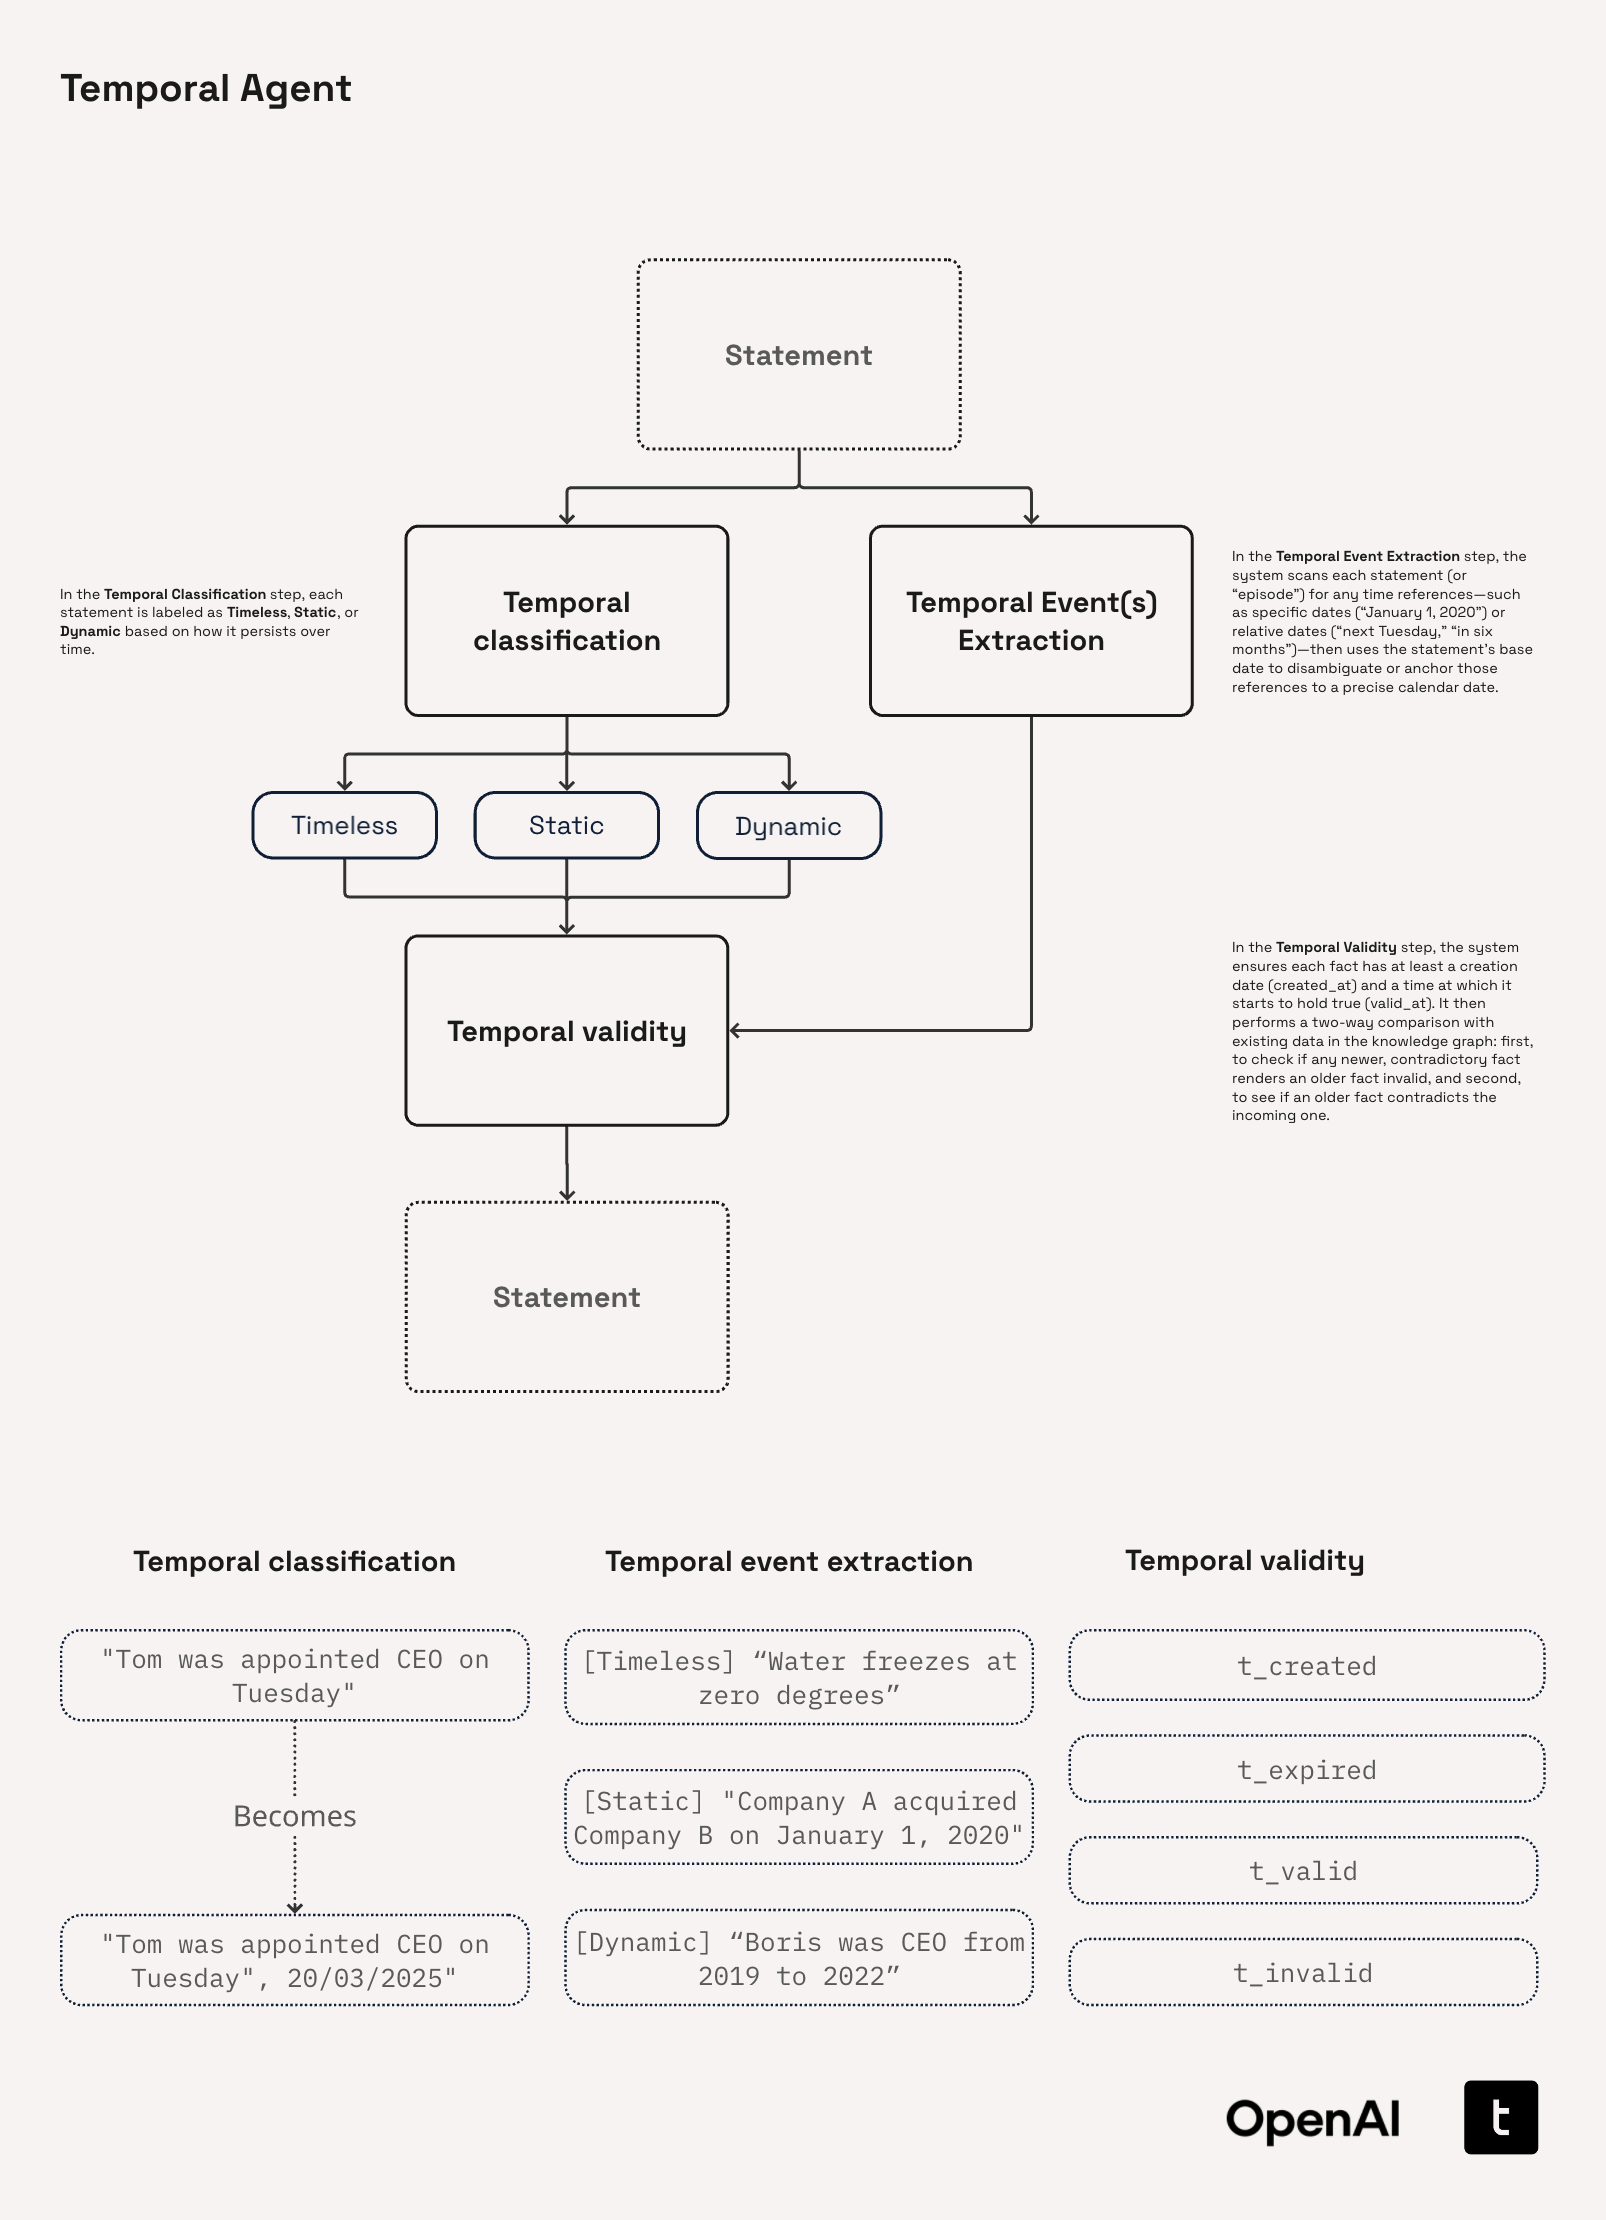 -->
<img
  src="../../../images/04_temporal_agent.png"
  alt="Temporal Agent"
  style="width:809px; height:auto;"
/>

### 3.1.3. Selecting the right model for a Temporal Agent
When building systems with LLMs, it is a good practice to [start with larger models then later look to optimize and shrink](https://platform.openai.com/docs/guides/model-selection). 

The GPT-4.1 series is particularly well-suited for building Temporal Agents due to its strong instruction-following ability. On benchmarks like Scale’s MultiChallenge, [GPT-4.1 outperforms GPT-4o by $10.5\%_{abs}$](https://openai.com/index/gpt-4-1/), demonstrating superior ability to maintain context, reason in-conversation, and adhere to instructions - key traits for extracting time-stamped triplets. These capabilities make it an excellent choice for prototyping agents that rely on time-aware data extraction.

#### Recommended development workflow
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Prototype with GPT-4.1</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Maximize correctness and reduce prompt-debug time while you build out the core pipeline logic.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Swap to GPT-4.1-mini or GPT-4.1-nano</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Once prompts and logic are stable, switch to smaller variants for lower latency and cost-effective inference.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Distill onto GPT-4.1-mini or GPT-4.1-nano</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Use <a href="https://platform.openai.com/docs/guides/distillation" target="_blank">OpenAI's Model Distillation</a> to train smaller models with high-quality outputs from a larger 'teacher' model such as GPT-4.1, preserving (or even improving) performance relative to GPT-4.1.
    </p>
  </li>
</ol>



| Model                    | Relative cost | Relative latency  | Intelligence | Ideal Role in Workflow                   |
| ----------------------- | ------ | -------- | - |------------------------------ |
| *GPT-4.1*      | ★★★ | ★★ | ★★★ *(highest)* | Ground-truth prototyping, generating data for distillation |
| *GPT-4.1-mini*             | ★★  | ★     | ★★ | Balanced cost-performance, mid to large scale production systems |
| *GPT-4.1-nano*        | ★ *(lowest)*    | ★ *(fastest)*     | ★ | Cost-sensitive and ultra-large scale bulk processing |

> In practice, this looks like: prototype with GPT-4.1 → measure quality → step down the ladder until the trade-offs no longer meet your needs.

## 3.2. Building our Temporal Agent Pipeline
---
Before diving into the implementation details, it's useful to understand the ingestion pipeline at a high level:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Load transcripts</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Creating a Semantic Chunker</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Laying the Foundations for our Temporal Agent</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Statement Extraction</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Temporal Range Extraction</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Creating our Triplets</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Temporal Events</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Defining our Temporal Agent</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Entity Resolution</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Invalidation Agent</strong><br />
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Building our pipeline</strong><br />
  </li>
</ol>

### Architecture diagram

<!-- 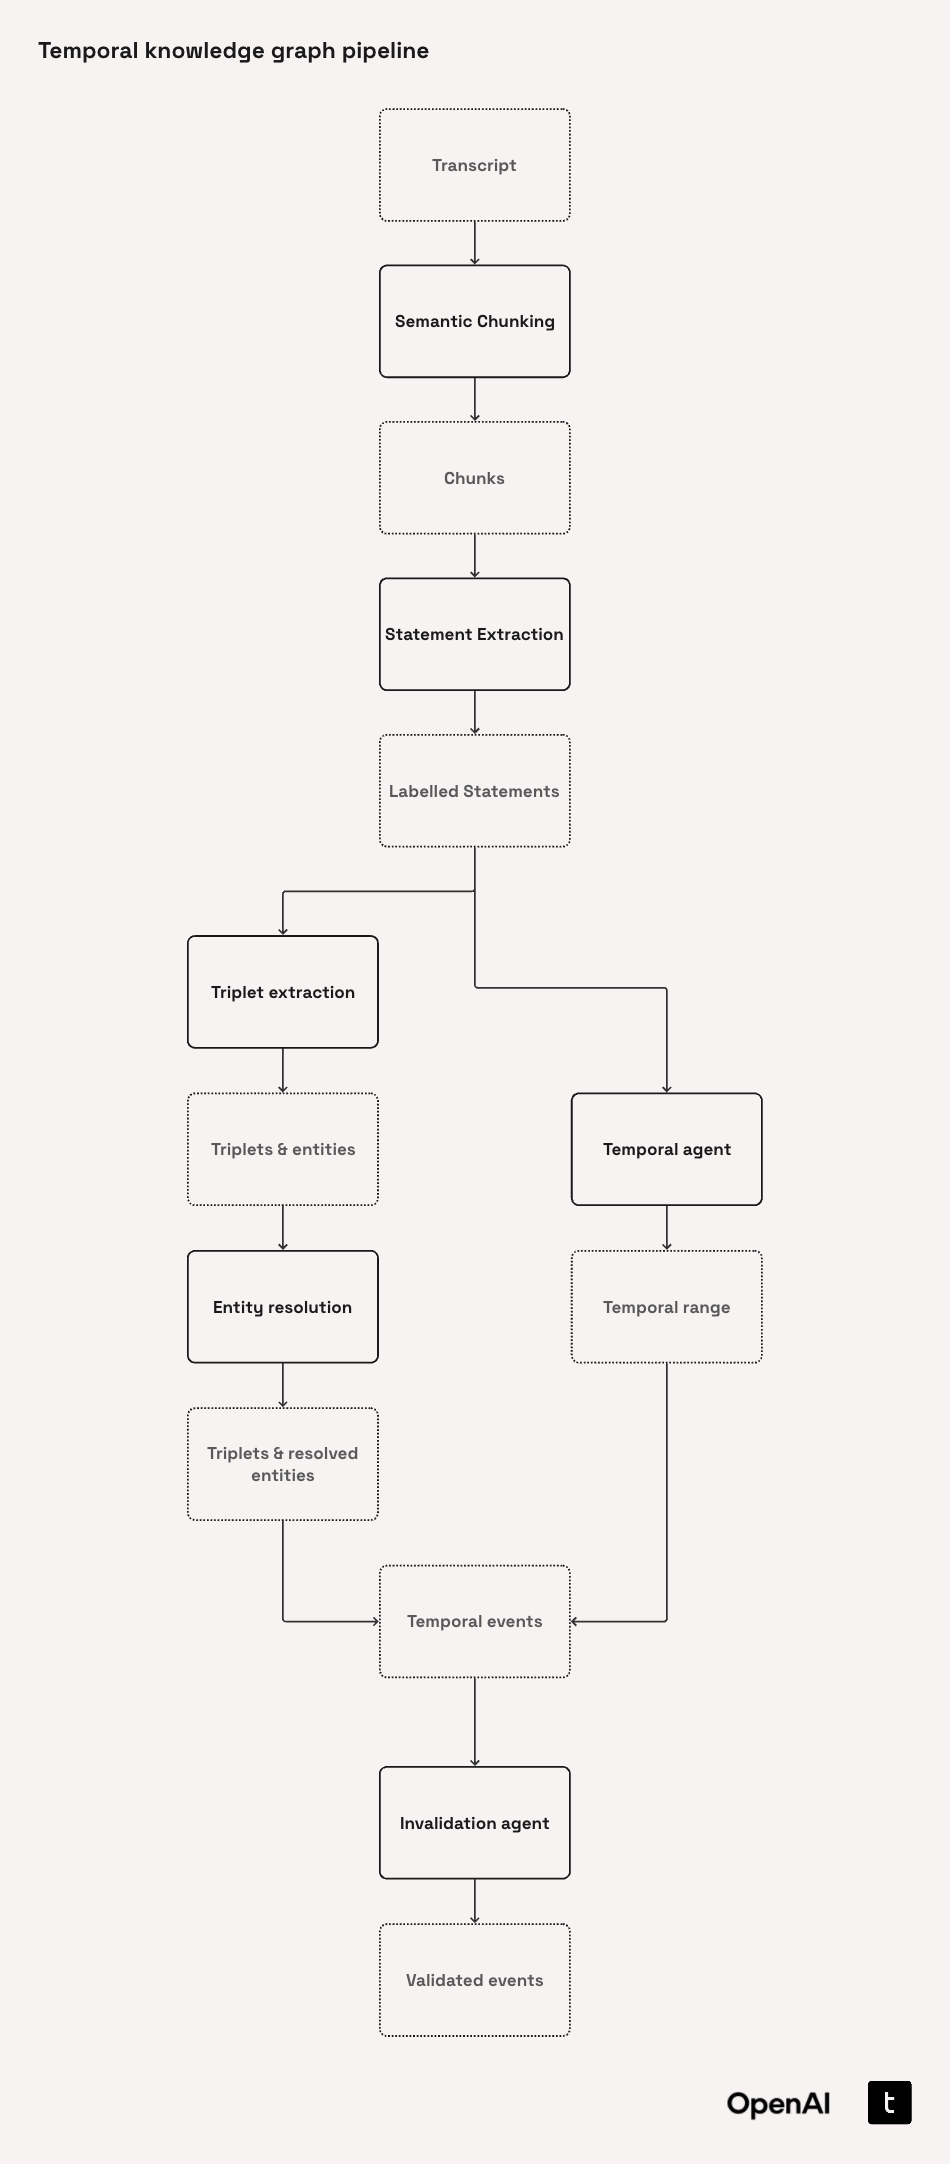 -->
<img
  src="../../../images/05_temporal_agent_arch.png"
  alt="Temporal Agent Architecture"
  style="width:791px; height:auto;"
/>

### 3.2.1. Load transcripts
For the purposes of this cookbook, we have selected the ["Earnings Calls Dataset" (jlh-ibm/earnings_call)](https://huggingface.co/datasets/jlh-ibm/earnings_call) which is made available under the Creative Commons Zero v1.0 license. This dataset contains a collection of 188 earnings call transcripts originating in the period 2016-2020 in relation to the NASDAQ stock market. We believe this dataset is a good choice for this cookbook as extracting information from - and subsequently querying information from - earnings call transcripts is a common problem in many financial institutions around the world. 

Moreover, the often variable character of statements and topics from the same company across multiple earnings calls provides a useful vector through which to demonstrate the temporal knowledge graph concept. 

Despite this dataset's focus on the financial world, we build up the Temporal Agent in a general structure, so it will be quick to adapt to similar problems in other industries such as pharmaceuticals, law, automotive, and more. 

For the purposes of this cookbook we are limiting the processing to two companies - AMD and Nvidia - though in practice this pipeline can easily be scaled to any company. 

Let’s start by loading the dataset from HuggingFace.

In [7]:
from datasets import load_dataset

hf_dataset_name = "jlh-ibm/earnings_call"
subset_options = ["stock_prices", "transcript-sentiment", "transcripts"]

hf_dataset = load_dataset(hf_dataset_name, subset_options[2])
my_dataset = hf_dataset["train"]

In [8]:
my_dataset

Dataset({
    features: ['company', 'date', 'transcript'],
    num_rows: 150
})

In [ ]:
row = my_dataset[0]
row["company"], row["date"], row["transcript"][:200]

In [ ]:
from collections import Counter

company_counts = Counter(my_dataset["company"])
company_counts

**Database Set-up**


Before we get to processing this data, let’s set up our database. 

For convenience within a notebook format, we've chosen SQLite as our database for this implementation. In the "Prototype to Production" section, and in [Appendix section A.1 "Storing and Retrieving High-Volume Graph Data"](./Appendix.ipynb) we go into more detail of considerations around different dataset choices in a production environment. 

If you are running this cookbook locally, you may chose to set `memory = False` to save the database to storage, the default file path `my_database.db` will be used to store your database or you may pass your own `db_path` arg into `make_connection`.

We will set up several tables to store the following information:
- Transcripts
- Chunks
- Temporal Events
- Triplets
- Entities (including canonical mappings)

This code is abstracted behind a `make_connection` method which creates the new SQLite database. The details of this method can be found in the `db_interface.py` script in the GitHub repository for this cookbook.

In [ ]:
from db_interface import make_connection

sqlite_conn = make_connection(memory=False, refresh=True)

### 3.2.2. Creating a Semantic Chunker

Before diving into buidling the `Chunker` class itself, we begin by defining our first data models. As is generally considered good practice when working with Python, [Pydantic](https://docs.pydantic.dev/latest/) is used to ensure type safety and clarity in our model definitions. Pydantic provides a clean, declarative way to define data structures whilst automatically validating and parsing input data, making our data models both robust and easy to work with.

#### Chunk model
This is a core data model that we'll use to store individual segments of text extracted from transcripts, along with any associated metadata. As we process the transcripts by breaking them into semantically meaningful chunks, each piece will be saved as a separate `Chunk`.

Each `Chunk` contains:
- `id`: A unique identifier automatically generated for each chunk. This helps us identify and track chunks of text throughout
- `text`: A string field that contains the text content of the chunk
- `metadata`: A dictionary to allow for flexible metadata storage

In [ ]:
import uuid
from typing import Any

from pydantic import BaseModel, Field


class Chunk(BaseModel):
    """A chunk of text from an earnings call."""

    id: uuid.UUID = Field(default_factory=uuid.uuid4)
    text: str
    metadata: dict[str, Any]

#### Transcript model
As the name suggests, we will use the `Transcript` model to represent the full content of an earnings call transcript. It captures several key pieces of information:
- `id`: Analogous to `Chunk`, this gives us a unique identifier
- `text`: The full text of the transcript
- `company`: The name of the company that the earnings call was about
- `date`: The date of the earnings call
- `quarter`: The fiscal quarter that the earnings call was in
- `chunks`: A list of `Chunk` objects, each representing a meaningful segment of the full transcript

To ensure the `date` field is handled correctly, the `to_datetime` validator is used to convert the value to datetime format. 

In [ ]:
from datetime import datetime

from pydantic import field_validator


class Transcript(BaseModel):
    """A transcript of a company earnings call."""

    id: uuid.UUID = Field(default_factory=uuid.uuid4)
    text: str
    company: str
    date: datetime
    quarter: str | None = None
    chunks: list[Chunk] | None = None

    @field_validator("date", mode="before")
    @classmethod
    def to_datetime(cls, d: Any) -> datetime:
        """Convert input to a datetime object."""
        if isinstance(d, datetime):
            return d
        if hasattr(d, "isoformat"):
            return datetime.fromisoformat(d.isoformat())
        return datetime.fromisoformat(str(d))

#### Chunker class

Now, we define the `Chunker` class to split each transcript into semantically meaningful chunks. Instead of relying on arbitrary rules like character count or line break, we apply semantic chunking to preserve more of the contextual integrity of the original transcript. This ensures that each chunk is a self-contained unit that keeps contextually linked ideas together. This is particularly helpful for downstream tasks like statement extraction, where context heavily influences accuracy.

The chunker class contains two methods:

- `find_quarter`

  This method attempts to extract the fiscal quarter (e.g., "Q1 2023") directly from the transcript text using a simple regular expression. In this case, this is straightforward as the data format of quarters in the transcripts is consistent and well defined.

  However, in real world scenarios, detecting the quarter reliably may require more work. Across multiple sources or document types the detailing of the quarter is likely to be different. LLMs are great tools to help alleviate this issue. Try using GPT-4.1-mini with a prompt specifically to extract the quarter given wider context from the document. 

- `generate_transcripts_and_chunks`

  This is the core method that takes in a dataset (as an iterable of dictionaries) and returns a list of `Transcript` objects each populated with semantically derived `Chunk`s. It performs the following steps:

  1. *Transcript creation*: Initializes `Transcript` objects using the provided text, company, and date fields
  2. *Filtering*: Uses the `SemanticChunker` from [chonkie](https://chonkie.ai/) along with OpenAI's text-embedding-3-small model to split the transcript into logical segments
  3. *Chunk assignment*: Wraps each semantic segment into a `Chunk` model, attaching relevant metadata like start and end indices

The chunker falls in to this part of our pipeline:

<!-- 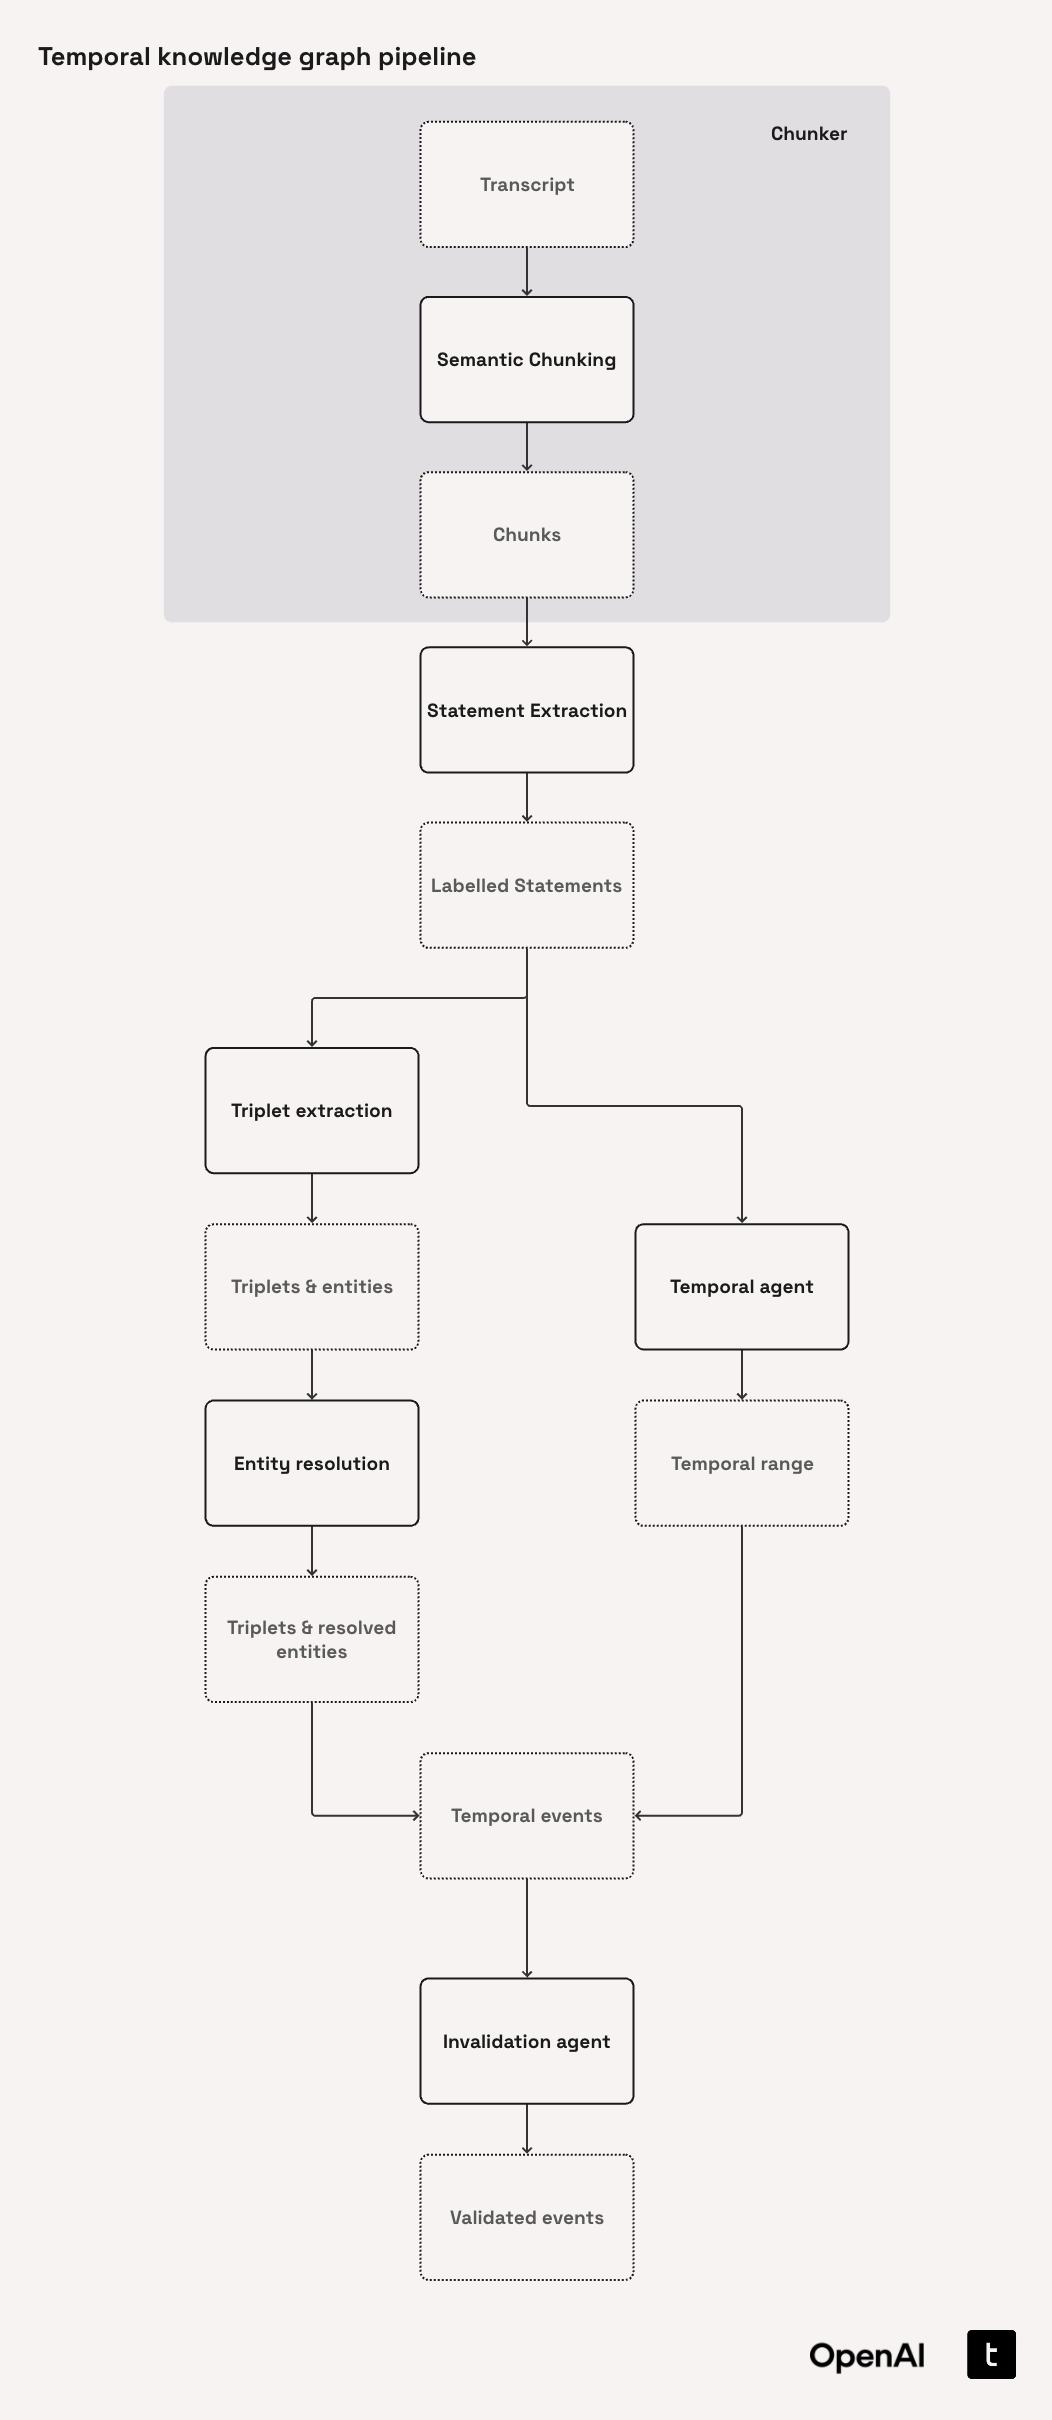 -->
<img
  src="../../../images/06_temporal_agent_chunker.png"
  alt="Temporal Agent Pipeline - Chunker"
  style="width:791px; height:auto;"
/>

In [ ]:
import re
from concurrent.futures import ThreadPoolExecutor, as_completed
from typing import Any

from chonkie import OpenAIEmbeddings, SemanticChunker
from tqdm import tqdm


class Chunker:
    """
    Takes in transcripts of earnings calls and extracts quarter information and splits
    the transcript into semantically meaningful chunks using embedding-based similarity.
    """

    def __init__(self, model: str = "text-embedding-3-small"):
        self.model = model

    def find_quarter(self, text: str) -> str | None:
        """Extract the quarter (e.g., 'Q1 2023') from the input text if present, otherwise return None."""
        # In this dataset we can just use regex to find the quarter as it is consistently defined
        search_results = re.findall(r"[Q]\d\s\d{4}", text)

        if search_results:
            quarter = str(search_results[0])
            return quarter

        return None


    def generate_transcripts_and_chunks(
        self,
        dataset: Any,
        company: list[str] | None = None,
        text_key: str = "transcript",
        company_key: str = "company",
        date_key: str = "date",
        threshold_value: float = 0.7,
        min_sentences: int = 3,
        num_workers: int = 50,
    ) -> list[Transcript]:
        """Populate Transcript objects with semantic chunks."""
        # Populate the Transcript objects with the passed data on the transcripts
        transcripts = [
            Transcript(
                text=d[text_key],
                company=d[company_key],
                date=d[date_key],
                quarter=self.find_quarter(d[text_key]),
            )
            for d in dataset
        ]

        if company:
            transcripts = [t for t in transcripts if t.company in company]

        def _process(t: Transcript) -> Transcript:
            if not hasattr(_process, "chunker"):
                embed_model = OpenAIEmbeddings(self.model)
                _process.chunker = SemanticChunker(
                    embedding_model=embed_model,
                    threshold=threshold_value,
                    min_sentences=max(min_sentences, 1),
                )
            semantic_chunks = _process.chunker.chunk(t.text)
            t.chunks = [
                Chunk(
                    text=c.text,
                    metadata={
                        "start_index": getattr(c, "start_index", None),
                        "end_index": getattr(c, "end_index", None),
                    },
                )
                for c in semantic_chunks
            ]
            return t

        # Create the semantic chunks and add them to their respective Transcript object using a thread pool
        with ThreadPoolExecutor(max_workers=num_workers) as pool:
            futures = [pool.submit(_process, t) for t in transcripts]
            transcripts = [
                f.result()
                for f in tqdm(
                    as_completed(futures),
                    total=len(futures),
                    desc="Generating Semantic Chunks",
                )
            ]

        return transcripts


In [ ]:
raw_data = list(my_dataset)

chunker = Chunker()
transcripts = chunker.generate_transcripts_and_chunks(raw_data)

Alternatively, we can load just the `AMD` and `NVDA` pre-chunked transcripts from pre-processed files in `transcripts/`

In [ ]:
import pickle
from pathlib import Path


def load_transcripts_from_pickle(directory_path: str = "transcripts/") -> list[Transcript]:
    """Load all pickle files from a directory into a dictionary."""
    loaded_transcripts = []
    dir_path = Path(directory_path).resolve()


    for pkl_file in sorted(dir_path.glob("*.pkl")):
        try:
            with open(pkl_file, "rb") as f:
                transcript = pickle.load(f)
                # Ensure it's a Transcript object
                if not isinstance(transcript, Transcript):
                    transcript = Transcript(**transcript)
                loaded_transcripts.append(transcript)
                print(f"✅ Loaded transcript from {pkl_file.name}")
        except Exception as e:
            print(f"❌ Error loading {pkl_file.name}: {e}")

    return loaded_transcripts

In [ ]:
# transcripts = load_transcripts_from_pickle()

Now we can inspect a couple of chunks:

In [ ]:
chunks = transcripts[0].chunks
if chunks is not None:
    for i, chunk in enumerate(chunks[21:23]):
        print(f"Chunk {i+21}:")
        print(f"  ID: {chunk.id}")
        print(f"  Text: {repr(chunk.text[:200])}{'...' if len(chunk.text) > 100 else ''}")
        print(f"  Metadata: {chunk.metadata}")
        print()
else:
    print("No chunks found for the first transcript.")

With this, we have successfully split our transcripts into semantically sectioned chunks. We can now move onto the next steps in our pipeline.

### 3.2.3. Laying the Foundations for our Temporal Agent

Before we move onto defining the `TemporalAgent` class, we will first define the prompts and data models that are needed for it to function.

#### Formalizing our label definitions 

For our temporal agent to be able to accurately extract the statement and temporal types we need to provide it with sufficiently detailed and specific context. For convenience, we define these within a structured format below. 

Each label contains three crucial pieces of information that we will later pass to our LLMs in prompts.
<ul style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <code>definition</code><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Provides a concise description of what the label represents. It establishes the conceptual boundaries of the statement or temporal type and ensures consistency in interpretation across examples.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <code>date_handling_guidance</code><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Explains how to interpret the temporal validity of a statement associated with the label. It describes how the <code>valid_at</code> and <code>invalid_at</code> dates should be derived when processing instances of that label.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <code>date_handling_examples</code><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Includes illustrative examples of how real-world statements would be labelled and temporally annotated under this label. These will be used as few-shot examples to the LLMs downstream.
    </p>
  </li>
</ul>


In [ ]:
LABEL_DEFINITIONS: dict[str, dict[str, dict[str, str]]] = {
    "episode_labelling": {
        "FACT": dict(
            definition=(
                "Statements that are objective and can be independently "
                "verified or falsified through evidence."
            ),
            date_handling_guidance=(
                "These statements can be made up of multiple static and "
                "dynamic temporal events marking for example the start, end, "
                "and duration of the fact described statement."
            ),
            date_handling_example=(
                "'Company A owns Company B in 2022', 'X caused Y to happen', "
                "or 'John said X at Event' are verifiable facts which currently "
                "hold true unless we have a contradictory fact."
            ),
        ),
        "OPINION": dict(
            definition=(
                "Statements that contain personal opinions, feelings, values, "
                "or judgments that are not independently verifiable. It also "
                "includes hypothetical and speculative statements."
            ),
            date_handling_guidance=(
                "This statement is always static. It is a record of the date the "
                "opinion was made."
            ),
            date_handling_example=(
                "'I like Company A's strategy', 'X may have caused Y to happen', "
                "or 'The event felt like X' are opinions and down to the reporters "
                "interpretation."
            ),
        ),
        "PREDICTION": dict(
            definition=(
                "Uncertain statements about the future on something that might happen, "
                "a hypothetical outcome, unverified claims. It includes interpretations "
                "and suggestions. If the tense of the statement changed, the statement "
                "would then become a fact."
            ),
            date_handling_guidance=(
                "This statement is always static. It is a record of the date the "
                "prediction was made."
            ),
            date_handling_example=(
                "'It is rumoured that Dave will resign next month', 'Company A expects "
                "X to happen', or 'X suggests Y' are all predictions."
            ),
        ),
    },
    "temporal_labelling": {
        "STATIC": dict(
            definition=(
                "Often past tense, think -ed verbs, describing single points-in-time. "
                "These statements are valid from the day they occurred and are never "
                "invalid. Refer to single points in time at which an event occurred, "
                "the fact X occurred on that date will always hold true."
            ),
            date_handling_guidance=(
                "The valid_at date is the date the event occurred. The invalid_at date "
                "is None."
            ),
            date_handling_example=(
                "'John was appointed CEO on 4th Jan 2024', 'Company A reported X percent "
                "growth from last FY', or 'X resulted in Y to happen' are valid the day "
                "they occurred and are never invalid."
            ),
        ),
        "DYNAMIC": dict(
            definition=(
                "Often present tense, think -ing verbs, describing a period of time. "
                "These statements are valid for a specific period of time and are usually "
                "invalidated by a Static fact marking the end of the event or start of a "
                "contradictory new one. The statement could already be referring to a "
                "discrete time period (invalid) or may be an ongoing relationship (not yet "
                "invalid)."
            ),
            date_handling_guidance=(
                "The valid_at date is the date the event started. The invalid_at date is "
                "the date the event or relationship ended, for ongoing events this is None."
            ),
            date_handling_example=(
                "'John is the CEO', 'Company A remains a market leader', or 'X is continuously "
                "causing Y to decrease' are valid from when the event started and are invalidated "
                "by a new event."
            ),
        ),
        "ATEMPORAL": dict(
            definition=(
                "Statements that will always hold true regardless of time therefore have no "
                "temporal bounds."
            ),
            date_handling_guidance=(
                "These statements are assumed to be atemporal and have no temporal bounds. Both "
                "their valid_at and invalid_at are None."
            ),
            date_handling_example=(
                "'A stock represents a unit of ownership in a company', 'The earth is round', or "
                "'Europe is a continent'. These statements are true regardless of time."
            ),
        ),
    },
}


### 3.2.4. Statement Extraction 

"Statement Extraction" refers to the process of splitting our semantic chunks into the smallest possible "atomic" facts. Within our Temporal Agent, this is achieved by: 

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Finding every standalone, declarative claim</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Extract statements that can stand on their own as complete subject-predicate-object expressions without relying on surrounding context.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Ensuring atomicity</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Break down complex or compound sentences into minimal, indivisible factual units, each expressing a single relationship.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Resolving references</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Replace pronouns or abstract references (e.g., "he" or "The Company") with specific entities (e.g., "John Smith", "AMD") using the main subject for disambiguation.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Preserving temporal and quantitative precision</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Retain explicit dates, durations, and quantities to anchor each fact precisely in time and scale.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Labelling each extracted statement</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Every statement is annotated with a <code>StatementType</code> and a <code>TemporalType</code>.
    </p>
  </li>
</ol>


#### Temporal Types

The `TemporalType` enum provides a standardized set of temporal categories that make it easier to classify and work with statements extracted from earnings call transcripts.

Each category captures a different kind of temporal reference:

* **Atemporal**: Statements that are universally true and invariant over time (e.g., “The speed of light in a vacuum is ≈3×10⁸ m s⁻¹.”).
* **Static**: Statements that became true at a specific point in time and remain unchanged thereafter (e.g., “Person YY was CEO of Company XX on October 23rd, 2014.”).
* **Dynamic**: Statements that may change over time and require temporal context to interpret accurately (e.g., “Person YY is CEO of Company XX.”).

In [ ]:
from enum import StrEnum


class TemporalType(StrEnum):
    """Enumeration of temporal types of statements."""

    ATEMPORAL = "ATEMPORAL"
    STATIC = "STATIC"
    DYNAMIC = "DYNAMIC"

#### Statement Types

Similarly, the `StatementType` enum classifies the nature of each extracted statement, capturing its epistemic characteristics.

* **Fact**: A statement that asserts a verifiable claim considered true at the time it was made. However, it may later be superseded or contradicted by other facts (e.g., updated information or corrections).
* **Opinion**: A subjective statement reflecting a speaker’s belief, sentiment, or judgment. By nature, opinions are considered temporally true at the moment they are expressed.
* **Prediction**: A forward-looking or hypothetical statement about a potential future event or outcome. Temporally, a prediction is assumed to hold true from the time of utterance until the conclusion of the inferred prediction window.

In [ ]:
class StatementType(StrEnum):
    """Enumeration of statement types for statements."""

    FACT = "FACT"
    OPINION = "OPINION"
    PREDICTION = "PREDICTION"

#### Raw Statement

The `RawStatement` model represents an individual statement extracted by an LLM, annotated with both its semantic type (`StatementType`) and temporal classification (`TemporalType`). These raw statements serve as intermediate representations and are intended to be transformed into `TemporalEvent` objects in later processing stages.

Core fields:
- `statement`: The textual content of the extracted statement
- `statement_type`: The type of statement (Fact, Opinion, Prediction), based on the `StatementType` enum
- `temporal_type`: The temporal classification of the statement (Static, Dynamic, Atemporal), drawn from the `TemporalType` enum

The model includes field-level validators to ensure that all type annotations conform to their respective enums, providing a layer of robustness against invalid input.

The companion model `RawStatementList` contains the output of the statement extraction step: a list of `RawStatement` instances.

In [ ]:
from pydantic import field_validator


class RawStatement(BaseModel):
    """Model representing a raw statement with type and temporal information."""

    statement: str
    statement_type: StatementType
    temporal_type: TemporalType

    @field_validator("temporal_type", mode="before")
    @classmethod
    def _parse_temporal_label(cls, value: str | None) -> TemporalType:
        if value is None:
            return TemporalType.ATEMPORAL
        cleaned_value = value.strip().upper()
        try:
            return TemporalType(cleaned_value)
        except ValueError as e:
            raise ValueError(f"Invalid temporal type: {value}. Must be one of {[t.value for t in TemporalType]}") from e

    @field_validator("statement_type", mode="before")
    @classmethod
    def _parse_statement_label(cls, value: str | None = None) -> StatementType:
        if value is None:
            return StatementType.FACT
        cleaned_value = value.strip().upper()
        try:
            return StatementType(cleaned_value)
        except ValueError as e:
            raise ValueError(f"Invalid temporal type: {value}. Must be one of {[t.value for t in StatementType]}") from e

class RawStatementList(BaseModel):
    """Model representing a list of raw statements."""

    statements: list[RawStatement]

#### Statement Extraction Prompt

This is the core prompt that powers our Temporal Agent's ability to extract and label atomic statements. It is written in [Jinja](https://jinja.palletsprojects.com/en/stable/) allowing us to modularly compose dynamic inputs without rewriting the core logic.

##### Anatomy of the prompt
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Set up the extraction task</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      We instruct the assistant to behave like a domain expert in finance and clearly define the two subtasks: (i) extracting atomic, declarative statements, and (ii) labelling each with a <code>statement_type</code> and a <code>temporal_type</code>.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Enforces strict extraction guidelines</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The rules for extraction help to enforce consistency and clarity. Statements must:
    </p>
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1em;">
      <li style="margin-bottom: 0.5em;">Be structured as clean subject-predicate-object triplets</li>
      <li style="margin-bottom: 0.5em;">Be self-contained and context-independent</li>
      <li style="margin-bottom: 0.5em;">Resolve co-references (e.g., "he" → "John Smith")</li>
      <li style="margin-bottom: 0.5em;">Include temporal/quantitative qualifiers where present</li>
      <li>Be split when multiple events or temporalities are described</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Supports plug-and-play definitions</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The <code>{% if definitions %}</code> block makes it easy to inject structured definitions such as statement categories, temporal types, and domain-specific terms.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Includes few-shot examples</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      We provide an annotated example chunk and the corresponding JSON output to demonstrate to the model how it should behave.
    </p>
  </li>
</ol>


In [ ]:
statement_extraction_prompt = '''
{% macro tidy(name) -%}
  {{ name.replace('_', ' ')}}
{%- endmacro %}

You are an expert finance professional and information-extraction assistant.

===Inputs===
{% if inputs %}
{% for key, val in inputs.items() %}
- {{ key }}: {{val}}
{% endfor %}
{% endif %}

===Tasks===
1. Identify and extract atomic declarative statements from the chunk given the extraction guidelines
2. Label these (1) as Fact, Opinion, or Prediction and (2) temporally as Static or Dynamic

===Extraction Guidelines===
- Structure statements to clearly show subject-predicate-object relationships
- Each statement should express a single, complete relationship (it is better to have multiple smaller statements to achieve this)
- Avoid complex or compound predicates that combine multiple relationships
- Must be understandable without requiring context of the entire document
- Should be minimally modified from the original text
- Must be understandable without requiring context of the entire document,
    - resolve co-references and pronouns to extract complete statements, if in doubt use main_entity for example:
      "your nearest competitor" -> "main_entity's nearest competitor"
    - There should be no reference to abstract entities such as 'the company', resolve to the actual entity name.
    - expand abbreviations and acronyms to their full form

- Statements are associated with a single temporal event or relationship
- Include any explicit dates, times, or quantitative qualifiers that make the fact precise
- If a statement refers to more than 1 temporal event, it should be broken into multiple statements describing the different temporalities of the event.
- If there is a static and dynamic version of a relationship described, both versions should be extracted

{%- if definitions %}
  {%- for section_key, section_dict in definitions.items() %}
==== {{ tidy(section_key) | upper }} DEFINITIONS & GUIDANCE ====
    {%- for category, details in section_dict.items() %}
{{ loop.index }}. {{ category }}
- Definition: {{ details.get("definition", "") }}
    {% endfor -%}
  {% endfor -%}
{% endif -%}

===Examples===
Example Chunk: """
  TechNova Q1 Transcript (Edited Version)
  Attendees:
  * Matt Taylor
    ABC Ltd - Analyst
  * Taylor Morgan
    BigBank Senior - Coordinator
  ----
  On April 1st, 2024, John Smith was appointed CFO of TechNova Inc. He works alongside the current Senior VP Olivia Doe. He is currently overseeing the company’s global restructuring initiative, which began in May 2024 and is expected to continue into 2025.
  Analysts believe this strategy may boost profitability, though others argue it risks employee morale. One investor stated, “I think Jane has the right vision.”
  According to TechNova’s Q1 report, the company achieved a 10% increase in revenue compared to Q1 2023. It is expected that TechNova will launch its AI-driven product line in Q3 2025.
  Since June 2024, TechNova Inc has been negotiating strategic partnerships in Asia. Meanwhile, it has also been expanding its presence in Europe, starting July 2024. As of September 2025, the company is piloting a remote-first work policy across all departments.
  Competitor SkyTech announced last month they have developed a new AI chip and launched their cloud-based learning platform.
"""

Example Output: {
  "statements": [
    {
      "statement": "Matt Taylor works at ABC Ltd.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "Matt Taylor is an Analyst.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "Taylor Morgan works at BigBank.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "Taylor Morgan is a Senior Coordinator.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "John Smith was appointed CFO of TechNova Inc on April 1st, 2024.",
      "statement_type": "FACT",
      "temporal_type": "STATIC"
    },
    {
      "statement": "John Smith has held position CFO of TechNova Inc from April 1st, 2024.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "Olivia Doe is the Senior VP of TechNova Inc.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "John Smith works with Olivia Doe.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "John Smith is overseeing TechNova Inc's global restructuring initiative starting May 2024.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "Analysts believe TechNova Inc's strategy may boost profitability.",
      "statement_type": "OPINION",
      "temporal_type": "STATIC"
    },
    {
      "statement": "Some argue that TechNova Inc's strategy risks employee morale.",
      "statement_type": "OPINION",
      "temporal_type": "STATIC"
    },
    {
      "statement": "An investor stated 'I think John has the right vision' on an unspecified date.",
      "statement_type": "OPINION",
      "temporal_type": "STATIC"
    },
    {
      "statement": "TechNova Inc achieved a 10% increase in revenue in Q1 2024 compared to Q1 2023.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "It is expected that TechNova Inc will launch its AI-driven product line in Q3 2025.",
      "statement_type": "PREDICTION",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "TechNova Inc started negotiating strategic partnerships in Asia in June 2024.",
      "statement_type": "FACT",
      "temporal_type": "STATIC"
    },
    {
      "statement": "TechNova Inc has been negotiating strategic partnerships in Asia since June 2024.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "TechNova Inc has been expanding its presence in Europe since July 2024.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "TechNova Inc started expanding its presence in Europe in July 2024.",
      "statement_type": "FACT",
      "temporal_type": "STATIC"
    },
    {
      "statement": "TechNova Inc is going to pilot a remote-first work policy across all departments as of September 2025.",
      "statement_type": "FACT",
      "temporal_type": "STATIC"
    },
    {
      "statement": "SkyTech is a competitor of TechNova.",
      "statement_type": "FACT",
      "temporal_type": "DYNAMIC"
    },
    {
      "statement": "SkyTech developed new AI chip.",
      "statement_type": "FACT",
      "temporal_type": "STATIC"
    },
    {
      "statement": "SkyTech launched cloud-based learning platform.",
      "statement_type": "FACT",
      "temporal_type": "STATIC"
    }
  ]
}
===End of Examples===

**Output format**
Return only a list of extracted labelled statements in the JSON ARRAY of objects that match the schema below:
{{ json_schema }}
'''

### 3.2.5. Temporal Range Extraction

#### Raw temporal range

The `RawTemporalRange` model holds the raw extraction of `valid_at` and `invalid_at` date strings for a statement. These both use the date-time [supported string property](https://platform.openai.com/docs/guides/structured-outputs?api-mode=responses ).

- `valid_at` represents the start of the validity period for a statement
- `invalid_at` represents the end of the validity period for a statement

In [ ]:
class RawTemporalRange(BaseModel):
    """Model representing the raw temporal validity range as strings."""

    valid_at: str | None = Field(..., json_schema_extra={"format": "date-time"})
    invalid_at: str | None = Field(..., json_schema_extra={"format": "date-time"})

#### Temporal validity range

While the `RawTemporalRange` model preserves the originally extracted date strings, the `TemporalValidityRange` model transforms these into standardized `datetime` objects for downstream processing. 

It parses the raw `valid_at` and `invalid_at` values, converting them from strings into timezone-aware `datetime` instances. This is handled through a field-level validator.

In [ ]:
from utils import parse_date_str


class TemporalValidityRange(BaseModel):
    """Model representing the parsed temporal validity range as datetimes."""

    valid_at: datetime | None = None
    invalid_at: datetime | None = None

    @field_validator("valid_at", "invalid_at", mode="before")
    @classmethod
    def _parse_date_string(cls, value: str | datetime | None) -> datetime | None:
        if isinstance(value, datetime) or value is None:
            return value
        return parse_date_str(value)

#### Date extraction prompt

Let's now create the prompt that guides our Temporal Agent in accurately determining the temporal validity of statements.

##### Anatomy of the prompt

This prompt helps the Temporal Agent precisely understand and extract temporal validity ranges.

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Clearly Defines the Extraction Task</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The prompt instructs our model to determine when a statement became true (<code>valid_at</code>) and optionally when it stopped being true (<code>invalid_at</code>).
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Uses Contextual Guidance</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      By dynamically incorporating <code>{{ inputs.temporal_type }}</code> and <code>{{ inputs.statement_type }}</code>, the prompt guides the model in interpreting temporal nuances based on the nature of each statement (like distinguishing facts from predictions or static from dynamic contexts).
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Ensures Consistency with Clear Formatting Rules</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      To maintain clarity and consistency, the prompt requires all dates to be converted into standardized ISO 8601 date-time formats, normalized to UTC. It explicitly anchors relative expressions (like "last quarter") to known publication dates, making temporal information precise and reliable.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Aligns with Business Reporting Cycles</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Recognizing the practical need for quarter-based reasoning common in business and financial contexts, the prompt can interpret and calculate temporal ranges based on business quarters, minimizing ambiguity.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Adapts to Statement Types for Semantic Accuracy</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Specific rules ensure the semantic integrity of statements—for example, opinions might only have a start date (<code>valid_at</code>) reflecting the moment they were expressed, while predictions will clearly define their forecast window using an end date (<code>invalid_at</code>).
    </p>
  </li>
</ol>

In [ ]:
date_extraction_prompt = """
{#
  This prompt (template) is adapted from [getzep/graphiti]
  Licensed under the Apache License, Version 2.0

  Original work:
    https://github.com/getzep/graphiti/blob/main/graphiti_core/prompts/extract_edge_dates.py

  Modifications made by Tomoro on 2025-04-14
  See the LICENSE file for the full Apache 2.0 license text.
#}

{% macro tidy(name) -%}
  {{ name.replace('_', ' ')}}
{%- endmacro %}

INPUTS:
{% if inputs %}
{% for key, val in inputs.items() %}
- {{ key }}: {{val}}
{% endfor %}
{% endif %}

TASK:
- Analyze the statement and determine the temporal validity range as dates for the temporal event or relationship described.
- Use the temporal information you extracted, guidelines below, and date of when the statement was made or published. Do not use any external knowledge to determine validity ranges.
- Only set dates if they explicitly relate to the validity of the relationship described in the statement. Otherwise ignore the time mentioned.
- If the relationship is not of spanning nature and represents a single point in time, but you are still able to determine the date of occurrence, set the valid_at only.

{{ inputs.get("temporal_type") | upper }} Temporal Type Specific Guidance:
{% for key, guide in temporal_guide.items() %}
- {{ tidy(key) | capitalize }}: {{ guide }}
{% endfor %}

{{ inputs.get("statement_type") | upper }} Statement Type Specific Guidance:
{%for key, guide in statement_guide.items() %}
- {{ tidy(key) | capitalize }}: {{ guide }}
{% endfor %}

Validity Range Definitions:
- `valid_at` is the date and time when the relationship described by the statement became true or was established.
- `invalid_at` is the date and time when the relationship described by the statement stopped being true or ended. This may be None if the event is ongoing.

General Guidelines:
  1. Use ISO 8601 format (YYYY-MM-DDTHH:MM:SS.SSSSSSZ) for datetimes.
  2. Use the reference or publication date as the current time when determining the valid_at and invalid_at dates.
  3. If the fact is written in the present tense without containing temporal information, use the reference or publication date for the valid_at date
  4. Do not infer dates from related events or external knowledge. Only use dates that are directly stated to establish or change the relationship.
  5. Convert relative times (e.g., “two weeks ago”) into absolute ISO 8601 datetimes based on the reference or publication timestamp.
  6. If only a date is mentioned without a specific time, use 00:00:00 (midnight) for that date.
  7. If only year or month is mentioned, use the start or end as appropriate at 00:00:00 e.g. do not select a random date if only the year is mentioned, use YYYY-01-01 or YYYY-12-31.
  8. Always include the time zone offset (use Z for UTC if no specific time zone is mentioned).
{% if inputs.get('quarter') and inputs.get('publication_date') %}
  9. Assume that {{ inputs.quarter }} ends on {{ inputs.publication_date }} and infer dates for any Qx references from there.
{% endif %}

Statement Specific Rules:
- when `statement_type` is **opinion** only valid_at must be set
- when `statement_type` is **prediction** set its `invalid_at` to the **end of the prediction window** explicitly mentioned in the text.

Never invent dates from outside knowledge.

**Output format**
Return only the validity range in the JSON ARRAY of objects that match the schema below:
{{ json_schema }}
"""

### 3.2.6. Creating our Triplets

We will now build up the definitions and prompts to create the our triplets. As discussed above, these are a combination of:
- **Subject** - the entity you are talking about
- **Predicate** - the type of relationship or property
- **Object** - the value or other entity that the subject is connected to

Let's start with our predicate.

#### Predicate

The `Predicate` enum provides a standard set of predicates that clearly describe relationships extracted from text. 

We've defined the set of predicates below to be appropriate for earnings call transcripts. Here are some examples for how each of these predicates could fit into a triplet in our knowledge graph: 
Here are more anonymized, generalized examples following your template:

* `IS_A`: \[Company ABC]-\[IS\_A]-\[Software Provider]
* `HAS_A`: \[Corporation XYZ]-\[HAS\_A]-\[Innovation Division]
* `LOCATED_IN`: \[Factory 123]-\[LOCATED\_IN]-\[Germany]
* `HOLDS_ROLE`: \[Jane Doe]-\[HOLDS\_ROLE]-\[CEO at Company LMN]
* `PRODUCES`: \[Company DEF]-\[PRODUCES]-\[Smartphone Model X]
* `SELLS`: \[Retailer 789]-\[SELLS]-\[Furniture]
* `LAUNCHED`: \[Company UVW]-\[LAUNCHED]-\[New Subscription Service]
* `DEVELOPED`: \[Startup GHI]-\[DEVELOPED]-\[Cloud-Based Tool]
* `ADOPTED_BY`: \[New Technology]-\[ADOPTED\_BY]-\[Industry ABC]
* `INVESTS_IN`: \[Investment Firm JKL]-\[INVESTS\_IN]-\[Clean Energy Startups]
* `COLLABORATES_WITH`: \[Company PQR]-\[COLLABORATES\_WITH]-\[University XYZ]
* `SUPPLIES`: \[Manufacturer STU]-\[SUPPLIES]-\[Auto Components to Company VWX]
* `HAS_REVENUE`: \[Corporation LMN]-\[HAS\_REVENUE]-\[€500 Million]
* `INCREASED`: \[Company YZA]-\[INCREASED]-\[Market Share]
* `DECREASED`: \[Firm BCD]-\[DECREASED]-\[Operating Expenses]
* `RESULTED_IN`: \[Cost Reduction Initiative]-\[RESULTED\_IN]-\[Improved Profit Margins]
* `TARGETS`: \[Product Launch Campaign]-\[TARGETS]-\[Millennial Consumers]
* `PART_OF`: \[Subsidiary EFG]-\[PART\_OF]-\[Parent Corporation HIJ]
* `DISCONTINUED`: \[Company KLM]-\[DISCONTINUED]-\[Legacy Product Line]
* `SECURED`: \[Startup NOP]-\[SECURED]-\[Series B Funding]


In [ ]:
class Predicate(StrEnum):
    """Enumeration of normalised predicates."""

    IS_A = "IS_A"
    HAS_A = "HAS_A"
    LOCATED_IN = "LOCATED_IN"
    HOLDS_ROLE = "HOLDS_ROLE"
    PRODUCES = "PRODUCES"
    SELLS = "SELLS"
    LAUNCHED = "LAUNCHED"
    DEVELOPED = "DEVELOPED"
    ADOPTED_BY = "ADOPTED_BY"
    INVESTS_IN = "INVESTS_IN"
    COLLABORATES_WITH = "COLLABORATES_WITH"
    SUPPLIES = "SUPPLIES"
    HAS_REVENUE = "HAS_REVENUE"
    INCREASED = "INCREASED"
    DECREASED = "DECREASED"
    RESULTED_IN = "RESULTED_IN"
    TARGETS = "TARGETS"
    PART_OF = "PART_OF"
    DISCONTINUED = "DISCONTINUED"
    SECURED = "SECURED"

We also assign a definition to each predicate, which we will then pass to the extraction prompt downstream.

In [ ]:
PREDICATE_DEFINITIONS = {
    "IS_A": "Denotes a class-or-type relationship between two entities (e.g., 'Model Y IS_A electric-SUV'). Includes 'is' and 'was'.",
    "HAS_A": "Denotes a part-whole relationship between two entities (e.g., 'Model Y HAS_A electric-engine'). Includes 'has' and 'had'.",
    "LOCATED_IN": "Specifies geographic or organisational containment or proximity (e.g., headquarters LOCATED_IN Berlin).",
    "HOLDS_ROLE": "Connects a person to a formal office or title within an organisation (CEO, Chair, Director, etc.).",
    "PRODUCES": "Indicates that an entity manufactures, builds, or creates a product, service, or infrastructure (includes scale-ups and component inclusion).",
    "SELLS": "Marks a commercial seller-to-customer relationship for a product or service (markets, distributes, sells).",
    "LAUNCHED": "Captures the official first release, shipment, or public start of a product, service, or initiative.",
    "DEVELOPED": "Shows design, R&D, or innovation origin of a technology, product, or capability. Includes 'researched' or 'created'.",
    "ADOPTED_BY": "Indicates that a technology or product has been taken up, deployed, or implemented by another entity.",
    "INVESTS_IN": "Represents the flow of capital or resources from one entity into another (equity, funding rounds, strategic investment).",
    "COLLABORATES_WITH": "Generic partnership, alliance, joint venture, or licensing relationship between entities.",
    "SUPPLIES": "Captures vendor–client supply-chain links or dependencies (provides to, sources from).",
    "HAS_REVENUE": "Associates an entity with a revenue amount or metric—actual, reported, or projected.",
    "INCREASED": "Expresses an upward change in a metric (revenue, market share, output) relative to a prior period or baseline.",
    "DECREASED": "Expresses a downward change in a metric relative to a prior period or baseline.",
    "RESULTED_IN": "Captures a causal relationship where one event or factor leads to a specific outcome (positive or negative).",
    "TARGETS": "Denotes a strategic objective, market segment, or customer group that an entity seeks to reach.",
    "PART_OF": "Expresses hierarchical membership or subset relationships (division, subsidiary, managed by, belongs to).",
    "DISCONTINUED": "Indicates official end-of-life, shutdown, or termination of a product, service, or relationship.",
    "SECURED": "Marks the successful acquisition of funding, contracts, assets, or rights by an entity.",
}

#### Defining your own predicates

When working with different data sources, you'll want to define your own predicates that are specific to your use case. 

To define your own predicates:
1. First, run your pipeline with `PREDICATE_DEFINITIONS = {}` on a representative sample of your documents. This initial run will derive a noisy graph with many non-standardized and overlapping predicates
2. Next, drop some of your intial results into [ChatGPT](https://chatgpt.com/) or manually review them to merge similar predicate classes. This process helps to eliminate duplicates such as `IS_CEO` and `IS_CEO_OF`
3. Finally, carefully review and refine this list of predicates to ensure clarity and precision. These finalized predicate definitions will then guide your extraction process and ensure a consistent extraction pipeline

#### Raw triplet

With predicates now well-defined, we can begin building up the data models for our triplets. 

The `RawTriplet` model represents a basic subject-predicate-object relationship that is extracted directly from textual data. This serves as a precursor for the more detailed triplet representation in `Triplet` which we introduce later. 

Core fields: 
- `subject_name`: The textual representation of the subject entity
- `subject_id`: Numeric identifier for the subject entity
- `predicate`: The relationship type, specified by the `Predicate` enum
- `object_name`: The textual representation of the object entity
- `object_id`: Numeric identifier for the object entity
- `value`: Numeric value associated to relationship, may be None e.g. `Company` -> `HAS_A` -> `Revenue` with `value='$100 mill'`
  

In [ ]:
class RawTriplet(BaseModel):
    """Model representing a subject-predicate-object triplet."""

    subject_name: str
    subject_id: int
    predicate: Predicate
    object_name: str
    object_id: int
    value: str | None = None

#### Triplet

The `Triplet` model extends the `RawTriplet` by incorporating unique identifiers and optionally linking each triplet to a specific event. These identifiers help with integration into structured knowledge bases like our temporal knowledge graph.

In [ ]:
class Triplet(BaseModel):
    """Model representing a subject-predicate-object triplet."""

    id: uuid.UUID = Field(default_factory=uuid.uuid4)
    event_id: uuid.UUID | None = None
    subject_name: str
    subject_id: int | uuid.UUID
    predicate: Predicate
    object_name: str
    object_id: int | uuid.UUID
    value: str | None = None

    @classmethod
    def from_raw(cls, raw_triplet: "RawTriplet", event_id: uuid.UUID | None = None) -> "Triplet":
        """Create a Triplet instance from a RawTriplet, optionally associating it with an event_id."""
        return cls(
            id=uuid.uuid4(),
            event_id=event_id,
            subject_name=raw_triplet.subject_name,
            subject_id=raw_triplet.subject_id,
            predicate=raw_triplet.predicate,
            object_name=raw_triplet.object_name,
            object_id=raw_triplet.object_id,
            value=raw_triplet.value,
        )

#### RawEntity

The `RawEntity` model represents an Entity as extracted from the `Statement`. This serves as a precursor for the more detailed triplet representation in `Entity` which we introduce next. 

Core fields: 
- `entity_idx`: An integer to differentiate extracted entites from the statement (links to `RawTriplet`)
- `name`: The name of the entity extracted e.g. `AMD`
- `type`: The type of entity extracted e.g. `Company`
- `description`: The textual description of the entity e.g. `Technology company know for manufacturing semiconductors`

In [ ]:
class RawEntity(BaseModel):
    """Model representing an entity (for entity resolution)."""

    entity_idx: int
    name: str
    type: str = ""
    description: str = ""

#### Entity

The `Entity` model extends the `RawEntity` by incorporating unique identifiers and optionally linking each entity to a specific event. 
Additionally, it contains `resolved_id` which will be populated during entity resolution with the canonical entity's id to remove duplicate naming of entities in the database.
These updated identifiers help with integration and linking of entities to events and triplets .

In [ ]:
class Entity(BaseModel):
    """
    Model representing an entity (for entity resolution).
    'id' is the canonical entity id if this is a canonical entity.
    'resolved_id' is set to the canonical id if this is an alias.
    """

    id: uuid.UUID = Field(default_factory=uuid.uuid4)
    event_id: uuid.UUID | None = None
    name: str
    type: str
    description: str
    resolved_id: uuid.UUID | None = None

    @classmethod
    def from_raw(cls, raw_entity: "RawEntity", event_id: uuid.UUID | None = None) -> "Entity":
        """Create an Entity instance from a RawEntity, optionally associating it with an event_id."""
        return cls(
            id=uuid.uuid4(),
            event_id=event_id,
            name=raw_entity.name,
            type=raw_entity.type,
            description=raw_entity.description,
            resolved_id=None,
        )

#### Raw extraction

Both `RawTriplet` and `RawEntity` are extracted at the same time per `Statement` to reduce LLM calls and to allow easy referencing of Entities through Triplets.

In [ ]:
class RawExtraction(BaseModel):
    """Model representing a triplet extraction."""

    triplets: list[RawTriplet]
    entities: list[RawEntity]

#### Triplet Extraction Prompt

The prompt below guides our Temporal Agent to effectively extract triplets and entities from provided statements.

##### Anatomy of the prompt
<ul style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Avoids temporal details</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The agent is specifically instructed to ignore temporal relationships, as these are captured separately within the <code>TemporalValidityRange</code>.
      Defined <code>Predicates</code> are deliberately designed to be time-neutral—for instance, <code>HAS_A</code> covers both present (<code>HAS_A</code>) and past (<code>HAD_A</code>) contexts.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Maintains structured outputs</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The prompt yields structured <code>RawExtraction</code> outputs, supported by detailed examples that clearly illustrate:
    </p>
    <ul style="margin-left: 1.5em; margin-top: 0.5em; margin-bottom: 0.5em;">
      <li>How to extract information from a given <code>Statement</code></li>
      <li>How to link <code>Entities</code> with corresponding <code>Triplets</code></li>
      <li>How to handle extracted <code>values</code></li>
      <li>How to manage multiple <code>Triplets</code> involving the same <code>Entity</code></li>
    </ul>
  </li>
</ul>




In [ ]:
triplet_extraction_prompt = """
You are an information-extraction assistant.

**Task:** You are going to be given a statement. Proceed step by step through the guidelines.

**Statement:** "{{ statement }}"

**Guidelines**
First, NER:
- Identify the entities in the statement, their types, and context independent descriptions.
- Do not include any lengthy quotes from the reports
- Do not include any calendar dates or temporal ranges or temporal expressions
- Numeric values should be extracted as separate entities as an instance_of _Numeric_, where the name is the units as a string and the numeric_value is the value. e.g: £30 -> name: 'GBP', numeric_value: 30, instance_of: 'Numeric'

Second, Triplet extraction:
- Identify the subject entity of that predicate – the main entity carrying out the action or being described.
- Identify the object entity of that predicate – the entity, value, or concept that the predicate affects or describes.
- Identify a predicate between the entities expressed in the statement, such as 'is', 'works at', 'believes', etc. Follow the schema below if given.
- Extract the corresponding (subject, predicate, object, date) knowledge triplet.
- Exclude all temporal expressions (dates, years, seasons, etc.) from every field.
- Repeat until all predicates contained in the statement have been extracted form the statements.

{%- if predicate_instructions -%}
-------------------------------------------------------------------------
Predicate Instructions:
Please try to stick to the following predicates, do not deviate unless you can't find a relevant definition.
{%- for pred, instruction in predicate_instructions.items() -%}
- {{ pred }}: {{ instruction }}
{%- endfor -%}
-------------------------------------------------------------------------
{%- endif -%}

Output:
List the entities and triplets following the JSON schema below. Return ONLY with valid JSON matching this schema.
Do not include any commentary or explanation.
{{ json_schema }}

===Examples===
Example 1 Statement: "Google's revenue increased by 10% from January through March."
Example 1 Output: {
  "triplets": [
    {
      "subject_name": "Google",
      "subject_id": 0,
      "predicate": "INCREASED",
      "object_name": "Revenue",
      "object_id": 1,
      "value": "10%",
    }
  ],
  "entities": [
    {
      "entity_idx": 0,
      "name": "Google",
      "type": "Organization",
      "description": "Technology Company",
    },
    {
      "entity_idx": 1,
      "name": "Revenue",
      "type": "Financial Metric",
      "description": "Income of a Company",
    }
  ]
}

Example 2 Statement: "Amazon developed a new AI chip in 2024."
Example 2 Output:
{
  "triplets": [
    {
      "subject_name": "Amazon",
      "subject_id": 0,
      "predicate": "DEVELOPED",
      "object_name": "AI chip",
      "object_id": 1,
      "value": None,
    },
  ],
  "entities": [
    {
      "entity_idx": 0,
      "name": "Amazon",
      "type": "Organization",
      "description": "E-commerce and cloud computing company"
    },
    {
      "entity_idx": 1,
      "name": "AI chip",
      "type": "Technology",
      "description": "Artificial intelligence accelerator hardware"
    }
  ]
}

Example 3 Statement: "It is expected that TechNova Inc will launch its AI-driven product line in Q3 2025.",
Example 3 Output:{
  "triplets": [
    {
      "subject_name": "TechNova",
      "subject_id": 0,
      "predicate": "LAUNCHED",
      "object_name": "AI-driven Product",
      "object_id": 1,
      "value": "None,
    }
  ],
  "entities": [
    {
      "entity_idx": 0,
      "name": "TechNova",
      "type": "Organization",
      "description": "Technology Company",
    },
    {
      "entity_idx": 1,
      "name": "AI-driven Product",
      "type": "Product",
      "description": "General AI products",
    }
  ]
}

Example 4 Statement: "The SVP, CFO and Treasurer of AMD spoke during the earnings call."
Example 4 Output: {
  "triplets": [],
  "entities":[].
}

===End of Examples===
"""

### 3.2.7. Temporal Event

The `TemporalEvent` model brings together the `Statement` and all related information into one handy class. It's a primary output of the `TemporalAgent` and plays an important role within the `InvalidationAgent`. 

Main fields include: 
- `id`: A unique identifier for the event
- `chunk_id`: Points to the specific `Chunk` associated with the event
- `statement`: The specific `RawStatement` extracted from the `Chunk` detailing a relationship or event
- `embedding`: A representation of the `statement` used by the `InvalidationAgent` to gauge event similarity
- `triplets`: Unique identifiers for the individual `Triplets` extracted from the `Statement`
- `valid_at`: Timestamp indicating when the event becomes valid
- `invalid_at`: Timestamp indicating when the event becomes invalid
- `temporal_type`: Describes temporal characteristics from the `RawStatement`
- `statement_type`: Categorizes the statement according to the original `RawStatement`
- `created_at`: Date the event was first created.
- `expired_at`: Date the event was marked invalid (set to `created_at` if `invalid_at` is already set when building the `TemporalEvent`)
- `invalidated_by`: ID of the `TemporalEvent` responsible for invalidating this event, if applicable

In [ ]:
import json

from pydantic import model_validator


class TemporalEvent(BaseModel):
    """Model representing a temporal event with statement, triplet, and validity information."""

    id: uuid.UUID = Field(default_factory=uuid.uuid4)
    chunk_id: uuid.UUID
    statement: str
    embedding: list[float] = Field(default_factory=lambda: [0.0] * 256)
    triplets: list[uuid.UUID]
    valid_at: datetime | None = None
    invalid_at: datetime | None = None
    temporal_type: TemporalType
    statement_type: StatementType
    created_at: datetime = Field(default_factory=datetime.now)
    expired_at: datetime | None = None
    invalidated_by: uuid.UUID | None = None

    @property
    def triplets_json(self) -> str:
        """Convert triplets list to JSON string."""
        return json.dumps([str(t) for t in self.triplets]) if self.triplets else "[]"

    @classmethod
    def parse_triplets_json(cls, triplets_str: str) -> list[uuid.UUID]:
        """Parse JSON string back into list of UUIDs."""
        if not triplets_str or triplets_str == "[]":
            return []
        return [uuid.UUID(t) for t in json.loads(triplets_str)]

    @model_validator(mode="after")
    def set_expired_at(self) -> "TemporalEvent":
        """Set expired_at if invalid_at is set and temporal_type is DYNAMIC."""
        self.expired_at = self.created_at if (self.invalid_at is not None) and (self.temporal_type == TemporalType.DYNAMIC) else None
        return self

### 3.2.8. Defining our Temporal Agent

Now we arrive at a central point in our pipeline: The `TemporalAgent` class. This brings together the steps we've built up above - chunking, data models, and prompts. Let's take a closer look at how this works.

The core function, `extract_transcript_events`, handles all key processes:

1. It extracts a `RawStatement` from each `Chunk`.
2. From each `RawStatement`, it identifies the `TemporalValidityRange` along with lists of related `Triplet` and `Entity` objects.
3. Finally, it bundles all this information neatly into a `TemporalEvent` for each `RawStatement`.

Here's what you'll get:

* `transcript`: The transcript currently being analyzed.
* `all_events`: A comprehensive list of all generated `TemporalEvent` objects.
* `all_triplets`: A complete collection of `Triplet` objects extracted across all events.
* `all_entities`: A detailed list of all `Entity` objects pulled from the events, which will be further refined in subsequent steps.

The diagram below visualizes this portion of our pipeline:


<!-- 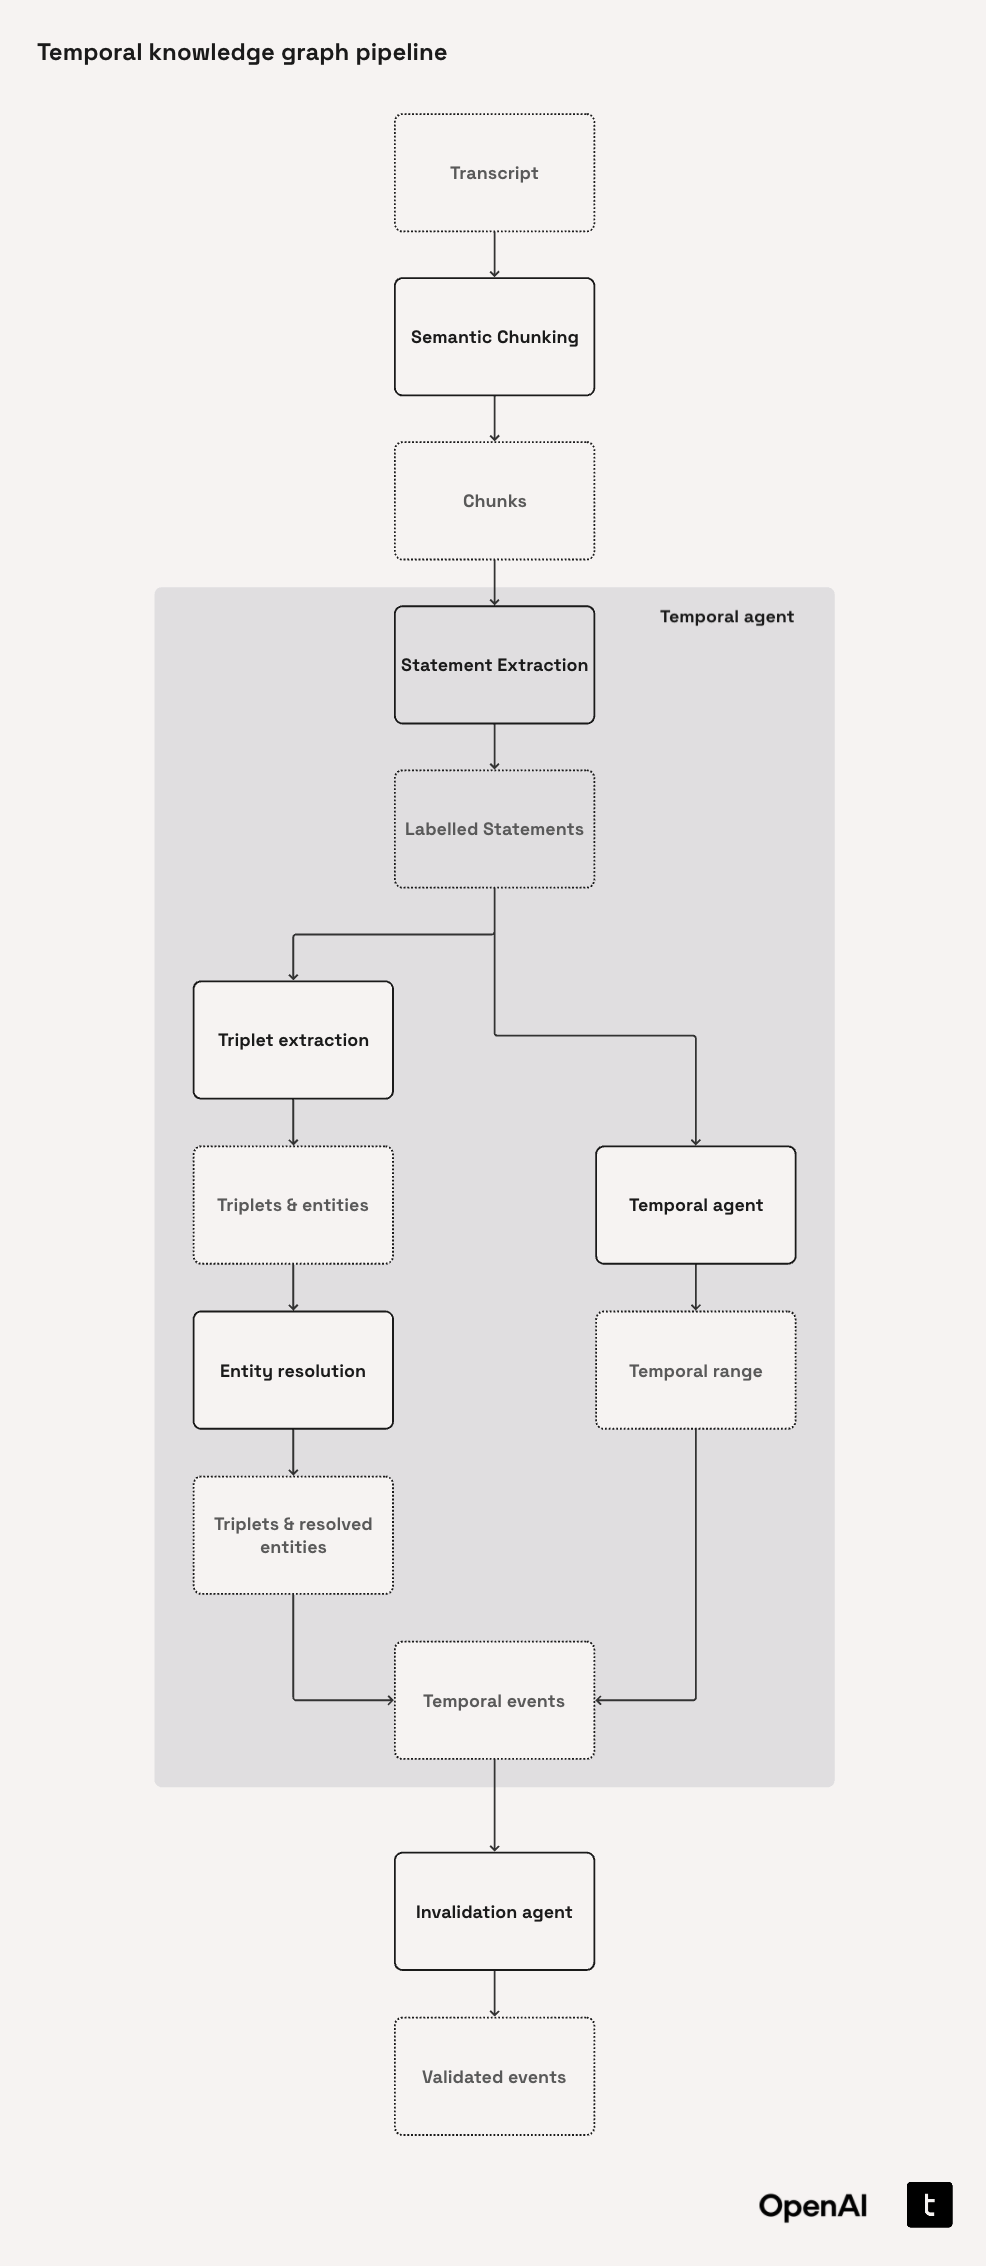 -->
<img
  src="../../../images/07_temporal_agent_class.png"
  alt="Temporal Agent Class"
  style="width:791px; height:auto;"
/>

In [ ]:
import asyncio
from typing import Any

from jinja2 import DictLoader, Environment
from openai import AsyncOpenAI
from tenacity import retry, stop_after_attempt, wait_random_exponential


class TemporalAgent:
    """Handles temporal-based operations for extracting and processing temporal events from text."""

    def __init__(self) -> None:
        """Initialize the TemporalAgent with a client."""
        self._client = AsyncOpenAI()
        self._model = "gpt-4.1-mini"

        self._env = Environment(loader=DictLoader({
            "statement_extraction.jinja": statement_extraction_prompt,
            "date_extraction.jinja": date_extraction_prompt,
            "triplet_extraction.jinja": triplet_extraction_prompt,
        }))
        self._env.filters["split_and_capitalize"] = self.split_and_capitalize
    @staticmethod
    def split_and_capitalize(value: str) -> str:
        """Split dict key string and reformat for jinja prompt."""
        return " ".join(value.split("_")).capitalize()

    async def get_statement_embedding(self, statement: str) -> list[float]:
        """Get the embedding of a statement."""
        response = await self._client.embeddings.create(
            model="text-embedding-3-large",
            input=statement,
            dimensions=256,
        )
        return response.data[0].embedding

    @retry(wait=wait_random_exponential(multiplier=1, min=1, max=30), stop=stop_after_attempt(3))
    async def extract_statements(
        self,
        chunk: Chunk,
        inputs: dict[str, Any],
    ) -> RawStatementList:
        """Determine initial validity date range for a statement.

        Args:
            chunk (Chunk): The chunk of text to analyze.
            inputs (dict[str, Any]): Additional input parameters for extraction.

        Returns:
            Statement: Statement with updated temporal range.
        """
        inputs["chunk"] = chunk.text

        template = self._env.get_template("statement_extraction.jinja")
        prompt = template.render(
            inputs=inputs,
            definitions=LABEL_DEFINITIONS,
            json_schema=RawStatementList.model_fields,
        )

        response = await self._client.responses.parse(
                model=self._model,
                temperature=0,
                input=prompt,
                text_format=RawStatementList,
            )


        raw_statements = response.output_parsed
        statements = RawStatementList.model_validate(raw_statements)
        return statements

    @retry(wait=wait_random_exponential(multiplier=1, min=1, max=30), stop=stop_after_attempt(3))
    async def extract_temporal_range(
        self,
        statement: RawStatement,
        ref_dates: dict[str, Any],
    ) -> TemporalValidityRange:
        """Determine initial validity date range for a statement.

        Args:
            statement (Statement): Statement to analyze.
            ref_dates (dict[str, Any]): Reference dates for the statement.

        Returns:
            Statement: Statement with updated temporal range.
        """
        if statement.temporal_type == TemporalType.ATEMPORAL:
            return TemporalValidityRange(valid_at=None, invalid_at=None)

        template = self._env.get_template("date_extraction.jinja")
        inputs = ref_dates | statement.model_dump()

        prompt = template.render(
            inputs=inputs,
            temporal_guide={statement.temporal_type.value: LABEL_DEFINITIONS["temporal_labelling"][statement.temporal_type.value]},
            statement_guide={statement.statement_type.value: LABEL_DEFINITIONS["episode_labelling"][statement.statement_type.value]},
            json_schema=RawTemporalRange.model_fields,
        )

        response = await self._client.responses.parse(
                model=self._model,
                temperature=0,
                input=prompt,
                text_format=RawTemporalRange,
            )

        raw_validity = response.output_parsed
        temp_validity = TemporalValidityRange.model_validate(raw_validity.model_dump()) if raw_validity else TemporalValidityRange()

        if temp_validity.valid_at is None:
            temp_validity.valid_at = inputs["publication_date"]
        if statement.temporal_type == TemporalType.STATIC:
            temp_validity.invalid_at = None

        return temp_validity

    @retry(wait=wait_random_exponential(multiplier=1, min=1, max=30), stop=stop_after_attempt(3))
    async def extract_triplet(
        self,
        statement: RawStatement,
        max_retries: int = 3,
    ) -> RawExtraction:
        """Extract triplets and entities from a statement as a RawExtraction object."""
        template = self._env.get_template("triplet_extraction.jinja")
        prompt = template.render(
            statement=statement.statement,
            json_schema=RawExtraction.model_fields,
            predicate_instructions=PREDICATE_DEFINITIONS,
        )

        for attempt in range(max_retries):
            try:
                response = await self._client.responses.parse(
                        model=self._model,
                        temperature=0,
                        input=prompt,
                        text_format=RawExtraction,
                    )
                raw_extraction = response.output_parsed
                extraction = RawExtraction.model_validate(raw_extraction)
                return extraction
            except Exception as e:
                if attempt == max_retries - 1:
                    raise
                print(f"Attempt {attempt + 1} failed with error: {str(e)}. Retrying...")
                await asyncio.sleep(1)

        raise Exception("All retry attempts failed to extract triplets")

    async def extract_transcript_events(
        self,
        transcript: Transcript,
    ) -> tuple[Transcript, list[TemporalEvent], list[Triplet], list[Entity]]:
        """
        For each chunk in the transcript:
            - Extract statements
            - For each statement, extract temporal range and Extraction in parallel
            - Build TemporalEvent for each statement
            - Collect all events, triplets, and entities for later DB insertion
        Returns the transcript, all events, all triplets, and all entities.
        """
        if not transcript.chunks:
            return transcript, [], [], []
        doc_summary = {
            "main_entity": transcript.company or None,
            "document_type": "Earnings Call Transcript",
            "publication_date": transcript.date,
            "quarter": transcript.quarter,
            "document_chunk": None,
        }
        all_events: list[TemporalEvent] = []
        all_triplets: list[Triplet] = []
        all_entities: list[Entity] = []

        async def _process_chunk(chunk: Chunk) -> tuple[Chunk, list[TemporalEvent], list[Triplet], list[Entity]]:
            statements_list = await self.extract_statements(chunk, doc_summary)
            events: list[TemporalEvent] = []
            chunk_triplets: list[Triplet] = []
            chunk_entities: list[Entity] = []

            async def _process_statement(statement: RawStatement) -> tuple[TemporalEvent, list[Triplet], list[Entity]]:
                temporal_range_task = self.extract_temporal_range(statement, doc_summary)
                extraction_task = self.extract_triplet(statement)
                temporal_range, raw_extraction = await asyncio.gather(temporal_range_task, extraction_task)
                # Create the event first to get its id
                embedding = await self.get_statement_embedding(statement.statement)
                event = TemporalEvent(
                    chunk_id=chunk.id,
                    statement=statement.statement,
                    embedding=embedding,
                    triplets=[],
                    valid_at=temporal_range.valid_at,
                    invalid_at=temporal_range.invalid_at,
                    temporal_type=statement.temporal_type,
                    statement_type=statement.statement_type,
                )
                # Map raw triplets/entities to Triplet/Entity with event_id
                triplets = [Triplet.from_raw(rt, event.id) for rt in raw_extraction.triplets]
                entities = [Entity.from_raw(re, event.id) for re in raw_extraction.entities]
                event.triplets = [triplet.id for triplet in triplets]
                return event, triplets, entities

            if statements_list.statements:
                results = await asyncio.gather(*(_process_statement(stmt) for stmt in statements_list.statements))
                for event, triplets, entities in results:
                    events.append(event)
                    chunk_triplets.extend(triplets)
                    chunk_entities.extend(entities)
            return chunk, events, chunk_triplets, chunk_entities

        chunk_results = await asyncio.gather(*(_process_chunk(chunk) for chunk in transcript.chunks))
        transcript.chunks = [chunk for chunk, _, _, _ in chunk_results]
        for _, events, triplets, entities in chunk_results:
            all_events.extend(events)
            all_triplets.extend(triplets)
            all_entities.extend(entities)
        return transcript, all_events, all_triplets, all_entities

In [ ]:
temporal_agent = TemporalAgent()
# transcripts: list[Transcript] = chunker.generate_transcripts_and_chunks(dataset)

# Process only the first transcript
results = await temporal_agent.extract_transcript_events(transcripts[0])

In [ ]:
# Parse and display the results in a nice format
transcript, events, triplets, entities = results

print("=== TRANSCRIPT PROCESSING RESULTS ===\n")

print(f"📄 Transcript ID: {transcript.id}")
print(f"📊 Total Chunks: {len(transcript.chunks) if transcript.chunks is not None else 0}")
print(f"🎯 Total Events: {len(events)}")
print(f"🔗 Total Triplets: {len(triplets)}")
print(f"🏷️  Total Entities: {len(entities)}")

print("\n=== SAMPLE EVENTS ===")
for i, event in enumerate(events[:3]):  # Show first 3 events
    print(f"\n📝 Event {i+1}:")
    print(f"   Statement: {event.statement[:100]}...")
    print(f"   Type: {event.temporal_type}")
    print(f"   Valid At: {event.valid_at}")
    print(f"   Triplets: {len(event.triplets)}")

print("\n=== SAMPLE TRIPLETS ===")
for i, triplet in enumerate(triplets[:5]):  # Show first 5 triplets
    print(f"\n🔗 Triplet {i+1}:")
    print(f"   Subject: {triplet.subject_name} (ID: {triplet.subject_id})")
    print(f"   Predicate: {triplet.predicate}")
    print(f"   Object: {triplet.object_name} (ID: {triplet.object_id})")
    if triplet.value:
        print(f"   Value: {triplet.value}")

print("\n=== SAMPLE ENTITIES ===")
for i, entity in enumerate(entities[:5]):  # Show first 5 entities
    print(f"\n🏷️  Entity {i+1}:")
    print(f"   Name: {entity.name}")
    print(f"   Type: {entity.type}")
    print(f"   Description: {entity.description}")
    if entity.resolved_id:
        print(f"   Resolved ID: {entity.resolved_id}")

### 3.2.9. Entity Resolution

Before diving into Temporal Invalidation, we need to first tackle entity resolution. This process is crucial to ensure that each real-world entity has a single, authoritative representation, eliminating duplicates and maintaining data consistency. For instance, `AMD` and `Advanced Micro Devices` clearly refer to the same entity, so they should be represented under a unified canonical entity.

Here's our approach to entity resolution:

* We use the `EntityResolution` class to batch entities by type (`Entity.type`), which helps us make context-specific comparisons—like distinguishing companies from individuals.

* To address noisy data effectively, we leverage [RapidFuzz](https://rapidfuzz.github.io/RapidFuzz/) to cluster entities based on name similarity. This method involves a simple, case-insensitive, punctuation-free comparison using a partial match ratio, allowing tolerance for minor typos and substring matches.

* Within each fuzzy-matched cluster, we select the medoid—the entity most representative of the cluster based on overall similarity. This prevents bias toward the most frequently occurring or earliest listed entity. The medoid then serves as the initial canonical entity, providing a semantically meaningful representation of the group.

* Before adding a new canonical entity, we cross-check the medoid against existing canonicals, considering both fuzzy matching and acronyms. For example, `Advanced Micro Devices Inc.` may yield `AMDI`, closely matching the acronym `AMD`. This step helps prevent unnecessary creation of duplicate canonical entities.

* If a global match isn't found, the medoid becomes a new canonical entity, with all entities in the cluster linked to it via a resolved ID.

* Finally, we perform an additional safeguard check to resolve potential acronym duplication across all canonical entities, ensuring thorough cleanup.

To further enhance entity resolution, you could consider advanced techniques such as:

* Using embedding-based similarity on `Entity.description` alongside `Entity.name`, improving disambiguation beyond simple text similarity.
* Employing a large language model (LLM) to intelligently group entities under their canonical forms, enhancing accuracy through semantic understanding.


In [ ]:
import sqlite3
import string

from rapidfuzz import fuzz

from db_interface import (
    get_all_canonical_entities,
    insert_canonical_entity,
    remove_entity,
    update_entity_references,
)


class EntityResolution:
    """
    Entity resolution class.
    """

    def __init__(self, conn: sqlite3.Connection):
        self.conn = conn
        self.global_canonicals: list[Entity] = get_all_canonical_entities(conn)
        self.threshold = 80.0
        self.acronym_thresh = 98.0


    def resolve_entities_batch(
        self, batch_entities: list[Entity],
    ) -> None:
        """
        Orchestrate the scalable entity resolution workflow for a batch of entities.
        """
        type_groups = {t: [e for e in batch_entities if e.type == t] for t in set(e.type for e in batch_entities)}

        for entities in type_groups.values():
            clusters = self.group_entities_by_fuzzy_match(entities)

            for group in clusters.values():
                if not group:
                    continue
                local_canon = self.set_medoid_as_canonical_entity(group)
                if local_canon is None:
                    continue

                match = self.match_to_canonical_entity(local_canon, self.global_canonicals)
                if " " in local_canon.name:  # Multi-word entity
                    acronym = "".join(word[0] for word in local_canon.name.split())
                    acronym_match = next(
                        (c for c in self.global_canonicals if fuzz.ratio(acronym, c.name) >= self.acronym_thresh and " " not in c.name), None
                    )
                    if acronym_match:
                        match = acronym_match

                if match:
                    canonical_id = match.id
                else:
                    insert_canonical_entity(
                        self.conn,
                        {
                            "id": str(local_canon.id),
                            "name": local_canon.name,
                            "type": local_canon.type,
                            "description": local_canon.description,
                        },
                    )
                    canonical_id = local_canon.id
                    self.global_canonicals.append(local_canon)

                for entity in group:
                    entity.resolved_id = canonical_id
                    self.conn.execute(
                        "UPDATE entities SET resolved_id = ? WHERE id = ?",
                        (str(canonical_id), str(entity.id))
                    )

        # Clean up any acronym duplicates after processing all entities
        self.merge_acronym_canonicals()


    def group_entities_by_fuzzy_match(
            self, entities: list[Entity],
     ) -> dict[str, list[Entity]]:
        """
        Group entities by fuzzy name similarity using rapidfuzz"s partial_ratio.
        Returns a mapping from canonical name to list of grouped entities.
        """
        def clean(name: str) -> str:
            return name.lower().strip().translate(str.maketrans("", "", string.punctuation))

        name_to_entities: dict[str, list[Entity]] = {}
        cleaned_name_map: dict[str, str] = {}
        for entity in entities:
            name_to_entities.setdefault(entity.name, []).append(entity)
            cleaned_name_map[entity.name] = clean(entity.name)
        unique_names = list(name_to_entities.keys())

        clustered: dict[str, list[Entity]] = {}
        used = set()
        for name in unique_names:
            if name in used:
                continue
            clustered[name] = []
            for other_name in unique_names:
                if other_name in used:
                    continue
                score = fuzz.partial_ratio(cleaned_name_map[name], cleaned_name_map[other_name])
                if score >= self.threshold:
                    clustered[name].extend(name_to_entities[other_name])
                    used.add(other_name)
        return clustered


    def set_medoid_as_canonical_entity(self, entities: list[Entity]) -> Entity | None:
        """
        Select as canonical the entity in the group with the highest total similarity (sum of partial_ratio) to all others.
        Returns the medoid entity or None if the group is empty.
        """
        if not entities:
            return None

        def clean(name: str) -> str:
            return name.lower().strip().translate(str.maketrans("", "", string.punctuation))

        n = len(entities)
        scores = [0.0] * n
        for i in range(n):
            for j in range(n):
                if i != j:
                    s1 = clean(entities[i].name)
                    s2 = clean(entities[j].name)
                    scores[i] += fuzz.partial_ratio(s1, s2)
        max_idx = max(range(n), key=lambda idx: scores[idx])
        return entities[max_idx]


    def match_to_canonical_entity(self, entity: Entity, canonical_entities: list[Entity]) -> Entity | None:
        """
        Fuzzy match a single entity to a list of canonical entities.
        Returns the best matching canonical entity or None if no match above self.threshold.
        """
        def clean(name: str) -> str:
            return name.lower().strip().translate(str.maketrans("", "", string.punctuation))

        best_score: float = 0
        best_canon = None
        for canon in canonical_entities:
            score = fuzz.partial_ratio(clean(entity.name), clean(canon.name))
            if score > best_score:
                best_score = score
                best_canon = canon
        if best_score >= self.threshold:
            return best_canon
        return None


    def merge_acronym_canonicals(self) -> None:
        """
        Merge canonical entities where one is an acronym of another.
        """
        multi_word = [e for e in self.global_canonicals if " " in e.name]
        single_word = [e for e in self.global_canonicals if " " not in e.name]

        acronym_map = {}
        for entity in multi_word:
            acronym = "".join(word[0].upper() for word in entity.name.split())
            acronym_map[entity.id] = acronym

        for entity in multi_word:
            acronym = acronym_map[entity.id]
            for single_entity in single_word:
                score = fuzz.ratio(acronym, single_entity.name)
                if score >= self.threshold:
                    update_entity_references(self.conn, str(entity.id), str(single_entity.id))
                    remove_entity(self.conn, str(entity.id))
                    self.global_canonicals.remove(entity)
                    break

### 3.2.10. Invalidation agent

##### Understanding the Invalidation Process

To effectively invalidate temporal events, the agent performs checks in both directions:

> 1. **Incoming vs. Existing**: Are incoming events invalidated by events already present?
> 2. **Existing vs. Incoming**: Are current events invalidated by the new incoming events?

This bi-directional assessment results in a clear True/False decision.

#### Event Invalidation Prompt

The prompt has three key components:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
<li style="margin-bottom: 1.2em;"><strong>Task Setup</strong><br />
Defines two roles—<code>primary</code> and <code>secondary</code>—for event comparison. The assessment checks if the <code>primary</code> event is invalidated by the <code>secondary</code> event.</li>

<li style="margin-bottom: 1.2em;"><strong>Guidelines</strong><br />
Provides clear criteria on interpreting temporal metadata. Importantly, invalidation must rely solely on the relationships explicitly stated between events. External information cannot influence the decision.</li>

<li style="margin-bottom: 1.2em;"><strong>Event Information</strong><br />
Both events (<code>primary</code> and <code>secondary</code>) include timestamp details (<code>valid_at</code> and <code>invalid_at</code>) along with semantic context through either <code>Statement</code>, <code>Triplet</code>, or both. This context ensures accurate and relevant comparisons.</li>
</ol>


In [ ]:
event_invalidation_prompt = """
Task: Analyze the primary event against the secondary event and determine if the primary event is invalidated by the secondary event.
Only set dates if they explicitly relate to the validity of the relationship described in the text.

IMPORTANT: Only invalidate events if they are directly invalidated by the other event given in the context. Do NOT use any external knowledge to determine validity ranges.
Only use dates that are directly stated to invalidate the relationship. The invalid_at for the invalidated event should be the valid_at of the event that caused the invalidation.

Invalidation Guidelines:
1. Dates are given in ISO 8601 format (YYYY-MM-DDTHH:MM:SS.SSSSSSZ).
2. Where invalid_at is null, it means this event is still valid and considered to be ongoing.
3. Where invalid_at is defined, the event has previously been invalidated by something else and can be considered "finished".
4. An event can refine the invalid_at of a finished event to an earlier date only.
5. An event cannot invalidate an event that chronologically occurred after it.
6. An event cannot be invalidated by an event that chronologically occurred before it.
7. An event cannot invalidate itself.

---
Primary Event:
{% if primary_event -%}
Statement: {{primary_event}}
{%- endif %}
{% if primary_triplet -%}
Triplet: {{primary_triplet}}
{%- endif %}
Valid_at: {{primary_event.valid_at}}
Invalid_at: {{primary_event.invalid_at}}
---
Secondary Event:
{% if secondary_event -%}
Statement: {{secondary_event}}
{%- endif %}
{% if secondary_triplet -%}
Triplet: {{secondary_triplet}}
{%- endif %}
Valid_at: {{secondary_event.valid_at}}
Invalid_at: {{secondary_event.invalid_at}}
---

Return: "True" if the primary event is invalidated or its invalid_at is refined else "False"
"""

#### Requirements to be compared for Invalidation
We can only invalidate dynamic facts that haven't been marked invalid yet. These facts serve as our primary events, while potential candidates for invalidation are our secondary events. To streamline the invalidation process, consider these guidelines when evaluating secondary events:

1. Must be a *FACT* type and not *Atemporal*
2. Share at least one canonical entity at the triplet level
3. Belong to the same semantic predicate group at the triplet level (defined below)
4. Temporally overlap and be currently ongoing
5. Have a statement cosine similarity above the threshold (currently set to 0.5)
6. The similarity threshold (0.5) helps us filter noise effectively by selecting only the `top_k` most relevant results. Low-level semantic similarities are acceptable since our goal is refining the data sent to the LLM for further assessment

When invalidation occurs, we annotate the affected events with `expired_at` and `invalidated_by` to clearly indicate cause-and-effect relationships. 

In [ ]:
PREDICATE_GROUPS: list[list[str]] = [
    ["IS_A", "HAS_A", "LOCATED_IN", "HOLDS_ROLE", "PART_OF"],
    ["PRODUCES", "SELLS", "SUPPLIES", "DISCONTINUED", "SECURED"],
    ["LAUNCHED", "DEVELOPED", "ADOPTED_BY", "INVESTS_IN", "COLLABORATES_WITH"],
    ["HAS_REVENUE", "INCREASED", "DECREASED", "RESULTED_IN", "TARGETS"],
]

When we put all of this together, the workflow for our `InvalidationAgent` looks like this:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Temporal Range Detection</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      We start by identifying when events happen with <code>get_incoming_temporal_bounds()</code>. This function checks the event's <code>valid_at</code> and, if it's dynamic, its <code>invalid_at</code>. Atemporal events aren't included here.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Temporal Event Selection</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      We use <code>select_events_temporally()</code> to filter events by:
    </p>
    <ul style="margin-left: 1.5em; margin-bottom: 0.5em;">
      <li>Checking if they're static or dynamic.</li>
      <li>Determining if their time ranges overlap with our incoming event.</li>
      <li>Handling dynamic events carefully, especially "ongoing" ones without an <code>invalid_at</code>, or events with various overlaps.</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Embedding Similarity Filtering</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Then, <code>filter_by_embedding_similarity()</code> compares events based on semantic similarity:
    </p>
    <ul style="margin-left: 1.5em; margin-bottom: 0.5em;">
      <li>It calculates cosine similarity between embeddings.</li>
      <li>Events below a similarity threshold (<code>_similarity_threshold = 0.5</code>) are filtered out.</li>
      <li>We keep only the top-K most similar events (<code>_top_k = 10</code>).</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Combining Temporal and Semantic Filters</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      With <code>select_temporally_relevant_events_for_invalidation()</code>, we:
    </p>
    <ul style="margin-left: 1.5em; margin-bottom: 0.5em;">
      <li>Apply temporal filters first.</li>
      <li>Then apply embedding similarity filters.</li>
      <li>This gives us a refined list of events most likely interacting or conflicting with the incoming one.</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Event Invalidation Decision (LLM-based)</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The LLM-based <code>invalidation_step()</code> (powered by GPT-4.1-mini) determines whether the incoming event invalidates another event:
    </p>
    <ul style="margin-left: 1.5em; margin-bottom: 0.5em;">
      <li>If it does, we update:
        <ul style="margin-left: 1.5em;">
          <li><code>invalid_at</code> to match the secondary event's <code>valid_at</code>.</li>
          <li><code>expired_at</code> with the current timestamp.</li>
          <li><code>invalidated_by</code> with the ID of the secondary event.</li>
        </ul>
      </li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Bidirectional Event Check</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      We use <code>bi_directional_event_invalidation()</code> to check:
    </p>
    <ul style="margin-left: 1.5em; margin-bottom: 0.5em;">
      <li>If the incoming event invalidates existing events.</li>
      <li>If existing, later events invalidate the incoming event, especially if the incoming one is dynamic and currently valid.</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Deduplication Logic</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Lastly, <code>resolve_duplicate_invalidations()</code> ensures clean invalidation:
    </p>
    <ul style="margin-left: 1.5em; margin-bottom: 0.5em;">
      <li>It allows only one invalidation per event.</li>
      <li>Picks the earliest invalidation time to avoid conflicts.</li>
      <li>This helps manage batch processing effectively.</li>
    </ul>
  </li>
</ol>

The invalidation below represents this part of our pipeline:

<!-- 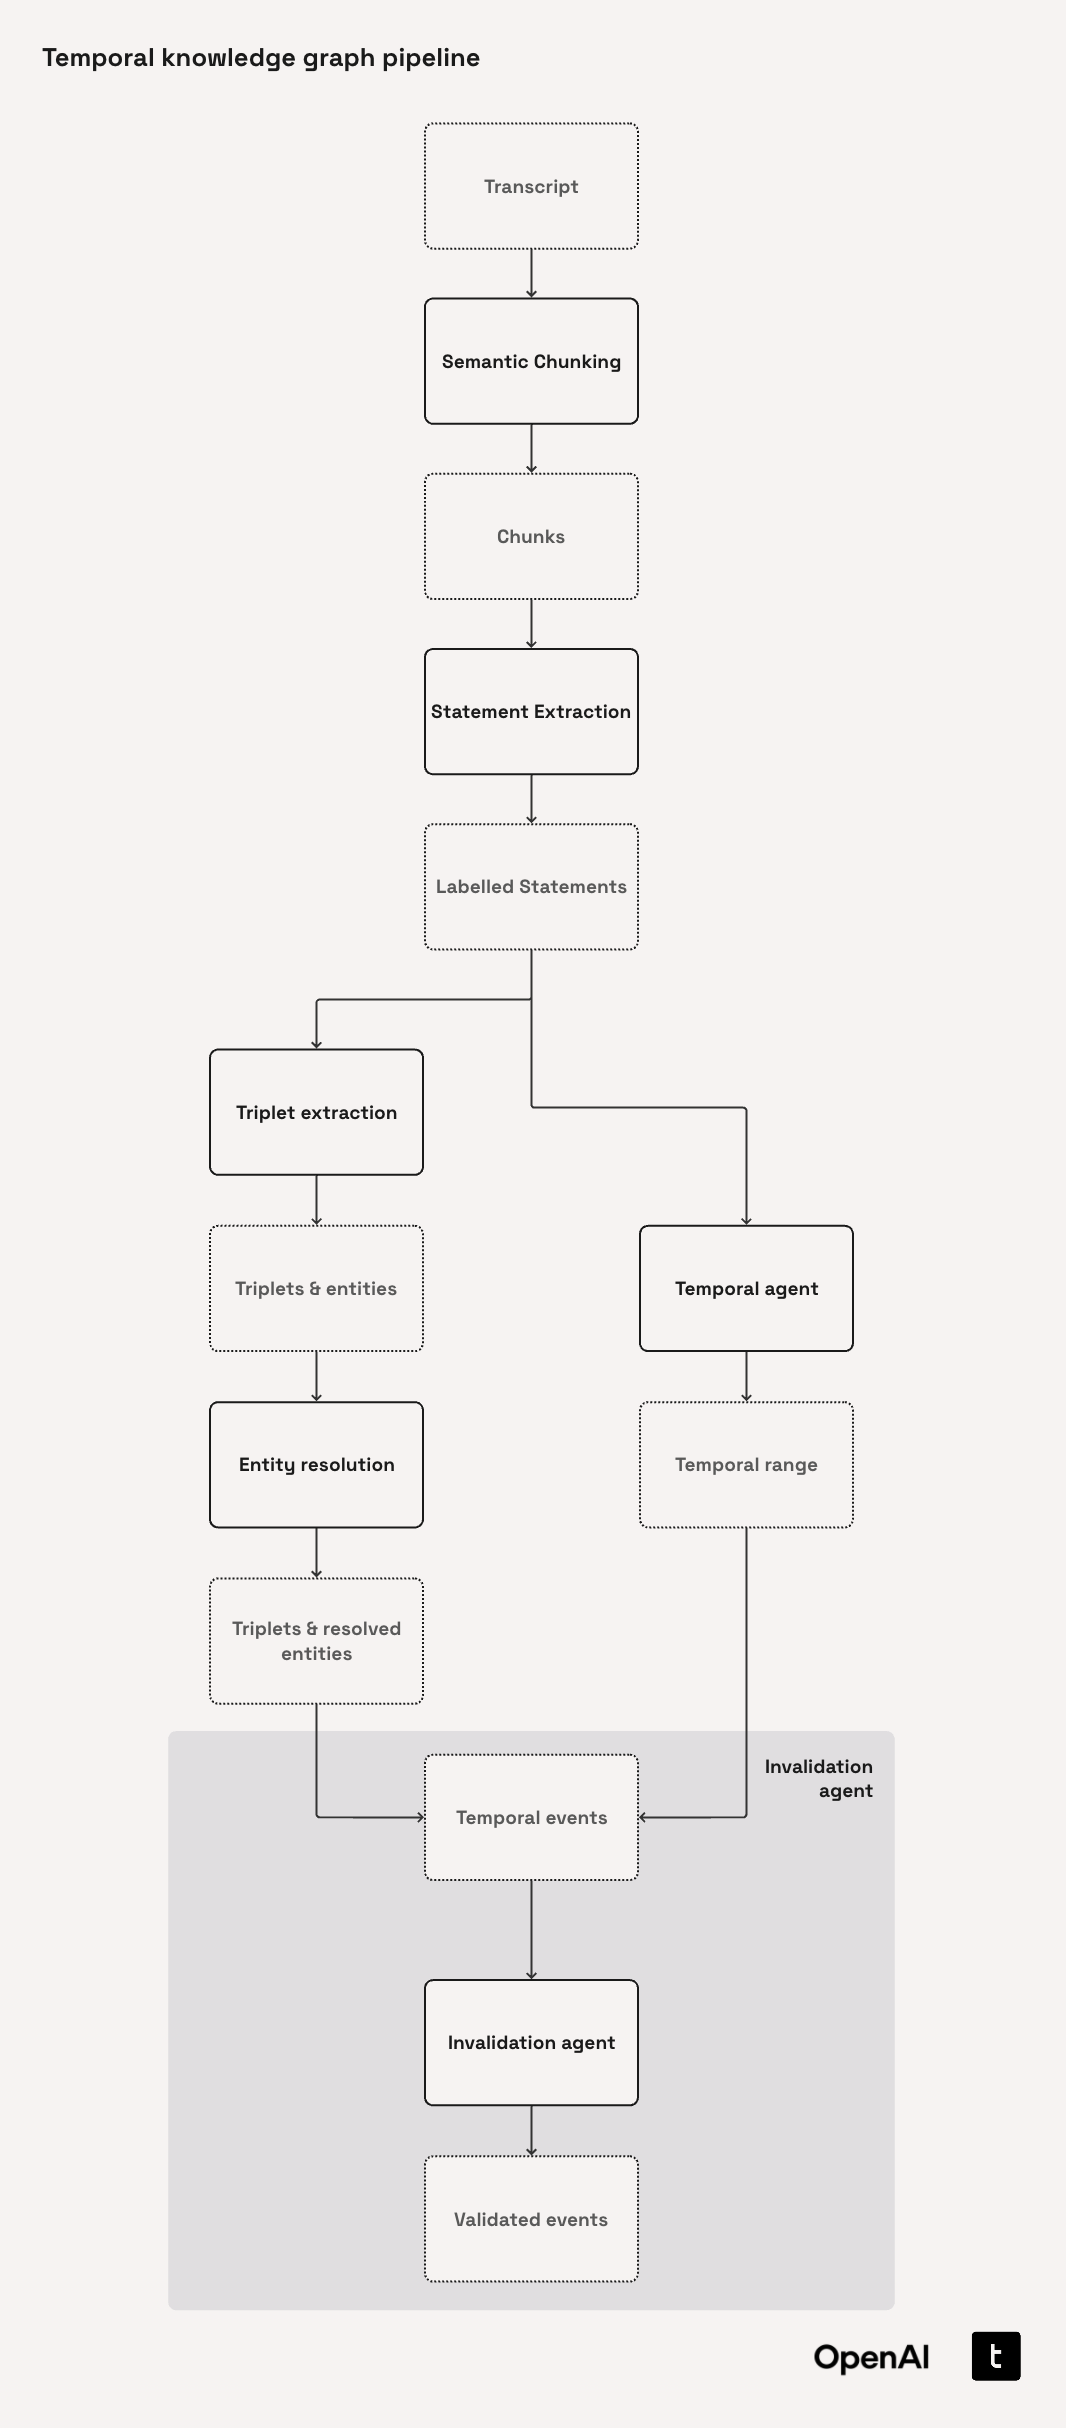 -->
<img
  src="../../../images/08_invalidation_agent.png"
  alt="Invalidation Agent"
  style="width:791px; height:auto;"
/>


In [ ]:
import asyncio
import logging
import pickle
import sqlite3
from collections import Counter, defaultdict
from collections.abc import Coroutine
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime
from typing import Any

from jinja2 import DictLoader, Environment
from openai import AsyncOpenAI
from scipy.spatial.distance import cosine
from tenacity import retry, stop_after_attempt, wait_random_exponential


class InvalidationAgent:
    """Handles temporal-based operations for extracting and processing temporal events from text."""

    def __init__(self, max_workers: int = 5) -> None:
        """Initialize the TemporalAgent with a client."""
        self.max_workers = max_workers
        self._executor = ThreadPoolExecutor(max_workers=max_workers)
        self.logger = logging.getLogger(__name__)
        self._client = AsyncOpenAI()
        self._model = "gpt-4.1-mini"
        self._similarity_threshold = 0.5
        self._top_k = 10

        self._env = Environment(loader=DictLoader({
            "event_invalidation.jinja": event_invalidation_prompt,
        }))

    @staticmethod
    def cosine_similarity(v1: list[float], v2: list[float]) -> float:
        """Calculate cosine similarity between two vectors."""
        return float(1 - cosine(v1, v2))

    @staticmethod
    def get_incoming_temporal_bounds(
        event: TemporalEvent,
    ) -> dict[str, datetime] | None:
        """Get temporal bounds of all temporal events associated with a statement."""
        if (event.temporal_type == TemporalType.ATEMPORAL) or (event.valid_at is None):
            return None

        temporal_bounds = {"start": event.valid_at, "end": event.valid_at}

        if event.temporal_type == TemporalType.DYNAMIC:
            if event.invalid_at:
                temporal_bounds["end"] = event.invalid_at

        return temporal_bounds

    def select_events_temporally(
        self,
        triplet_events: list[tuple[Triplet, TemporalEvent]],
        temp_bounds: dict[str, datetime],
        dynamic: bool = False,
    ) -> list[tuple[Triplet, TemporalEvent]]:
        """Select temporally relevant events (static or dynamic) based on temporal bounds.

        Groups events into before, after, and overlapping categories based on their temporal bounds.

        Args:
            triplet_events: List of (Triplet, TemporalEvent) tuples to filter
            temp_bounds: Dict with 'start' and 'end' datetime bounds
            dynamic: If True, filter dynamic events; if False, filter static events
            n_window: Number of events to include before and after bounds

        Returns:
            Dict with keys '{type}_before', '{type}_after', '{type}_overlap' where type is 'dynamic' or 'static'
        """

        def _check_overlaps_dynamic(event: TemporalEvent, start: datetime, end: datetime) -> bool:
            """Check if the dynamic event overlaps with the temporal bounds of the incoming event."""
            if event.temporal_type != TemporalType.DYNAMIC:
                return False

            event_start = event.valid_at or datetime.min
            event_end = event.invalid_at

            # 1. Event contains the start
            if (event_end is not None) and (event_start <= start <= event_end):
                return True

            # 2. Ongoing event starts before the incoming start
            if (event_end is None) and (event_start <= start):
                return True

            # 3. Event starts within the incoming interval
            if start <= event_start <= end:
                return True
            return False

        # Filter by temporal type
        target_type = TemporalType.DYNAMIC if dynamic else TemporalType.STATIC
        filtered_events = [(triplet, event) for triplet, event in triplet_events if event.temporal_type == target_type]

        # Sort by valid_at timestamp
        sorted_events = sorted(filtered_events, key=lambda te: te[1].valid_at or datetime.min)

        start = temp_bounds["start"]
        end = temp_bounds["end"]

        if dynamic:
            overlap: list[tuple[Triplet, TemporalEvent]] = [
                (triplet, event) for triplet, event in sorted_events if _check_overlaps_dynamic(event, start, end)
            ]
        else:
            overlap = []
            if start != end:
                overlap = [(triplet, event) for triplet, event in sorted_events if event.valid_at and start <= event.valid_at <= end]

        return overlap

    def filter_by_embedding_similarity(
        self,
        reference_event: TemporalEvent,
        candidate_pairs: list[tuple[Triplet, TemporalEvent]],
    ) -> list[tuple[Triplet, TemporalEvent]]:
        """Filter triplet-event pairs by embedding similarity."""
        pairs_with_similarity = [
            (triplet, event, self.cosine_similarity(reference_event.embedding, event.embedding)) for triplet, event in candidate_pairs
        ]

        filtered_pairs = [
            (triplet, event) for triplet, event, similarity in pairs_with_similarity if similarity >= self._similarity_threshold
        ]

        sorted_pairs = sorted(filtered_pairs, key=lambda x: self.cosine_similarity(reference_event.embedding, x[1].embedding), reverse=True)

        return sorted_pairs[: self._top_k]

    def select_temporally_relevant_events_for_invalidation(
        self,
        incoming_event: TemporalEvent,
        candidate_triplet_events: list[tuple[Triplet, TemporalEvent]],
    ) -> list[tuple[Triplet, TemporalEvent]] | None:
        """Select the temporally relevant events based on temporal range of incoming event."""
        temporal_bounds = self.get_incoming_temporal_bounds(event=incoming_event)
        if not temporal_bounds:
            return None

        # First apply temporal filtering - find overlapping events
        selected_statics = self.select_events_temporally(
            triplet_events=candidate_triplet_events,
            temp_bounds=temporal_bounds,
        )
        selected_dynamics = self.select_events_temporally(
            triplet_events=candidate_triplet_events,
            temp_bounds=temporal_bounds,
            dynamic=True,
        )

        # Then filter by semantic similarity
        similar_static = self.filter_by_embedding_similarity(reference_event=incoming_event, candidate_pairs=selected_statics)

        similar_dynamics = self.filter_by_embedding_similarity(reference_event=incoming_event, candidate_pairs=selected_dynamics)

        return similar_static + similar_dynamics


    @retry(wait=wait_random_exponential(multiplier=1, min=1, max=30), stop=stop_after_attempt(3))
    async def invalidation_step(
        self,
        primary_event: TemporalEvent,
        primary_triplet: Triplet,
        secondary_event: TemporalEvent,
        secondary_triplet: Triplet,
    ) -> TemporalEvent:
        """Check if primary event should be invalidated by secondary event.

        Args:
            primary_event: Event to potentially invalidate
            primary_triplet: Triplet associated with primary event
            secondary_event: Event that might cause invalidation
            secondary_triplet: Triplet associated with secondary event

        Returns:
            TemporalEvent: Updated primary event (may have invalid_at and invalidated_by set)
        """
        template = self._env.get_template("event_invalidation.jinja")

        prompt = template.render(
            primary_event=primary_event.statement,
            primary_triplet=f"({primary_triplet.subject_name}, {primary_triplet.predicate}, {primary_triplet.object_name})",
            primary_valid_at=primary_event.valid_at,
            primary_invalid_at=primary_event.invalid_at,
            secondary_event=secondary_event.statement,
            secondary_triplet=f"({secondary_triplet.subject_name}, {secondary_triplet.predicate}, {secondary_triplet.object_name})",
            secondary_valid_at=secondary_event.valid_at,
            secondary_invalid_at=secondary_event.invalid_at,
        )

        response = await self._client.responses.parse(
                model=self._model,
                temperature=0,
                input=prompt,
            )

        # Parse boolean response
        response_bool = str(response).strip().lower() == "true" if response else False

        if not response_bool:
            return primary_event

        # Create updated event with invalidation info
        updated_event = primary_event.model_copy(
            update={
                "invalid_at": secondary_event.valid_at,
                "expired_at": datetime.now(),
                "invalidated_by": secondary_event.id,
            }
        )
        return updated_event

    async def bi_directional_event_invalidation(
        self,
        incoming_triplet: Triplet,
        incoming_event: TemporalEvent,
        existing_triplet_events: list[tuple[Triplet, TemporalEvent]],
    ) -> tuple[TemporalEvent, list[TemporalEvent]]:
        """Validate and update temporal information for triplet events with full bidirectional invalidation.

        Args:
            incoming_triplet: The new triplet
            incoming_event: The new event associated with the triplet
            existing_triplet_events: List of existing (triplet, event) pairs to validate against

        Returns:
            tuple[TemporalEvent, list[TemporalEvent]]: (updated_incoming_event, list_of_changed_existing_events)
        """
        changed_existing_events: list[TemporalEvent] = []
        updated_incoming_event = incoming_event

        # Filter for dynamic events that can be invalidated
        dynamic_events_to_check = [
            (triplet, event) for triplet, event in existing_triplet_events if event.temporal_type == TemporalType.DYNAMIC
        ]

        # 1. Check if incoming event invalidates existing dynamic events
        if dynamic_events_to_check:
            tasks = [
                self.invalidation_step(
                    primary_event=existing_event,
                    primary_triplet=existing_triplet,
                    secondary_event=incoming_event,
                    secondary_triplet=incoming_triplet,
                )
                for existing_triplet, existing_event in dynamic_events_to_check
            ]

            updated_events = await asyncio.gather(*tasks)

            for original_pair, updated_event in zip(dynamic_events_to_check, updated_events, strict=True):
                original_event = original_pair[1]
                if (updated_event.invalid_at != original_event.invalid_at) or (
                    updated_event.invalidated_by != original_event.invalidated_by
                ):
                    changed_existing_events.append(updated_event)

        # 2. Check if existing events invalidate the incoming dynamic event
        if incoming_event.temporal_type == TemporalType.DYNAMIC and incoming_event.invalid_at is None:
            # Only check events that occur after the incoming event
            invalidating_events = [
                (triplet, event)
                for triplet, event in existing_triplet_events
                if (incoming_event.valid_at and event.valid_at and incoming_event.valid_at < event.valid_at)
            ]

            if invalidating_events:
                tasks = [
                    self.invalidation_step(
                        primary_event=incoming_event,
                        primary_triplet=incoming_triplet,
                        secondary_event=existing_event,
                        secondary_triplet=existing_triplet,
                    )
                    for existing_triplet, existing_event in invalidating_events
                ]

                updated_events = await asyncio.gather(*tasks)

                # Find the earliest invalidation
                valid_invalidations = [(e.invalid_at, e.invalidated_by) for e in updated_events if e.invalid_at is not None]

                if valid_invalidations:
                    earliest_invalidation = min(valid_invalidations, key=lambda x: x[0])
                    updated_incoming_event = incoming_event.model_copy(
                        update={
                            "invalid_at": earliest_invalidation[0],
                            "invalidated_by": earliest_invalidation[1],
                            "expired_at": datetime.now(),
                        }
                    )

        return updated_incoming_event, changed_existing_events

    @staticmethod
    def resolve_duplicate_invalidations(changed_events: list[TemporalEvent]) -> list[TemporalEvent]:
        """Resolve duplicate invalidations by selecting the most restrictive (earliest) invalidation.

        When multiple incoming events invalidate the same existing event, we should apply
        the invalidation that results in the shortest validity range (earliest invalid_at).

        Args:
            changed_events: List of events that may contain duplicates with different invalidations

        Returns:
            List of deduplicated events with the most restrictive invalidation applied
        """
        if not changed_events:
            return []

        # Count occurrences of each event ID
        id_counts = Counter(str(event.id) for event in changed_events)
        resolved_events = []
        # Group events by ID only for those with duplicates
        events_by_id = defaultdict(list)
        for event in changed_events:
            event_id = str(event.id)
            if id_counts[event_id] == 1:
                resolved_events.append(event)
            else:
                events_by_id[event_id].append(event)

        # Deduplicate only those with duplicates
        for _id, event_versions in events_by_id.items():
            invalidated_versions = [e for e in event_versions if e.invalid_at is not None]
            if not invalidated_versions:
                resolved_events.append(event_versions[0])
            else:
                most_restrictive = min(invalidated_versions, key=lambda e: (e.invalid_at if e.invalid_at is not None else datetime.max))
                resolved_events.append(most_restrictive)

        return resolved_events

    async def _execute_task_pool(
        self,
        tasks: list[Coroutine[Any, Any, tuple[TemporalEvent, list[TemporalEvent]]]],
        batch_size: int = 10
    ) -> list[Any]:
        """Execute tasks in batches using a pool to control concurrency.

        Args:
            tasks: List of coroutines to execute
            batch_size: Number of tasks to process concurrently

        Returns:
            List of results from all tasks
        """
        all_results = []
        for i in range(0, len(tasks), batch_size):
            batch = tasks[i:i + batch_size]
            batch_results = await asyncio.gather(*batch, return_exceptions=True)
            all_results.extend(batch_results)

            # Small delay between batches to prevent overload
            if i + batch_size < len(tasks):
                await asyncio.sleep(0.1)

        return all_results

    async def process_invalidations_in_parallel(
        self,
        incoming_triplets: list[Triplet],
        incoming_events: list[TemporalEvent],
        existing_triplets: list[Triplet],
        existing_events: list[TemporalEvent],
    ) -> tuple[list[TemporalEvent], list[TemporalEvent]]:
        """Process invalidations for multiple triplets in parallel.

        Args:
            incoming_triplets: List of new triplets to process
            incoming_events: List of events associated with incoming triplets
            existing_triplets: List of existing triplets from DB
            existing_events: List of existing events from DB

        Returns:
            tuple[list[TemporalEvent], list[TemporalEvent]]:
                - List of updated incoming events (potentially invalidated)
                - List of existing events that were updated (deduplicated)
        """
        # Create mappings for faster lookups
        event_map = {str(e.id): e for e in existing_events}
        incoming_event_map = {str(t.event_id): e for t, e in zip(incoming_triplets, incoming_events, strict=False)}

        # Prepare tasks for parallel processing
        tasks = []
        for incoming_triplet in incoming_triplets:
            incoming_event = incoming_event_map[str(incoming_triplet.event_id)]

            # Get related triplet-event pairs
            related_pairs = [
                (t, event_map[str(t.event_id)])
                for t in existing_triplets
                if (str(t.subject_id) == str(incoming_triplet.subject_id) or str(t.object_id) == str(incoming_triplet.object_id))
                and str(t.event_id) in event_map
            ]

            # Filter for temporal relevance
            all_relevant_events = self.select_temporally_relevant_events_for_invalidation(
                incoming_event=incoming_event,
                candidate_triplet_events=related_pairs,
            )

            if not all_relevant_events:
                continue

            # Add task for parallel processing
            task = self.bi_directional_event_invalidation(
                incoming_triplet=incoming_triplet,
                incoming_event=incoming_event,
                existing_triplet_events=all_relevant_events,
            )
            tasks.append(task)

        # Process all invalidations in parallel with pooling
        if not tasks:
            return [], []

        # Use pool size based on number of workers, but cap it
        pool_size = min(self.max_workers * 2, 10)  # Adjust these numbers based on your needs
        results = await self._execute_task_pool(tasks, batch_size=pool_size)

        # Collect all results (may contain duplicates)
        updated_incoming_events = []
        all_changed_existing_events = []

        for result in results:
            if isinstance(result, Exception):
                self.logger.error(f"Task failed with error: {str(result)}")
                continue
            updated_event, changed_events = result
            updated_incoming_events.append(updated_event)
            all_changed_existing_events.extend(changed_events)

        # Resolve duplicate invalidations for existing events
        deduplicated_existing_events = self.resolve_duplicate_invalidations(all_changed_existing_events)

        # Resolve duplicate invalidations for incoming events (in case multiple triplets from same event)
        deduplicated_incoming_events = self.resolve_duplicate_invalidations(updated_incoming_events)

        return deduplicated_incoming_events, deduplicated_existing_events

    @staticmethod
    def batch_fetch_related_triplet_events(
        conn: sqlite3.Connection,
        incoming_triplets: list[Triplet],
    ) -> tuple[list[Triplet], list[TemporalEvent]]:
        """
        Batch fetch all existing triplets and their events from the DB that are related to any of the incoming triplets.
        Related means:
          - Share a subject or object entity
          - Predicate is in the same group
          - Associated event is a FACT
        Returns two lists: triplets and events (with mapping via event_id).
        """
        # 1. Build sets of all relevant entity IDs and predicate groups
        entity_ids = set()
        predicate_to_group = {}
        for group in PREDICATE_GROUPS:
            group_list = list(group)
            for pred in group_list:
                predicate_to_group[pred] = group_list
        relevant_predicates = set()
        for triplet in incoming_triplets:
            entity_ids.add(str(triplet.subject_id))
            entity_ids.add(str(triplet.object_id))
            group = predicate_to_group.get(str(triplet.predicate), [])
            if group:
                relevant_predicates.update(group)

        # 2. Prepare SQL query
        entity_placeholders = ",".join(["?"] * len(entity_ids))
        predicate_placeholders = ",".join(["?"] * len(relevant_predicates))
        query = f"""
            SELECT
                t.id,
                t.subject_name,
                t.subject_id,
                t.predicate,
                t.object_name,
                t.object_id,
                t.value,
                t.event_id,
                e.chunk_id,
                e.statement,
                e.triplets,
                e.statement_type,
                e.temporal_type,
                e.valid_at,
                e.invalid_at,
                e.created_at,
                e.expired_at,
                e.invalidated_by,
                e.embedding
            FROM triplets t
            JOIN events e ON t.event_id = e.id
            WHERE
                (t.subject_id IN ({entity_placeholders}) OR t.object_id IN ({entity_placeholders}))
                AND t.predicate IN ({predicate_placeholders})
                AND e.statement_type = ?
        """
        params = list(entity_ids) + list(entity_ids) + list(relevant_predicates) + [StatementType.FACT]
        cursor = conn.cursor()
        cursor.execute(query, params)
        rows = cursor.fetchall()

        triplets = []
        events = []
        events_by_id = {}
        for row in rows:
            triplet = Triplet(
                id=row[0],
                subject_name=row[1],
                subject_id=row[2],
                predicate=Predicate(row[3]),
                object_name=row[4],
                object_id=row[5],
                value=row[6],
                event_id=row[7],
            )
            event_id = row[7]
            triplets.append(triplet)
            if event_id not in events_by_id:
                events_by_id[event_id] = TemporalEvent(
                    id=row[7],
                    chunk_id=row[8],
                    statement=row[9],
                    triplets=TemporalEvent.parse_triplets_json(row[10]),
                    statement_type=row[11],
                    temporal_type=row[12],
                    valid_at=row[13],
                    invalid_at=row[14],
                    created_at=row[15],
                    expired_at=row[16],
                    invalidated_by=row[17],
                    embedding=pickle.loads(row[18]) if row[18] else [0] * 1536,
                )
        events = list(events_by_id.values())
        return triplets, events

We can create a batch processing function for invalidation for a set of Temporal Events. This is where we filter our Statements to type FACT before passing into the invalidation agent to process.

In [ ]:

async def batch_process_invalidation(
    conn: sqlite3.Connection, all_events: list[TemporalEvent], all_triplets: list[Triplet], invalidation_agent: InvalidationAgent
) -> tuple[list[TemporalEvent], list[TemporalEvent]]:
    """Process invalidation for all FACT events that are temporal.

    Args:
        conn: SQLite database connection
        all_events: List of all extracted events
        all_triplets: List of all extracted triplets
        invalidation_agent: The invalidation agent instance

    Returns:
        tuple[list[TemporalEvent], list[TemporalEvent]]:
            - final_events: All events (updated incoming events)
            - events_to_update: Existing events that need DB updates
    """
    def _get_fact_triplets(
        all_events: list[TemporalEvent],
        all_triplets: list[Triplet],
    ) -> list[Triplet]:
        """
        Return only those triplets whose associated event is of statement_type FACT.
        """
        fact_event_ids = {
            event.id for event in all_events if (event.statement_type == StatementType.FACT) and (event.temporal_type != TemporalType.ATEMPORAL)
        }
        return [triplet for triplet in all_triplets if triplet.event_id in fact_event_ids]
    # Prepare a list of triplets whose associated event is a FACT and not ATEMPORAL
    fact_triplets = _get_fact_triplets(all_events, all_triplets)
    if not fact_triplets:
        return all_events, []

    # Create event map for quick lookup
    all_events_map = {event.id: event for event in all_events}

    # Build aligned lists of valid triplets and their corresponding events
    fact_events: list[TemporalEvent] = []
    valid_fact_triplets: list[Triplet] = []
    for triplet in fact_triplets:
        # Handle potential None event_id and ensure type safety
        if triplet.event_id is not None:
            event = all_events_map.get(triplet.event_id)
            if event:
                fact_events.append(event)
                valid_fact_triplets.append(triplet)
            else:
                print(f"Warning: Could not find event for fact_triplet with event_id {triplet.event_id}")
        else:
            print(f"Warning: Fact triplet {triplet.id} has no event_id, skipping invalidation")

    if not valid_fact_triplets:
        return all_events, []

    # Batch fetch all related existing triplets and events
    existing_triplets, existing_events = invalidation_agent.batch_fetch_related_triplet_events(conn, valid_fact_triplets)

    # Process all invalidations in parallel
    updated_incoming_fact_events, changed_existing_events = await invalidation_agent.process_invalidations_in_parallel(
        incoming_triplets=valid_fact_triplets,
        incoming_events=fact_events,
        existing_triplets=existing_triplets,
        existing_events=existing_events,
    )

    # Create mapping for efficient updates
    updated_incoming_event_map = {event.id: event for event in updated_incoming_fact_events}

    # Reconstruct final events list with updates applied
    final_events = []
    for original_event in all_events:
        if original_event.id in updated_incoming_event_map:
            final_events.append(updated_incoming_event_map[original_event.id])
        else:
            final_events.append(original_event)

    return final_events, changed_existing_events

### 3.2.11. Putting it all together

Now that we have built out each individual component of the Temporal Knowledge Graph workflow, we can integrate them into a cohesive workflow.

Given a chunked transcript, the Temporal Agent sequentially processes each chunk, initially extracting relevant statements. These statements are then classified and enriched through subsequent extraction phases, resulting in Temporal Events, structured Triplets, and identified Entities.

The extracted Entities are cross-referenced with existing records in the database, ensuring accurate resolution and avoiding redundancy. Following entity resolution, the Dynamic Facts undergo validation via the Invalidation Agent to verify temporal consistency and validity.

After successful processing and validation, the refined data is systematically stored into their respective tables within the SQLite database, maintaining an organized and temporally accurate knowledge graph.

To help visually ground the code presented below, we can look again at the pipeline diagram: 

<!-- 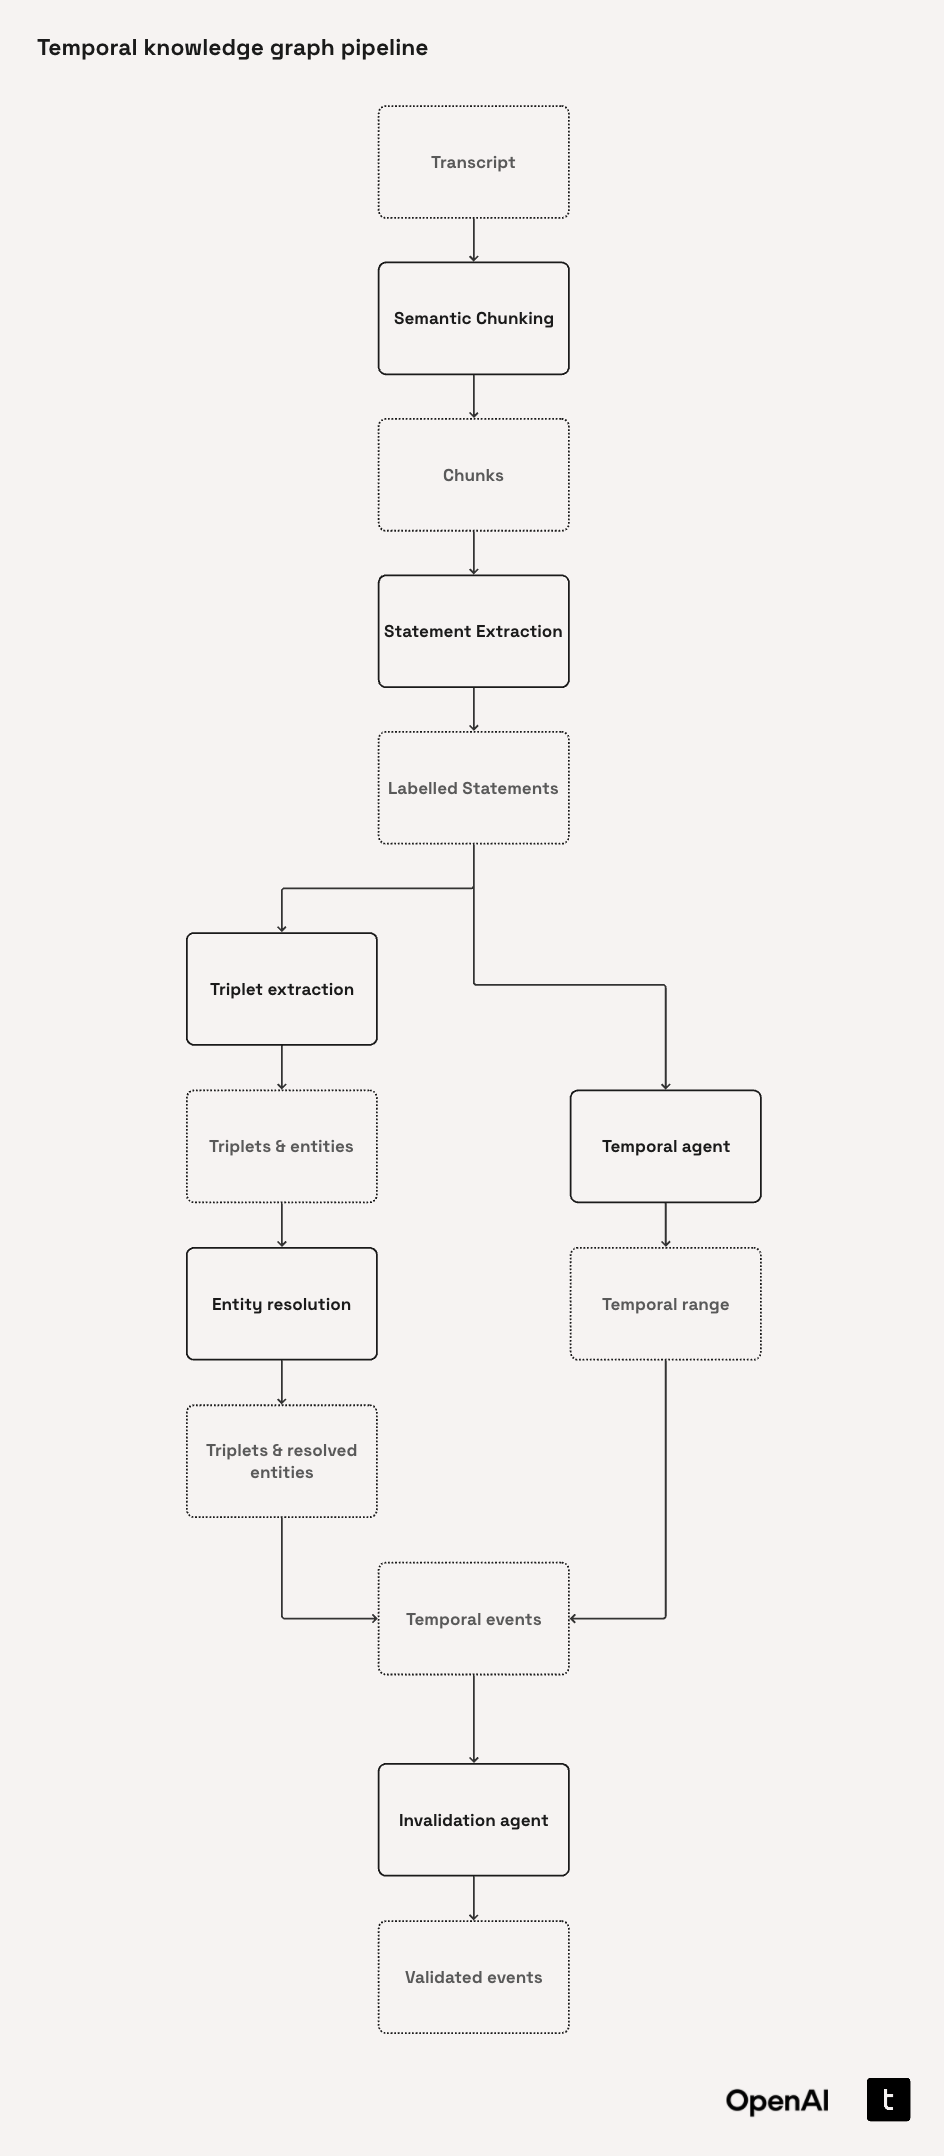 -->
<img
  src="../../../images/09_full_pipeline.png"
  alt="Full Pipeline"
  style="width:791px; height:auto;"
/>

In [ ]:
import sqlite3

from db_interface import (
    has_events,
    insert_chunk,
    insert_entity,
    insert_event,
    insert_transcript,
    insert_triplet,
    update_events_batch,
)
from utils import safe_iso


async def ingest_transcript(
        transcript: Transcript,
        conn: sqlite3.Connection,
        temporal_agent: TemporalAgent,
        invalidation_agent: InvalidationAgent,
        entity_resolver: EntityResolution) -> None:
    """
    Ingest a Transcript object into the database, extracting and saving all chunks, events, triplets, and entities.
    """
    insert_transcript(
        conn,
        {
            "id": str(transcript.id),
            "text": transcript.text,
            "company": transcript.company,
            "date": transcript.date,
            "quarter": transcript.quarter,
        },
    )

    transcript, all_events, all_triplets, all_entities = await temporal_agent.extract_transcript_events(transcript)
    entity_resolver.resolve_entities_batch(all_entities)
    name_to_canonical = {entity.name: entity.resolved_id for entity in all_entities if entity.resolved_id}

    # Update triplets with resolved entity IDs
    for triplet in all_triplets:
        if triplet.subject_name in name_to_canonical:
            triplet.subject_id = name_to_canonical[triplet.subject_name]
        if triplet.object_name in name_to_canonical:
            triplet.object_id = name_to_canonical[triplet.object_name]


    # Invalidation processing with properly resolved triplet IDs
    events_to_update: list[TemporalEvent] = []
    if has_events(conn):
        all_events, events_to_update = await batch_process_invalidation(conn, all_events, all_triplets, invalidation_agent)

    # ALL DB operations happen in single transaction
    with conn:
        # Update existing events first (they're already in DB)
        if events_to_update:
            update_events_batch(conn, events_to_update)
            print(f"Updated {len(events_to_update)} existing events")

        # Insert new data
        for chunk in transcript.chunks or []:
            chunk_dict = chunk.model_dump()
            insert_chunk(
                conn,
                {
                    "id": str(chunk_dict["id"]),
                    "transcript_id": str(transcript.id),
                    "text": chunk_dict["text"],
                    "metadata": json.dumps(chunk_dict["metadata"]),
                },
            )
        for event in all_events:
            event_dict = {
                "id": str(event.id),
                "chunk_id": str(event.chunk_id),
                "statement": event.statement,
                "embedding": pickle.dumps(event.embedding) if event.embedding is not None else None,
                "triplets": event.triplets_json,
                "statement_type": event.statement_type.value if hasattr(event.statement_type, "value") else event.statement_type,
                "temporal_type": event.temporal_type.value if hasattr(event.temporal_type, "value") else event.temporal_type,
                "created_at": safe_iso(event.created_at),
                "valid_at": safe_iso(event.valid_at),
                "expired_at": safe_iso(event.expired_at),
                "invalid_at": safe_iso(event.invalid_at),
                "invalidated_by": str(event.invalidated_by) if event.invalidated_by else None,
            }

            insert_event(conn, event_dict)
        for triplet in all_triplets:
            try:
                insert_triplet(
                    conn,
                    {
                        "id": str(triplet.id),
                        "event_id": str(triplet.event_id),
                        "subject_name": triplet.subject_name,
                        "subject_id": str(triplet.subject_id),
                        "predicate": triplet.predicate,
                        "object_name": triplet.object_name,
                        "object_id": str(triplet.object_id),
                        "value": triplet.value,
                    },
                )
            except KeyError as e:
                print(f"KeyError: {triplet.subject_name} or {triplet.object_name} not found in name_to_canonical")
                print(f"Skipping triplet: Entity '{e.args[0]}' is unresolved.")
                continue
        # Deduplicate entities by id before insert
        unique_entities = {}
        for entity in all_entities:
            unique_entities[str(entity.id)] = entity
        for entity in unique_entities.values():
            insert_entity(conn, {"id": str(entity.id), "name": entity.name, "resolved_id": str(entity.resolved_id)})

    return None

In [ ]:
# Initialize core components
sqlite_conn = make_connection(memory=False, refresh=True)
temporal_agent = TemporalAgent()
invalidation_agent = InvalidationAgent()
entity_resolver = EntityResolution(sqlite_conn)

In [ ]:
# Ingest single transcript
await ingest_transcript(transcripts[0], sqlite_conn, temporal_agent, invalidation_agent, entity_resolver)

In [ ]:
# View what tables have been created and populated
sqlite_conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

In [ ]:
# View triplets table
from db_interface import view_db_table

triplets_df = view_db_table(sqlite_conn, "triplets", max_rows=10)
display(triplets_df)

We can then ingest the rest of the Transcripts. Note that this code has not been optimised to be production ready and on average takes 2-5 mins per Transcript. This bulk ingestion using the data in /transcripts (~30 files) will take up to 2 hours to run. Optimizing this is a critical step in scaling to production. We outline some methods you can use to approach this in the Appendix in [A.3 "Implementing Concurrency in the Ingestion Pipeline"](./Appendix.ipynb), including batch chunking, entity clustering, and more. 

In [ ]:
import time

from tqdm import tqdm


async def bulk_transcript_ingestion(transcripts: list[Transcript], sqlite_conn: sqlite3.Connection) -> None:
    """Handle transcript ingestion with duplicate checking, optional overwriting, and progress tracking.

    Args:
        transcripts (List[Transcript]): List of transcripts to ingest
        sqlite_conn (sqlite3.Connection): SQLite database connection
        overwrite (bool, optional): Whether to overwrite existing transcripts. Defaults to False.
    """
    temporal_agent = TemporalAgent()
    invalidation_agent = InvalidationAgent()
    entity_resolver = EntityResolution(sqlite_conn)

    pbar = tqdm(total=len(transcripts), desc="Ingesting transcripts")

    for transcript in transcripts:
        start_time = time.time()
        try:
            await ingest_transcript(transcript, sqlite_conn, temporal_agent, invalidation_agent, entity_resolver)
            # Calculate and display ingestion time
            end_time = time.time()
            ingestion_time = end_time - start_time

            # Update progress bar with completion message
            pbar.write(
                f"Ingested transcript {transcript.id} "
                f"in {ingestion_time:.2f} seconds"
            )

        except Exception as e:
            pbar.write(f"Error ingesting transcript {transcript.id}: {str(e)}")

        finally:
            # Update progress bar
            pbar.update(1)

    pbar.close()

> Note: Running the below cell for all transcripts in this dataset can take approximately 1 hour

In [ ]:
# Bulk ingestion (not recommended)
sqlite_conn = make_connection(memory=False, refresh=True, db_path="my_database.db")
transcripts = load_transcripts_from_pickle()
# await bulk_transcript_ingestion(transcripts, sqlite_conn)

We recommend loading the pre-processed AMD and NVDA data from file by creating a new SQLite connection using the code below. This will create the database needed for building the graph and retriever. 

You can find this data on [HuggingFace](https://huggingface.co/datasets/TomoroAI/temporal_cookbook_db).

In [3]:
from cb_functions import load_db_from_hf
sqlite_conn = load_db_from_hf()

Loading transcripts...
Loading chunks...
Loading events...
Loading triplets...
Loading entities...
✅ All tables written to SQLite.


In [4]:
# View transcripts table
from db_interface import view_db_table

transcript_df = view_db_table(sqlite_conn, "transcripts", max_rows=None)
display(transcript_df)

,id,text,company,date,quarter
0,f2f5aa4c-ad2b-4ed5-9792-bcbddbc4e207,\n\nRefinitiv StreetEvents Event Transcript\nE...,NVDA,2020-08-19T00:00:00,Q2 2021
1,74d42583-b614-4771-80c8-1ddf964a4f1c,\n\nThomson Reuters StreetEvents Event Transcr...,AMD,2016-07-21T00:00:00,Q2 2016
2,26e523aa-7e15-4741-986a-6ec0be034a33,\n\nThomson Reuters StreetEvents Event Transcr...,NVDA,2016-11-10T00:00:00,Q3 2017
3,74380d19-203a-48f6-a1c8-d8df33aae362,\n\nThomson Reuters StreetEvents Event Transcr...,NVDA,2018-05-10T00:00:00,Q1 2019
4,7d620d30-7b09-4774-bc32-51b00a80badf,\n\nThomson Reuters StreetEvents Event Transcr...,AMD,2017-07-25T00:00:00,Q2 2017
5,1ba2fc55-a121-43d4-85d7-e221851f2c7f,\n\nThomson Reuters StreetEvents Event Transcr...,AMD,2017-01-31T00:00:00,Q4 2016
6,db1925df-b5a5-4cb2-862b-df269f53be7e,\n\nThomson Reuters StreetEvents Event Transcr...,NVDA,2017-11-09T00:00:00,Q3 2018
7,fe212bc0-9b3d-44ed-91ca-bfb856b21aa6,\n\nThomson Reuters StreetEvents Event Transcr...,NVDA,2019-02-14T00:00:00,Q4 2019
8,7c0a6f9c-9279-4714-b25e-8be20ae8fb99,\n\nThomson Reuters StreetEvents Event Transcr...,AMD,2019-04-30T00:00:00,Q1 2019
9,10f95617-e5b2-4525-a207-cec9ae9a3211,\n\nThomson Reuters StreetEvents Event Transcr...,AMD,2019-01-29T00:00:00,Q4 2018


## 3.3. Knowledge Graphs

### 3.3.1 Building our Knowledge Graph with NetworkX

When constructing the knowledge graph, canonical entity identifiers derived from triplets ensure accurate mapping of entity names, allowing storage of detailed temporal metadata directly on edges. Specifically, the implementation utilizes attributes:

* **valid\_at**, **invalid\_at**, and **temporal\_type** for **Temporal Validity**, representing real-world accuracy at specific historical moments—critical for analysis of historical facts.
* Optionally, attributes **created\_at** and **expired\_at** may also be used for **Transactional Validity**, enabling audit trails and source attribution by tracking when information was recorded, updated, or corrected.

Transactional validity is particularly beneficial in scenarios such as:

* **Finance**: Determining the accepted financial facts about Company X’s balance sheet on a specific historical date, based on contemporaneously accepted knowledge.
* **Law**: Identifying applicable legal frameworks as understood at a contract signing date, or compliance obligations recognized at past dates.
* **Journalism**: Assessing if previously reported information has become outdated, ensuring press releases and reporting remain accurate and credible over time.


In [ ]:
import numpy
import pandas
import scipy

print("numpy :", numpy.__version__)
print("pandas:", pandas.__version__)
print("scipy :", scipy.__version__)

In [6]:
from cb_functions import build_graph, load_db_from_hf

conn = load_db_from_hf()
G = build_graph(conn)

print(G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")

Loading transcripts...
✅ All tables written to SQLite.
Loading chunks...
✅ All tables written to SQLite.
Loading events...
✅ All tables written to SQLite.
Loading triplets...
✅ All tables written to SQLite.
Loading entities...
✅ All tables written to SQLite.
2282 nodes, 13150 edges


In [ ]:
import networkx as nx

# Print descriptive notes about the graph
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Get some basic graph statistics
print(f"Graph density: {G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes() - 1)):.4f}")

# Sample some nodes to see their attributes
sample_nodes = list(G.nodes(data=True))[:5]
print("\nSample nodes (first 5):")
for node_id, attrs in sample_nodes:
    print(f"  {node_id}: {attrs}")

# Sample some edges to see their attributes
sample_edges = list(G.edges(data=True))[:5]
print("\nSample edges (first 5):")
for u, v, attrs in sample_edges:
    print(f"  {u} -> {v}: {attrs}")

# Get degree statistics
degrees = [d for _, d in G.degree()]
print("\nDegree statistics:")
print(f"  Min degree: {min(degrees)}")
print(f"  Max degree: {max(degrees)}")
print(f"  Average degree: {sum(degrees) / len(degrees):.2f}")

# Check if graph is connected (considering it as undirected for connectivity)
undirected_G = G.to_undirected()
print("\nConnectivity:")
print(f"  Number of connected components: {len(list(nx.connected_components(undirected_G)))}")
print(f"  Is weakly connected: {nx.is_weakly_connected(G)}")


In [ ]:
# Create a visualization of the knowledge graph
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a smaller subgraph for visualization (reduce data for clarity)
# Get nodes with highest degrees for a meaningful visualization
degrees = dict(G.degree())
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:20]  # Reduced from 30 to 20
visualization_nodes = [node for node, _ in top_nodes]

# Create subgraph with these high-degree nodes
graph = G.subgraph(visualization_nodes)
print(f"Visualization subgraph: {graph.number_of_nodes()} nodes, {graph.number_of_edges()} edges")

# Create the plot with better styling
fig, ax = plt.subplots(figsize=(18, 14))
fig.patch.set_facecolor("white")

# Use hierarchical layout for better structure
try:
    # Try hierarchical layout first
    pos = nx.nx_agraph.graphviz_layout(graph, prog="neato")
except (ImportError, nx.NetworkXException):
    # Fall back to spring layout with better parameters
    pos = nx.spring_layout(graph, k=5, iterations=100, seed=42)

# Calculate node properties
node_degrees = [degrees[node] for node in graph.nodes()]
max_degree = max(node_degrees)
min_degree = min(node_degrees)

# Create better color scheme
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(node_degrees)))
node_colors = [colors[i] for i in range(len(node_degrees))]

# Draw nodes with improved styling
node_sizes = [max(200, min(2000, deg * 50)) for deg in node_degrees]  # Better size scaling
nx.draw_networkx_nodes(graph, pos,
                      node_color=node_colors,
                      node_size=node_sizes,
                      alpha=0.9,
                      edgecolors="black",
                      linewidths=1.5,
                      ax=ax)

# Draw edges with better styling
edge_weights = []
for _, _, _ in graph.edges(data=True):
    edge_weights.append(1)

nx.draw_networkx_edges(graph, pos,
                      alpha=0.4,
                      edge_color="#666666",
                      width=1.0,
                      arrows=True,
                      arrowsize=15,
                      arrowstyle="->",
                      ax=ax)

# Add labels for all nodes with better formatting
labels = {}
for node in graph.nodes():
    node_name = graph.nodes[node].get("name", str(node))
    # Truncate long names
    if len(node_name) > 15:
        node_name = node_name[:12] + "..."
    labels[node] = node_name

nx.draw_networkx_labels(graph, pos, labels,
                       font_size=9,
                       font_weight="bold",
                       font_color="black",  # changed from 'white' to 'black'
                       ax=ax)

# Improve title and styling
ax.set_title("Temporal Knowledge Graph Visualization\n(Top 20 Most Connected Entities)",
            fontsize=18, fontweight="bold", pad=20)
ax.axis("off")

# Add a better colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma,
                          norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=30)
cbar.set_label("Node Degree (Number of Connections)", rotation=270, labelpad=25, fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Add margin around the graph
ax.margins(0.1)

plt.tight_layout()
plt.show()

# Print some information about the visualized nodes
print("\nTop entities in visualization:")
for i, (node, degree) in enumerate(top_nodes[:10]):
    node_name = G.nodes[node].get("name", "Unknown")
    print(f"{i+1:2d}. {node_name} (connections: {degree})")

# Create an improved function for easier graph visualization
def visualise_graph(G, num_nodes=20, figsize=(16, 12)):
    """
    Visualize a NetworkX graph with improved styling and reduced data.

    Args:
        G: NetworkX graph
        num_nodes: Number of top nodes to include in visualization (default: 20)
        figsize: Figure size tuple
    """
    degrees = dict(G.degree())
    top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:num_nodes]
    visualization_nodes = [node for node, _ in top_nodes]

    # Create subgraph
    subgraph = G.subgraph(visualization_nodes)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor("white")

    # Layout with better parameters
    try:
        pos = nx.nx_agraph.graphviz_layout(subgraph, prog="neato")
    except (ImportError, nx.NetworkXException):
        pos = nx.spring_layout(subgraph, k=4, iterations=100, seed=42)

    # Node properties
    node_degrees = [degrees[node] for node in subgraph.nodes()]
    max_degree = max(node_degrees)
    min_degree = min(node_degrees)

    # Better color scheme
    colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(node_degrees)))
    node_colors = list(colors)

    # Draw nodes
    node_sizes = [max(200, min(2000, deg * 50)) for deg in node_degrees]
    nx.draw_networkx_nodes(subgraph, pos,
                          node_color=node_colors,
                          node_size=node_sizes,
                          alpha=0.9,
                          edgecolors="black",
                          linewidths=1.5,
                          ax=ax)

    # Draw edges
    nx.draw_networkx_edges(subgraph, pos,
                          alpha=0.4,
                          edge_color="#666666",
                          width=1.0,
                          arrows=True,
                          arrowsize=15,
                          ax=ax)

    # Labels
    labels = {}
    for node in subgraph.nodes():
        node_name = subgraph.nodes[node].get("name", str(node))
        if len(node_name) > 15:
            node_name = node_name[:12] + "..."
        labels[node] = node_name

    nx.draw_networkx_labels(subgraph, pos, labels,
                           font_size=9,
                           font_weight="bold",
                           font_color="black",  # changed from 'white' to 'black'
                           ax=ax)

    ax.set_title(f"Temporal Knowledge Graph\n(Top {num_nodes} Most Connected Entities)",
                fontsize=16, fontweight="bold", pad=20)
    ax.axis("off")

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma,
                              norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.6)
    cbar.set_label("Connections", rotation=270, labelpad=20)

    ax.margins(0.1)
    plt.tight_layout()
    plt.show()

    return subgraph



In [ ]:
# Get node information on NVIDIA, filtering for what they have developed

# Find the node key for NVIDIA (case-insensitive match on name)
nvidia_node = None
for node, data in graph.nodes(data=True):
    if "nvidia" in str(data.get("name", "")).lower():
        nvidia_node = node
        break

if nvidia_node is not None:
    print(f"Node key for NVIDIA: {nvidia_node}")
    print("Node attributes:")
    for k, v in graph.nodes[nvidia_node].items():
        print(f"  {k}: {v}")

    # Show all edges where NVIDIA is the subject and the predicate is 'DEVELOPED' or 'LAUNCHED' or similar
    print("\nEdges where NVIDIA developed or launched something:")
    for _, v, _, d in graph.out_edges(nvidia_node, data=True, keys=True):
        pred = d.get("predicate", "").upper()
        if pred in {"LAUNCHED"}:#, "LAUNCHED", "PRODUCES", "CREATED", "INTRODUCED"}:
            print(f"  {nvidia_node} -[{pred}]-> {v} | {d}")
            # Optionally, print the statement if available
            if "statement" in d:
                print(f"    Statement: {d['statement']}")
else:
    print("NVIDIA node not found in the graph.")



### 3.3.2 NetworkX versus Neo4j in Production

To effectively implement and utilize the knowledge graph we utilise [NetworkX](https://networkx.org/) for the purposes of this cookbook for several reasons. 
1. **Python integration**: NetworkX seamlessly integrates with Python, facilitating rapid prototyping and iterative development
2. **Ease of setup**: It requires minimal initial setup, not requiring a client-server setup featured in alternatives. This makes it ideal for users who wish to run this cookbook themselves
3. **Compatibility with In-Memory Databases**: NetworkX can efficiently manage graphs with fewer than c.100,000 nodes, which is appropriate for this cookbook's data scale

However, it should be noted that NetworkX lacks built-in data persistence and is therefore not typically recommended for production builds.

For production builds, [Neo4j](https://neo4j.com/) emerges as a more optimal choice due to a wider set of production-centric features, including:
- **Native Graph Storage and Processing**: Optimized for graph data with high-performance and efficient handling
- **Optimized Query Engine**: Leverages the Cypher query language, explicitly designed for efficient graph traversal
- **Scalability and Persistence**: Effectively manages extensive graph datasets, ensuring data persistence, reliability, and durability
- **Production Tooling**: Offers integrated tooling such as Neo4j Bloom for vislualization and Neo4j Browser for exploration, enhancing user interaction and analysis
- **Advanced Access Control**: Provides granular security options to control data access

## 3.4. Evaluation and Suggested Feature Additions

The approach presented above offers a foundational implementation of a Temporal Agent for knowledge graph construction. However, it does not fully address complexities or all possible edge cases encountered in real-world applications. Below, we outline several possible enhancements that could be used to further improve the robustness and applicability of this implementation. In the later "Prototype to Production" section, we expand on these enhancements by suggesting additional considerations essential for deploying such agents effectively in production environments. Further details on scaling to production are included in the [Appendix](./Appendix.ipynb).

### 3.4.1. Temporal Agent

#### Statement Extraction and Temporal Events
##### Duplicate Temporal Events
In this cookbook, the Temporal Agent does not identify or merge duplicate Temporal Events arising from statements referring to the same event, especially when originating from different sources. These events are saved separately rather than unified into a single, consolidated event. 

##### Static and Dynamic Representation
There's an opportunity to enrich the dataset by consistently capturing both Static and Dynamic representations of events, even when explicit statements aren't available. 

For Dynamic events without corresponding Static statements, creating explicit Static entries marking the start (`valid_at`) and end (`invalid_at`) can enhance temporal clarity, particularly for the purposes of retrieval tasks. 

Conversely, Static events lacking Dynamic counterparts can have Dynamic relationships inferred, though this would require careful checks for potential invalidation within statement cohorts. 

#### Date Extraction
The implementation in this cookbook does not explictly record assumptions made during date disambiguation. 

In the absence of an explicit publication date, the present date is used implicitly as a reference. For some workflows, this assumption may have to be changed to meet the needs of the end users. 

Abstract dates (e.g., "until next year") are resolved into explicit dates, however the vagueness is not represented in the stored data structure. The inclusion of more granular metadata can capture more abstract date ranges:
```python
temporal_event = {
  "summary": "The event ran from April to September",
  "label": "dynamic",
  "valid_at": {
      "date": "2025-04-01",
      "literal": False,
      "abstract_date": "2025-04"
  },
  "invalid_at": {
      "date": "2025-09-30",
      "literal": False,
      "abstract_date": "2025-09"
  }
}
```
This structure permits the explicit representation of both literal and abstract date interpretations.

#### Triplet Extraction
There are several possible avenues for improving the Triplet Extraction presented in this cookbook. These include:
- Utilising a larger model and optimizing the extraction prompts further
- Running the extraction process multiple times and consolidating results via e.g., a modal pooling mechanism to improve the accuracy and confidence in a prediction
- Incorporating entity extraction tools (e.g., [Spacy](https://spacy.io/) and leveraging predefined ontologies tailored to specific use cases for improved consistency and reliability

### 3.4.2. Invalidation Agent
The presented Invalidation Agent does not refine temporal validity ranges, but one could extend its functionality to perform said refinement as well as intra-cohort invalidation checks to identify temporal conflicts among incoming statements.

There are also several opportunities for efficiency enhancements. 
- Transitioning from individual (1:1) comparisons to omni-directional (1:many) invalidation checks would reduce the number of LLM calls required
- Applying network analysis techniques to cluster related statements could enable batching of invalidation checks. Clusters can be derived from several properties including semantic similarity, temporal proximity, or more advanced techniques. This would significantly reduce bottlenecks arising from sequential processing, which is particularly important when ingesting large volumes of data

# 4. Multi-Step Retrieval Over a Knowledge Graph
---

Simple retrieval systems can often handle straightforward "look-up" queries with a single search against a vector store or document index. In practice, though, agents deployed in real-world settings frequently need more. User questions often require LLMs to synthesise information from multiple parts of a knowledge base or across several endpoints.

The temporal knowledge graphs introduced earlier provide a natural foundation for this, explicitly encoding entities (nodes), relationships (edges), and their evolution over time.

Multi-step retrieval allows us to fully harness the capabilities of these graphs. It involves iteratively traversing the graph through a series of targeted queries, enabling the agent to gather all necessary context before forming a response.

We can see the power of multi-step retrieval below:

<!-- 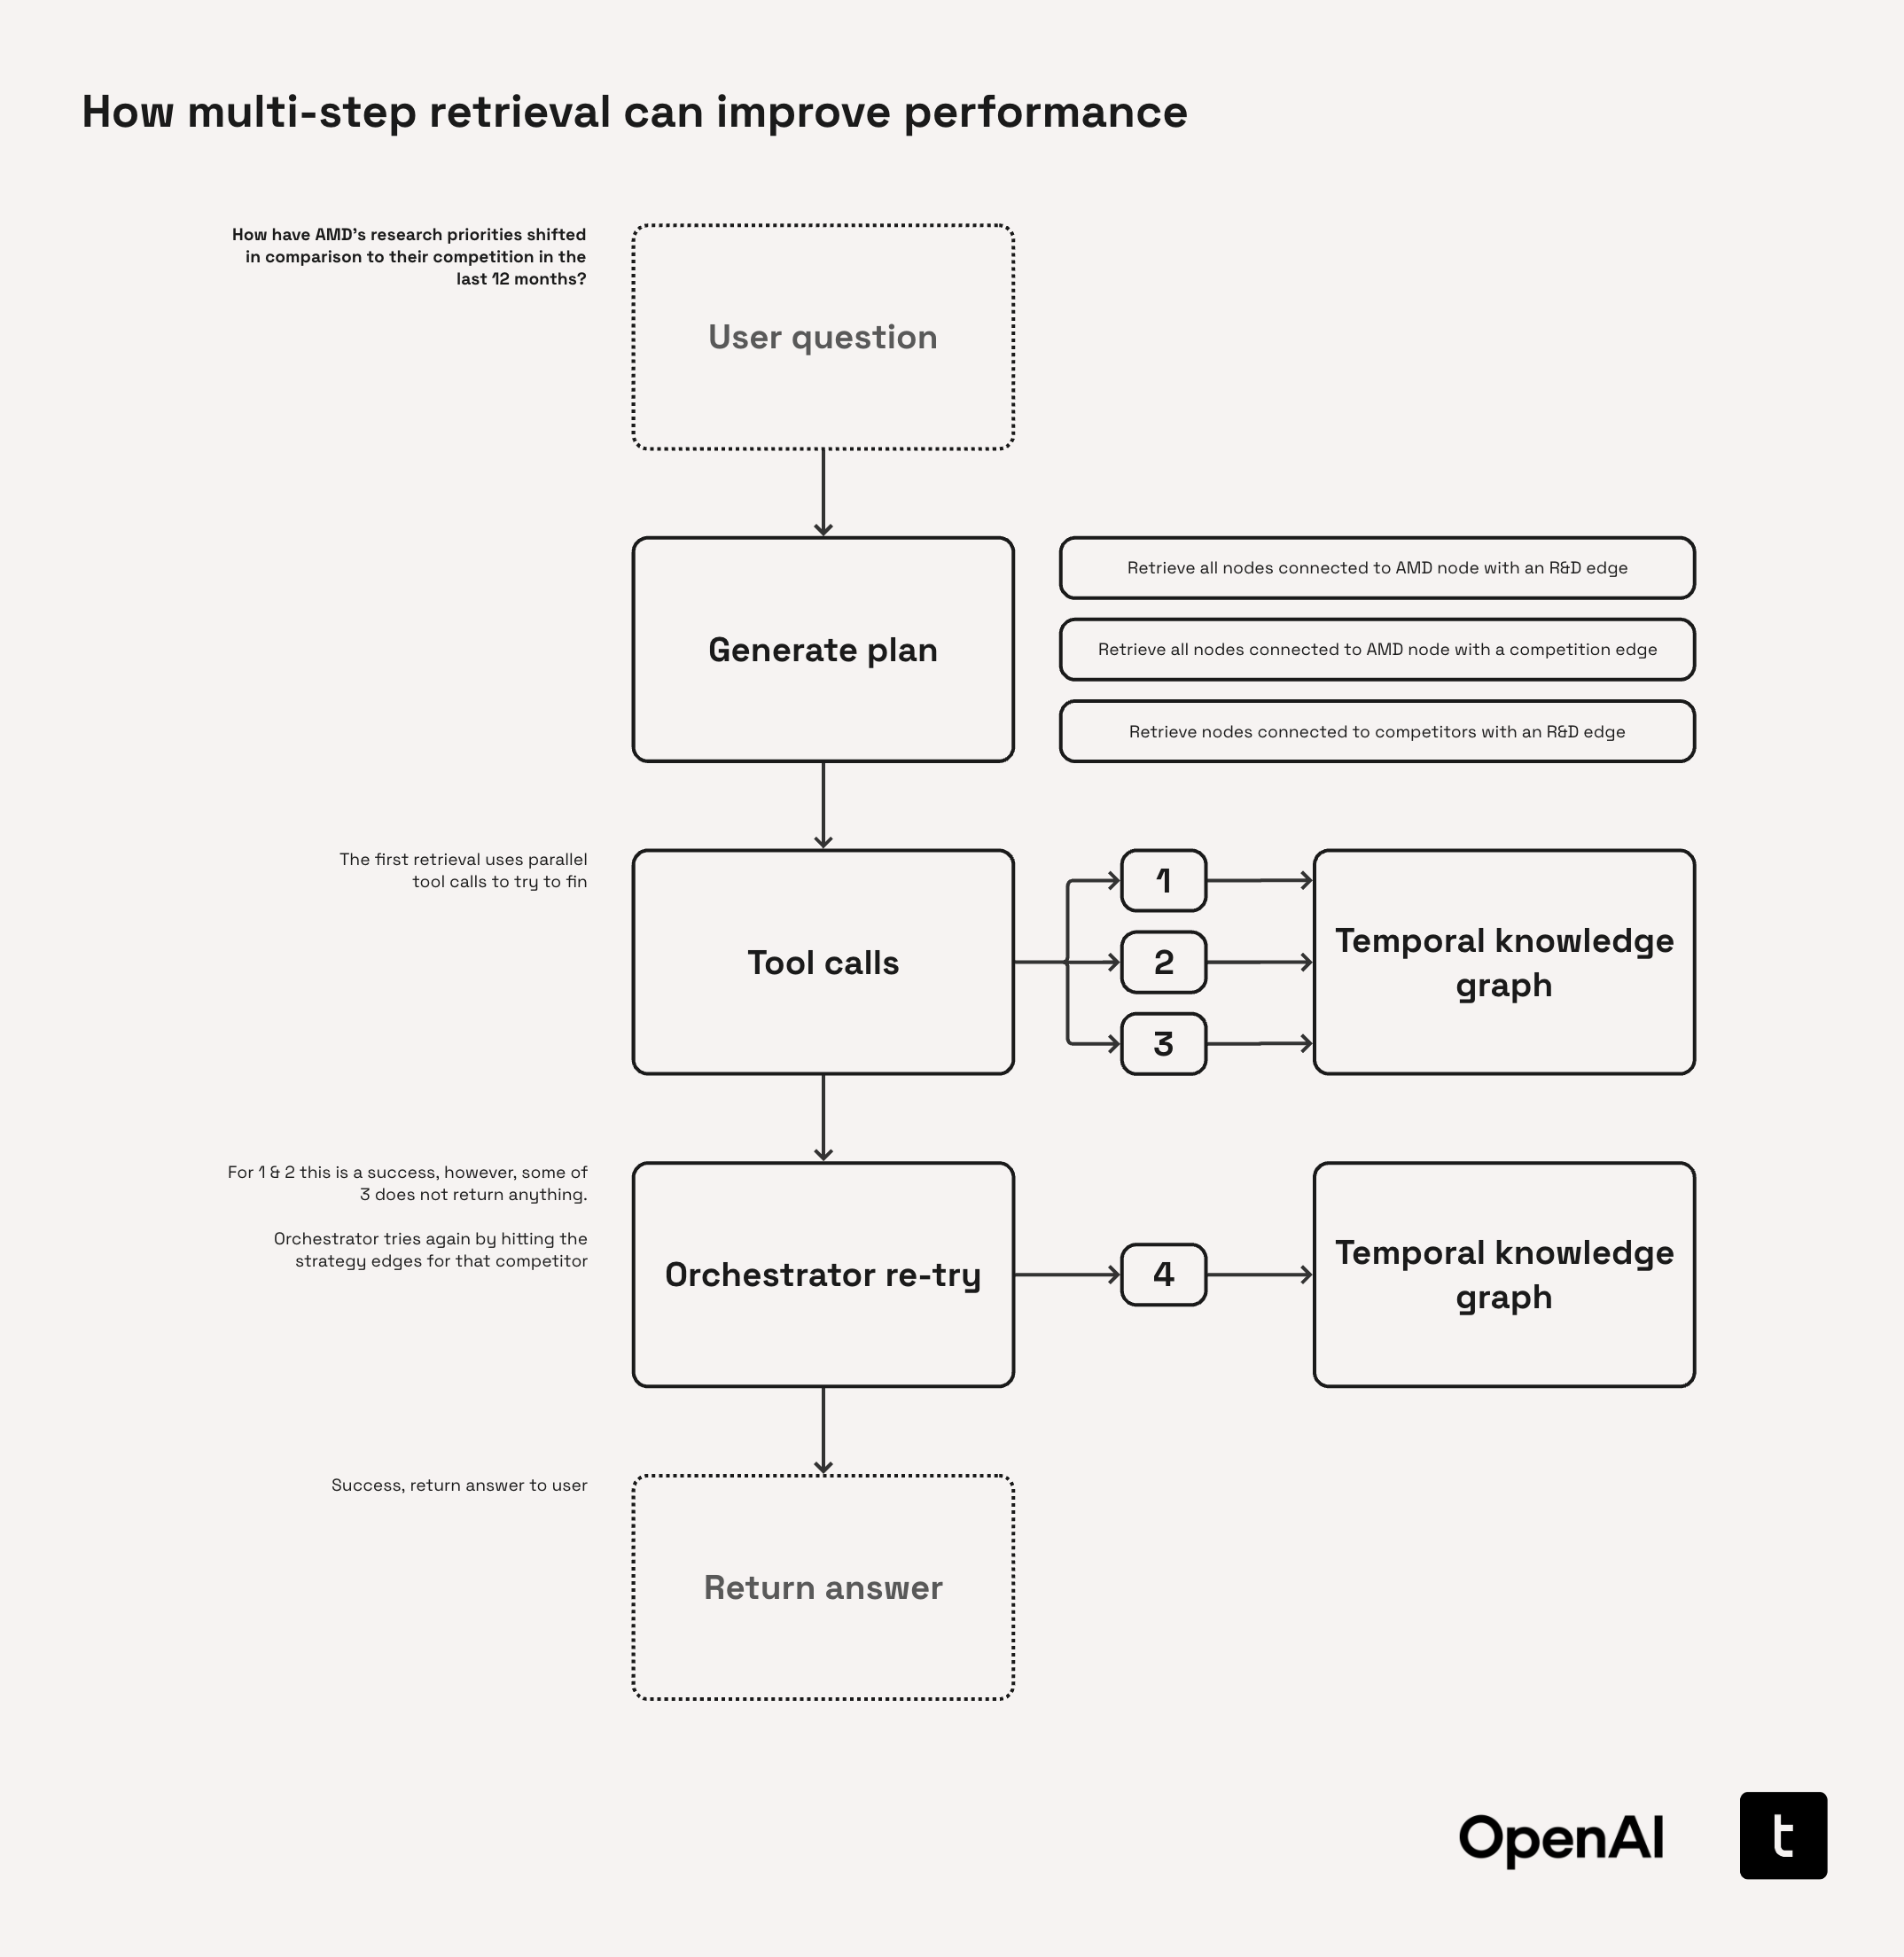 -->
<img
  src="../../../images/10_multi_step_retrieval.png"
  alt="Multi Retrieval Agent"
  style="width:891px; height:auto;"
/>

In this case, the initial query to the knowledge graph returned no information on some competitors’ R&D activities. Rather than failing silently, the system pivoted to an alternative source—the strategy content—and successfully located the missing information. This multi-step approach allowed it to navigate sparse data and deliver a complete response to the user.

## 4.1. Building our Retrieval Agent

At a high level, we will build out the following structure:
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>User question → Planner → Orchestrator</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      A planner utilising GPT 4.1 will decompose the user's question into a small sequence of proposed graph operations. This is then passed to the orchestrator to execute
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Tool calls to retrieve information from the Temporal Knowledge Graph</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Considering the user query and the plan, the Orchestrator (o4-mini) makes a series of initial tool calls to retrieve information from the knowledge graph
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Loop until done → Generate answer</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The responses to the tool calls are fed back to the Orchestrator which can then decide to either make more queries to the graph or answer the user's question
    </p>
  </li>
</ol>


<!-- 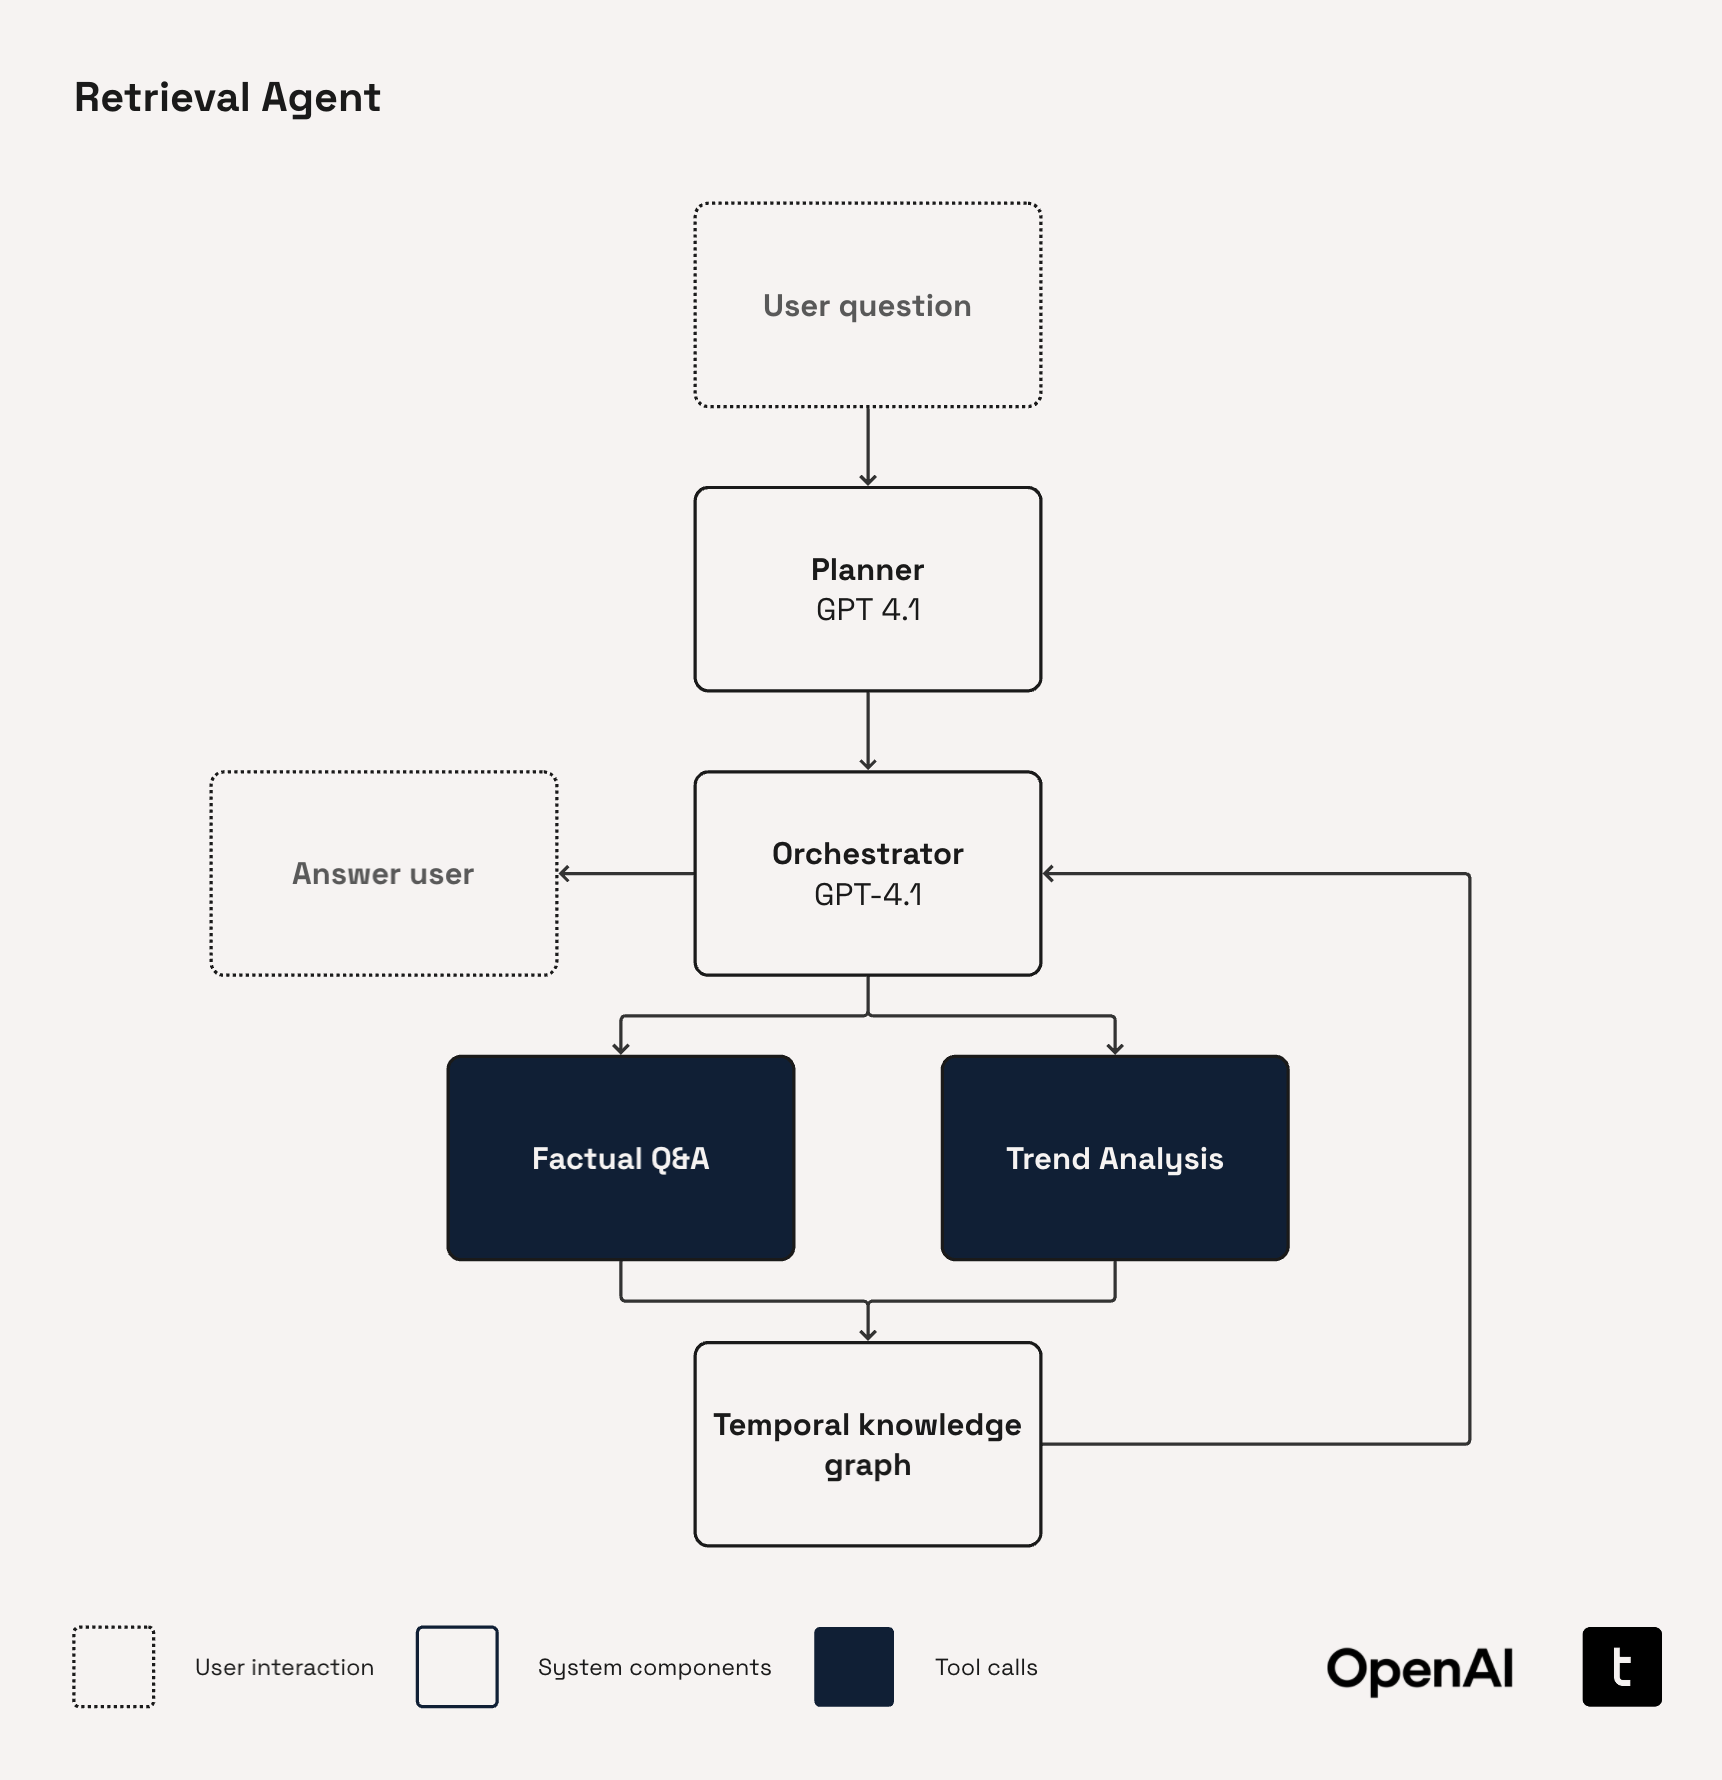 -->
<img
  src="../../../images/11_retrieval_agent.png"
  alt="Retrieval Agent"
  style="width:791px; height:auto;"
/>

### 4.1.1. Imports

In [ ]:
%pip install --upgrade openai

### 4.1.2. (Re-)Initialise OpenAI Client

In [ ]:
from openai import AsyncOpenAI

client = AsyncOpenAI()

### 4.1.3. (Re-)Load our Temporal Knowledge Graph

In [ ]:
from cb_functions import build_graph, load_db_from_hf

conn = load_db_from_hf()
G = build_graph(conn)

print(G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")

### 4.1.4. Planner
Planning steps are incorporated in many modern LLM applications. 

The explicit inclusion of a planning step improves overall performance by having the system consider the full scope of the problem before acting.

In this implementation, the plan remains static. In longer-horizon agentic pipelines, however, it's common to include mechanisms for replanning or updating the plan as the system progresses. 

Broadly, planners take two forms:
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Task-orientated (used in this cookbook)</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The planner outlines the concrete subtasks the downstream agentic blocks should execute. The tasks are phrased in an action-orientated sense such as "1. Extract information on R&amp;D activities of Company IJK between 2018–2020." These planners are typically preferred when the goal is mostly deterministic and the primary risk is skipping or duplicating work.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Example tasks where this approach is useful:
    </p>
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1.2em;">
      <li><strong>Law</strong>: <em>"Extract and tabulate termination-notice periods from every master service agreement executed in FY24"</em></li>
      <li><strong>Finance</strong>: <em>"Fetch every 10-K filed by S&amp;P 500 banks for FY24, extract tier-1 capital and liquidity coverage ratios, and output a ranked table of institutions by capital adequacy"</em></li>
      <li><strong>Automotive</strong>: <em>"Compile warranty-claim counts by component for Model XYZ vehicles sold in Europe since the new emissions regulation came into force"</em></li>
      <li><strong>Manufacturing</strong>: <em>"Analyse downtime logs from each CNC machine for Q1 2025, classify the root-cause codes, and generate a Pareto chart of the top five failure drivers"</em></li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Hypothesis-orientated</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The plan is framed as a set of hypotheses the system can confirm, reject, or refine in response to the user's question. Each step represents a testable claim, optionally paired with suggested actions. This approach excels in open-ended research tasks where new information can significantly reshape the solution space.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Example tasks where this approach is useful:
    </p>
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1.2em;">
      <li><strong>Law</strong>: <em>"Does the supplied evidence satisfy all four prongs of the fair-use doctrine? Evaluate each prong against relevant case law"</em></li>
      <li><strong>Pharmaceuticals</strong>: <em>"What emerging mRNA delivery methods could be used to target the IRS1 gene to treat obesity?"</em></li>
      <li><strong>Finance</strong>: <em>"Is Bank Alpha facing a liquidity risk? Compare its LCR trend, interbank borrowing costs, and deposit-outflow and anything else you find that is interesting"</em></li>
    </ul>
  </li>
</ol>


#### Prompting our planner
We will define two prompts (one `system` and one `user`) for the initial planner. 

The most notable characteristic of our system prompt below is the use of 'persona-based' prompting. We prompt the LLM giving it a persona of an internal company expert. This helps to frame the tone of the model's response to the behaviour that we want - a direct, action-orientated task list that is fit for the financial industry. 

This is then extended in the user prompt, where we prepend the `user_question` with information on this specific situation and how the planner should handle it. 

In production settings you can super-charge this template by dynamically enriching the prompt before each call. You can inject information on the user's profile —sector, role, preferred writing style, prior conversation context—so the planner tailors its actions to their environment. You can also perform a quick “question-building” loop: have the assistant propose clarifying questions, gather the answers, and merge them back into the prompt so the planner starts with a well-scoped, information-rich request rather than a vague one. 

Another flow that can work well is to allow users to view the plan and optionally edit it before it is executed. This is particularly effective when your AI system is acting in more of an assistant role. Giving domain experts such as lawyers or pharmaceutical researchers the flexibility to steer and incorporate their ideas and research directions deeper into the system often has the dual benefit of improving both system performance and end user satisfaction.

In [ ]:
async def initial_planner(user_question: str) -> str:
    """Return an initial plan for answering the user's question."""
    initial_planner_system_prompt = (
        "You work for the leading financial firm, ABC Incorporated, one of the largest financial firms in the world. "
        "Due to your long and esteemed tenure at the firm, various equity research teams will often come to you "
        "for guidance on research tasks they are performing. Your expertise is particularly strong in the area of "
        "ABC Incorporated's proprietary knowledge base of earnings call transcripts. This contains details that have been "
        "extracted from the earnings call transcripts of various companies with labelling for when these statements are, or "
        "were, valid. You are an expert at providing instructions to teams on how to use this knowledge graph to answer "
        "their research queries. \n"
        "The teams will have access to the following tools to help them retrieve information from the knowledge graph: \n"
        "1. `factual_qa`: Queries the knowledge graph for time-bounded factual relationships involving a given entity and predicate. \n"
        "2. `trend_analysis`: Wraps the factual_qa tool with a specialised agent to perform in-depth trend analysis \n"
        "It shoudld also be noted that the trend_analysis tool can accept multiple predicate arguments as a list. \n "
        "You may recommend that multiple calls are made to the tools with different e.g., predicates if this is useful. \n "
        "Your recommendation should explain to the team how to retrieve the information from the database through these "
        "tools only. "
    )

    initial_planner_user_prompt = (
        "Your top equity research team has came to you with a research question they are trying to find the answer to. "
        "You should use your deep financial expertise to succinctly detail a step-by-step plan for retrieving "
        "this information from the the company's knowledge base of earnings call transcripts extracts. "
        "You should produce a concise set of individual research tasks required to thoroughly address the team's query. "
        "These tasks should cover all of the key points of the team's research task without overcomplicating it. \n\n"
        "The question the team has is: \n\n"
        f"{user_question} \n\n"
        "Return your answer under a heading 'Research tasks' with no filler language, only the plan."
    )

    input_messages = [
        {"role":"system", "content": initial_planner_system_prompt},
        {"role":"user", "content": initial_planner_user_prompt}
    ]

    initial_plan = await client.responses.create(
        model="gpt-4.1",
        input=input_messages
    )

    return initial_plan.output_text

In [ ]:
plan = await initial_planner("How can we find out how AMD's research priorties have changed in the last 4 years?")

In [ ]:
print(plan)

### 4.1.5. Function calling
[OpenAI function calling](https://platform.openai.com/docs/guides/function-calling?api-mode=responses) (otherwise known as tools) enable models to perform specific external actions by calling predefined functions. Some of the tools provided on the OpenAI platform include:
- **Code interpreter**: Executes code for data analysis, math, plotting, and file manipulation
- **Web search**: Include data from the internet in model response generation
- **File search**: Search the contents of uploaded files for context
- **Image generation**: Generate or edit images using GPT image
- **Remote MCP servers**: Give the model access to new capabilities via Model Context Protocol (MCP) servers

Other cookbooks cover how to build tools for use with LLMs. In this example, we’ll develop several tools designed to efficiently explore the temporal knowledge graph and help answer the user’s question.

There are several schools of thought on tool design, and the best choice depends on the application at hand.

<!-- 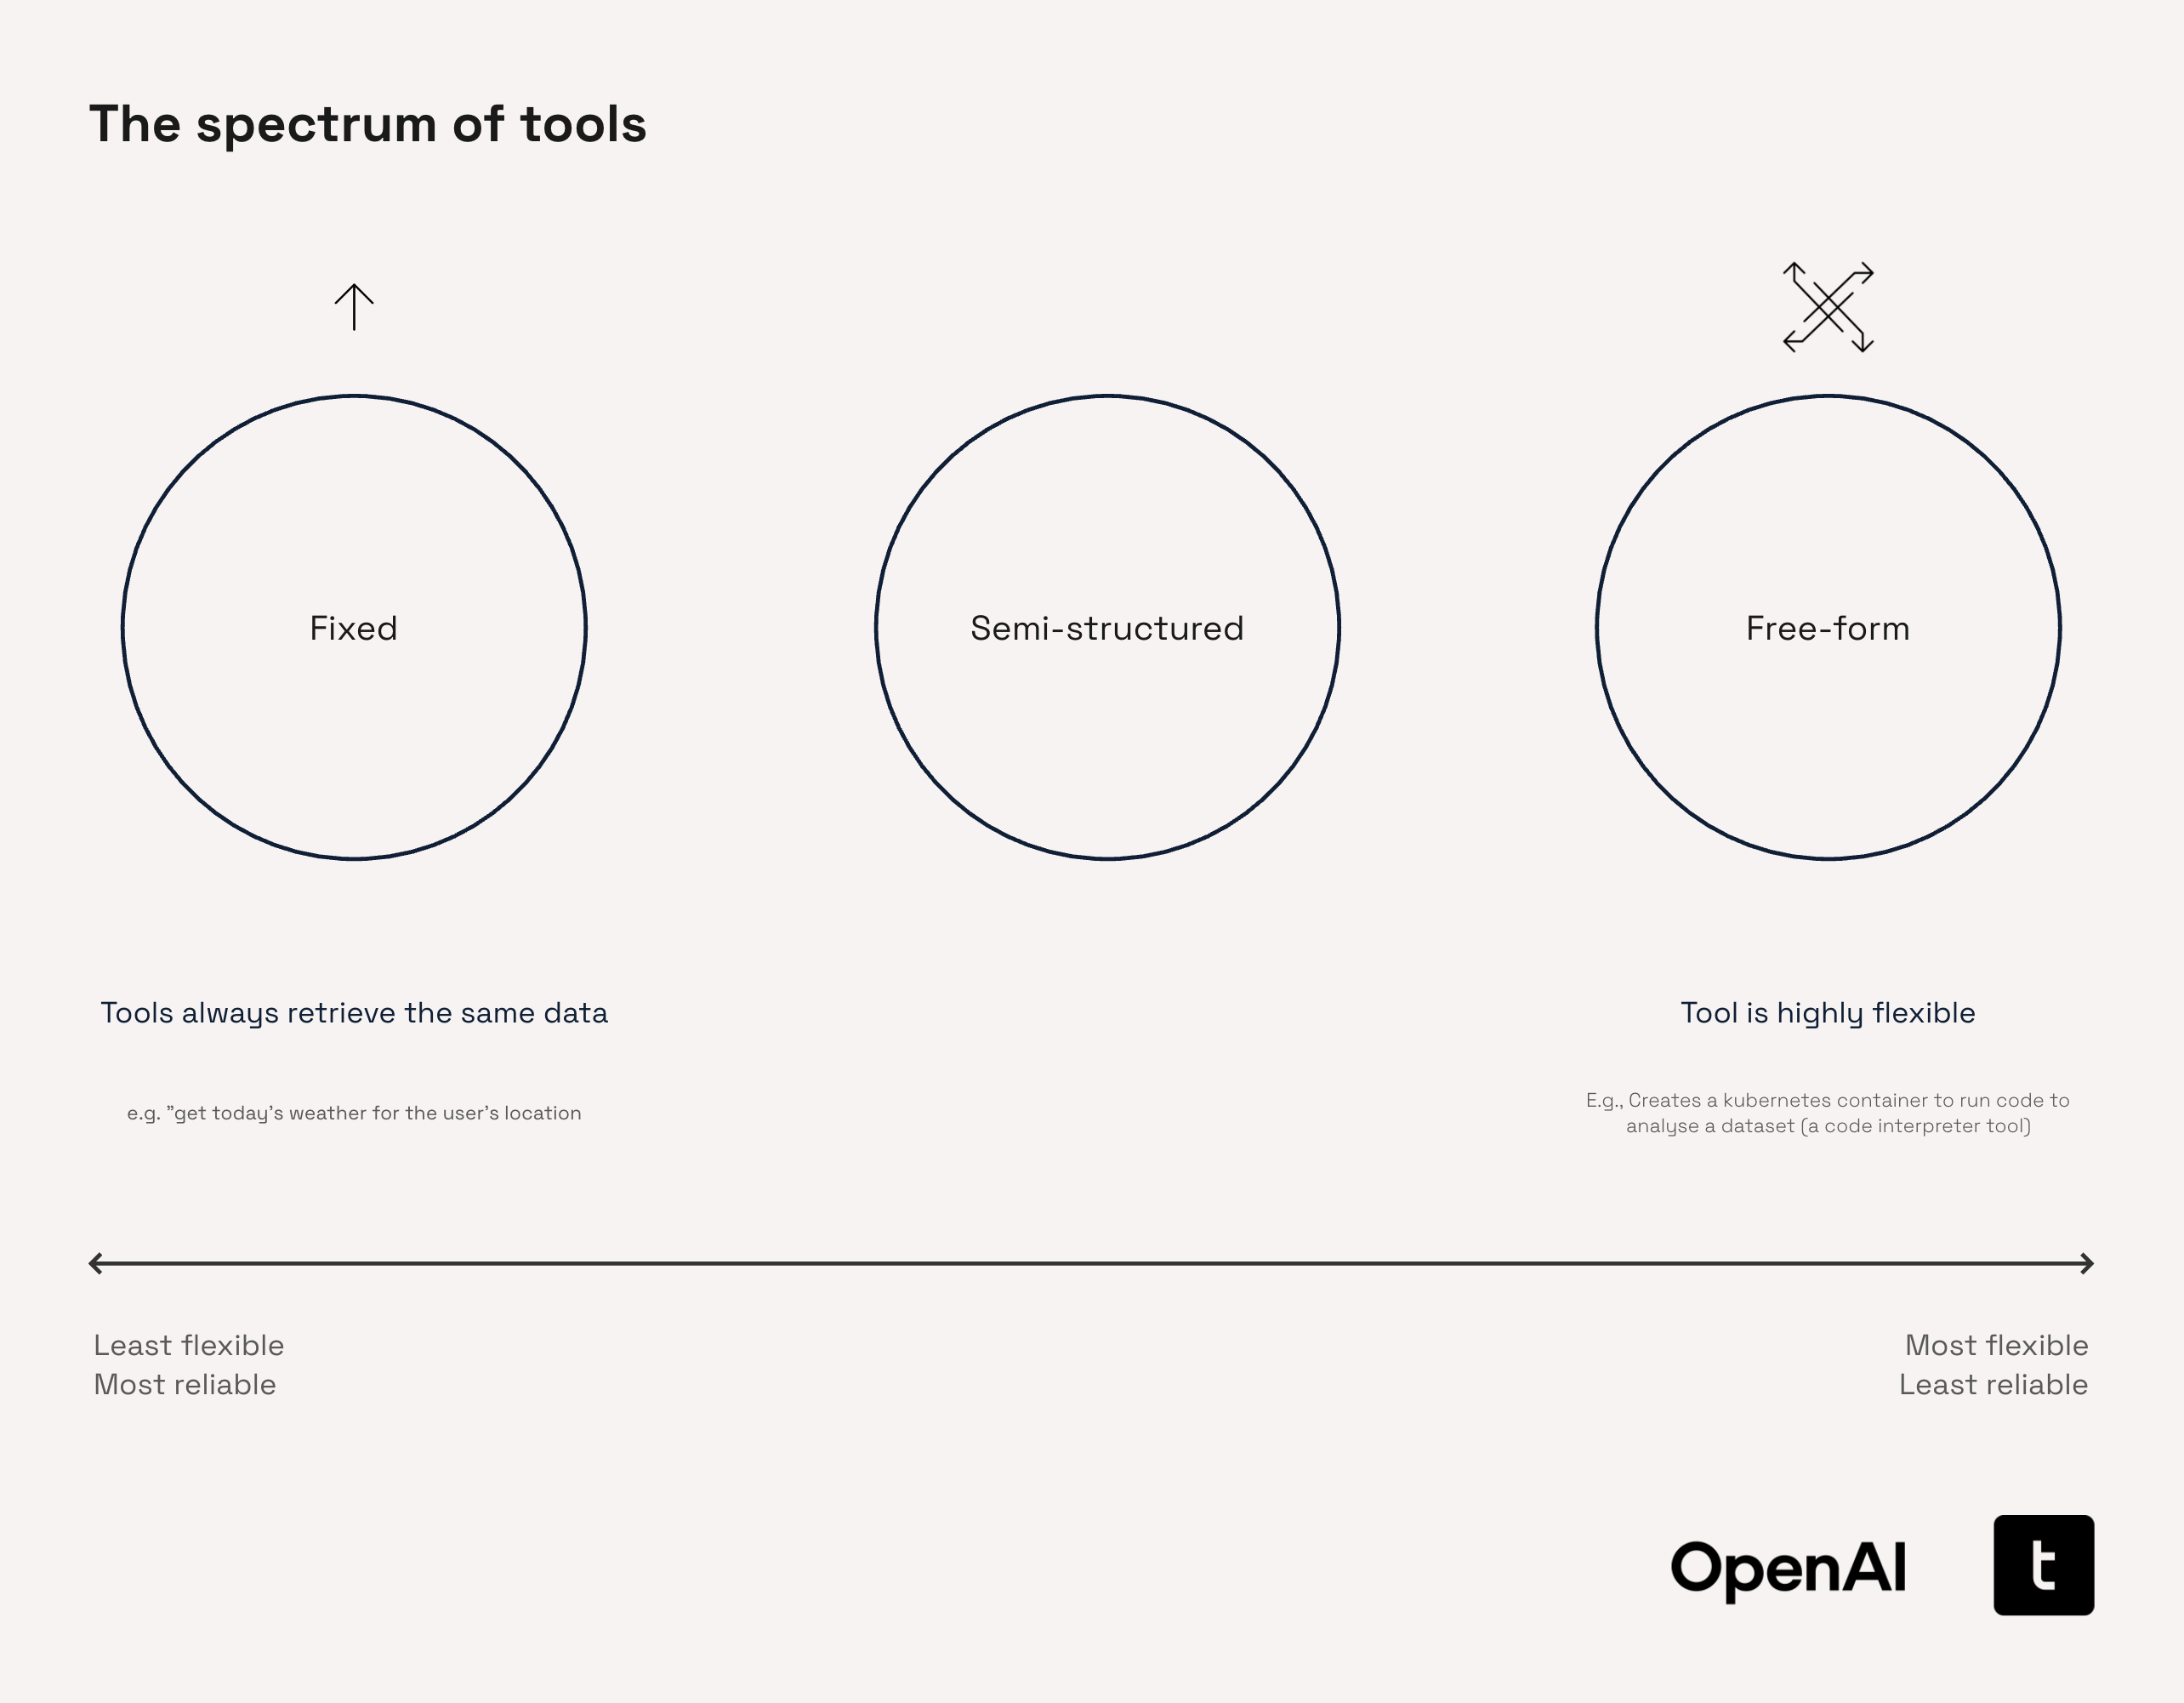 -->
<img
  src="../../../images/12_spectrum_of_tools.png"
  alt="Spectrum of tools"
  style="width:891px; height:auto;"
/>

#### Fixed Tools

In this context, 'fixed' tools refer to those with a rigid, well-defined functionality. Typically, these tools accept a limited number of specific arguments and perform clearly outlined tasks. For instance, a fixed tool might execute a simple query such as "Get today's weather for the user's location." Due to their structured nature, these tools excel at performing consistent lookups or monitoring values within structured environments like ERP systems, regulatory frameworks, or dashboards. However, their rigidity limits flexibility, prompting users to often replace them with more dynamic, traditional data pipelines, particularly for continuous data streaming.

Examples of fixed tools in various industries include:

* **Finance**: *"What's the current exchange rate from USD to EUR?"*
* **Pharmaceuticals**: *"Retrieve the known adverse effects for Drug ABC."*
* **Manufacturing**: *"What was the defect rate for batch #42?"*

#### Free-form

Free-form tools represent the most flexible end of the tool spectrum. These tools are capable of executing complex, open-ended tasks with minimal constraints on input structure. A common example is a code interpreter, capable of handling diverse analytical tasks. Although their flexibility offers substantial advantages, they can also introduce unpredictability and can be more challenging to optimize for consistent reliability.

In industry applications, free-form tools can look like:

* **Finance**: *"Backtest this momentum trading strategy using ETF price data over the past 10 years, and plot the Sharpe ratio distribution."*
* **Automotive**: *"Given this raw telemetry log, identify patterns that indicate early brake failure and simulate outcomes under various terrain conditions."*
* **Pharmaceuticals**: *"Create a pipeline that filters for statistically significant gene upregulation from this dataset, then run gene set enrichment analysis and generate a publication-ready figure."*


#### Semi-structured Tools (used in this cookbook)

Modern agentic workflows frequently require tools that effectively balance structure and flexibility. Semi-structured tools are designed specifically to manage this middle ground. They accept inputs in moderately complex formats—such as text fragments, JSON-like arguments, or small code snippets—and often embed basic reasoning, retrieval, or decision-making capabilities. These tools are ideal when tasks are well-defined but not entirely uniform, such as when the required dataset or service is known, but the query or expected output varies.

Two common paradigms of semi-structured tools are:

* **Extended Capabilities**: Tools that function as specialized agents themselves, incorporating internal logic and analysis routines
* **Flexible Argument Interfaces**: Tools permitting the LLM to pass expressive yet structured arguments, such as detailed queries, filters, or embedded functions

Semi-structured tools are particularly valuable when:

* Delegating specific yet non-trivial tasks (like searches, transformations, or summarizations) to specialized tools
* The source data or APIs are known, but the results returned can be unpredictable

In production environments, these tools are often preferable to free-form tools, like code interpreters, due to their enhanced reliability and performance. For instance, executing complex, multi-step queries against large Neo4j knowledge graphs is more reliable and efficient using optimized Cypher queries templated within semi-structured tools rather than generating each query from scratch.

Industry applications of semi-structured tools include:

* **Finance**: *"Extract all forward-looking risk factors from company filings for Q2 2023."*
* **Automotive**: *"Identify recurring electrical faults from maintenance logs across EV models launched after 2020."*
* **Pharmaceuticals**: *"Locate omics data supporting the hypothesis that a specific mRNA treatment effectively upregulates the IRS1 gene."*


#### Creating tools for our retriever to use

##### Factual Q&A
The `factual_qa` tool provides an efficient way for our agent to retrieve information from our temporal knowledge graph pertaining to a particular company, topic, and date range. This will help the agent answer questions about the data such as "What were AMD's earnings in Q3 2017?"

This tool sits somewhere in the middle of the fixed and semi-structured tools we introduced earlier. This is generally quite a rigid tool in that it restricts the agent to a small number of parameters. However, the degrees of freedom in the input are large and the tool is still flexible in what information it can retrieve from the knowledge graph. This helps avoid the need for the core agent to write new queries for networkx from scratch on each query, improving accuracy and latency.

The tool has the following arguments:
- `entity`: This is the entity (or object with respect to triplet ontology) that the tool should retrieve information for
- `start_date_range`: This is the lower bound of the date range that the tool should retrieve over
- `end_date_range`: This is the upper bound of the date range that the tool should retrieve over
- `predicate`: This is the name of the predicate that the tool will connect the `entity` to perform a retrieval

We begin by loading the predicate definitions. We will use these to improve error tolerance in the tool, using a GPT-4.1-nano to normalize the predicate passed in the argument to a valid predicate name. 

In [ ]:
# Redefine the predicate definitions as we will need them here
PREDICATE_DEFINITIONS = {
    "IS_A": "Denotes a class-or-type relationship between two entities (e.g., 'Model Y IS_A electric-SUV'). Includes 'is' and 'was'.",
    "HAS_A": "Denotes a part-whole relationship between two entities (e.g., 'Model Y HAS_A electric-engine'). Includes 'has' and 'had'.",
    "LOCATED_IN": "Specifies geographic or organisational containment or proximity (e.g., headquarters LOCATED_IN Berlin).",
    "HOLDS_ROLE": "Connects a person to a formal office or title within an organisation (CEO, Chair, Director, etc.).",
    "PRODUCES": "Indicates that an entity manufactures, builds, or creates a product, service, or infrastructure (includes scale-ups and component inclusion).",
    "SELLS": "Marks a commercial seller-to-customer relationship for a product or service (markets, distributes, sells).",
    "LAUNCHED": "Captures the official first release, shipment, or public start of a product, service, or initiative.",
    "DEVELOPED": "Shows design, R&D, or innovation origin of a technology, product, or capability. Includes 'researched' or 'created'.",
    "ADOPTED_BY": "Indicates that a technology or product has been taken up, deployed, or implemented by another entity.",
    "INVESTS_IN": "Represents the flow of capital or resources from one entity into another (equity, funding rounds, strategic investment).",
    "COLLABORATES_WITH": "Generic partnership, alliance, joint venture, or licensing relationship between entities.",
    "SUPPLIES": "Captures vendor–client supply-chain links or dependencies (provides to, sources from).",
    "HAS_REVENUE": "Associates an entity with a revenue amount or metric—actual, reported, or projected.",
    "INCREASED": "Expresses an upward change in a metric (revenue, market share, output) relative to a prior period or baseline.",
    "DECREASED": "Expresses a downward change in a metric relative to a prior period or baseline.",
    "RESULTED_IN": "Captures a causal relationship where one event or factor leads to a specific outcome (positive or negative).",
    "TARGETS": "Denotes a strategic objective, market segment, or customer group that an entity seeks to reach.",
    "PART_OF": "Expresses hierarchical membership or subset relationships (division, subsidiary, managed by, belongs to).",
    "DISCONTINUED": "Indicates official end-of-life, shutdown, or termination of a product, service, or relationship.",
    "SECURED": "Marks the successful acquisition of funding, contracts, assets, or rights by an entity.",
}

We define several helper functions for the factual QA tool.

First is `_as_datetime`. This tool is used to coerce the arguments that define the date range to the correct datetime format.

Next, we introduce two new data models: `PredicateMatching` and `PredicateMatchValidation`. `PredicateMatching` defines the output format for the GPT-4.1-nano call that matches the predicate in the function arguments to valid predicate names. `PredicateMatchValidation` then performs a secondary validation step to assert that this output from GPT-4.1-nano is a valid predicate name, leveraging a Pydantic field validator. This process helps to ensure that the tool runs smoothly and helps to eliminate some of the rare edge cases which would lead to an unsuccessful graph query.

In [ ]:
# Helper functions and models
from datetime import datetime

from pydantic import BaseModel, Field, ValidationError, field_validator


def _as_datetime(ts) -> datetime | None:
    """Helper function to coerce possible timestamp formats to `datetime`."""  # noqa: D401
    if ts is None:
        return None
    if isinstance(ts, datetime):
        return ts
    for fmt in ("%Y-%m-%d", "%Y/%m/%d", "%Y-%m-%dT%H:%M:%S"):
        try:
            return datetime.strptime(ts, fmt)
        except ValueError:
            continue
    return None

class PredicateMatching(BaseModel):
    """Class for structured outputs from model to coerce input to correct predicate format."""
    reasoning: str = Field(description="Use this space to reason about the correct predicate to match.")
    predicate_match: str = Field(description="The predicate that aligns with the dictionary.")


class PredicateMatchValidation(BaseModel):
    """Class for validating the outputs from the model that tries to coerce predicate argument to a real predicate."""
    predicate: str

    @field_validator("predicate")
    @classmethod
    def predicate_in_definitions(cls, v):
        """Return an error string if the predicate is not in PREDICATE_DEFINITIONS."""
        if v not in PREDICATE_DEFINITIONS:
            return f"Error: '{v}' is not a valid predicate. Must be one of: {list(PREDICATE_DEFINITIONS.keys())}"
        return v

Our factual QA tool can be decomposed into four steps.
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Predicate coercion</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      If the provided predicate is not found in the <code>PREDICATE_DEFINITIONS</code> dictionary, this step uses GPT-4.1-nano to coerce it into a valid predicate
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Entity location</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Performs fuzzy matching to identify the corresponding entity nodes within the networkx graph
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Edge collection</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Retrieves both inbound and outbound edges associated with the identified entity nodes
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Response formatting</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Structures the collected information into a well-formatted response that is easy for the orchestrator to consume
    </p>
  </li>
</ol>


In [ ]:
async def factual_qa(
    entity: str,
    start_date_range: datetime,
    end_date_range: datetime,
    predicate: str
) -> str:
    """
    Query the knowledge-graph for relationships attached to *entity* that match
    *predicate* and fall within the requested time-window.

    The response is rendered as:

        Subject  –  PREDICATE  –  Object   [Valid-From]
            Statement: "..."
            Type: FACT   •   Value: 42

    If no matches are found (or on error) a human-readable explanation is returned.
    """
    # Checks that the date range passed is logical
    if start_date_range > end_date_range:
        return (
            "You used the `factual_qa` tool incorrectly last time. You provided a "
            "`start_date_range` that was more recent than the `end_date_range`. "
            "`end_date_range` must be ≥ `start_date_range`."
        )

    # ---- (1) predicate coercion / validation -----------------------
    if predicate not in PREDICATE_DEFINITIONS:
        try:
            predicate_definitions_str = "\n".join(
                f"- {k}: {v}" for k, v in PREDICATE_DEFINITIONS.items()
            )
            coercion_prompt = (
                "You are a helpful assistant that matches predicates to a dictionary of "
                "predicate definitions. Return the best-matching predicate **and** your reasoning.\n\n"
                f"Dictionary:\n{predicate_definitions_str}\n\n"
                f"Predicate to match: {predicate}"
            )

            completion = await client.beta.chat.completions.parse(
                model="gpt-4.1-nano",
                messages=[{"role": "user", "content": coercion_prompt}],
                response_format=PredicateMatching,
            )
            coerced_predicate = completion.choices[0].message.parsed.predicate_match

            # Validate against the enum / model we expect
            _ = PredicateMatchValidation(predicate=coerced_predicate)
            predicate = coerced_predicate
        except ValidationError:
            return (
                "You provided an invalid predicate. "
                f"Valid predicates are: {list(PREDICATE_DEFINITIONS.keys())}"
            )
        except Exception:
            # Coercion failed – fall back to original predicate
            pass

    predicate_upper = predicate.upper()
    entity_lower = entity.lower()

    # ---- (2) locate the entity node by fuzzy match -----------------
    try:
        target_node = None
        for node, data in G.nodes(data=True):
            node_name = data.get("name", str(node))
            if entity_lower in node_name.lower() or node_name.lower() in entity_lower:
                target_node = node
                break
        if target_node is None:
            return f"Entity '{entity}' not found in the knowledge graph."
    except Exception as e:
        return f"Error locating entity '{entity}': {str(e)}"

    # ---- (3) collect matching edges (outgoing + incoming) ----------
    matching_edges = []

    def _edge_ok(edge_data):
        """Return True if edge is temporally valid in the requested window."""
        valid_at = _as_datetime(edge_data.get("valid_at"))
        invalid_at = _as_datetime(edge_data.get("invalid_at"))
        if valid_at and end_date_range < valid_at:
            return False
        if invalid_at and start_date_range >= invalid_at:
            return False
        return True

    # Outgoing
    try:
        for _, tgt, _, ed in G.out_edges(target_node, data=True, keys=True):
            pred = ed.get("predicate", "").upper()
            if predicate_upper in pred and _edge_ok(ed):
                matching_edges.append(
                    {
                        "subject": G.nodes[target_node].get("name", str(target_node)),
                        "predicate": pred,
                        "object": G.nodes[tgt].get("name", str(tgt)),
                        **ed,
                    }
                )
    except Exception:
        pass

    # Incoming
    try:
        for src, _, _, ed in G.in_edges(target_node, data=True, keys=True):
            pred = ed.get("predicate", "").upper()
            if predicate_upper in pred and _edge_ok(ed):
                matching_edges.append(
                    {
                        "subject": G.nodes[src].get("name", str(src)),
                        "predicate": pred,
                        "object": G.nodes[target_node].get("name", str(target_node)),
                        **ed,
                    }
                )
    except Exception:
        pass

    # ---- (4) format the response -----------------------------------
    if not matching_edges:
        s = start_date_range.strftime("%Y-%m-%d")
        e = end_date_range.strftime("%Y-%m-%d")
        return (
            f"No data found for '{entity}' with predicate '{predicate}' "
            f"in the specified date range ({s} to {e})."
        )

    lines = [
        f"Found {len(matching_edges)} relationship"
        f"{'s' if len(matching_edges) != 1 else ''} for "
        f"'{entity}' with predicate '{predicate}':",
        ""
    ]

    for idx, edge in enumerate(matching_edges, 1):
        value        = edge.get("value")
        statement    = edge.get("statement")
        statement_tp = edge.get("statement_type")
        valid_from   = edge.get("valid_at")

        # First line: Subject – PREDICATE – Object
        triplet = f"{edge['subject']} – {edge['predicate']} – {edge['object']}"
        if valid_from:
            triplet += f"  [Valid-from: {valid_from}]"
        if value is not None:
            triplet += f"  (Value: {value})"
        lines.append(f"{idx}. {triplet}")

        # Second line: Statement (truncated to 200 chars) + Type
        if statement:
            snippet = statement if len(statement) <= 200 else statement[:197] + "…"
            lines.append(f'   Statement: "{snippet}"')
        if statement_tp:
            lines.append(f"   Type: {statement_tp}")

        lines.append("")  # spacer

    return "\n".join(lines)

In [ ]:
result = await factual_qa(
    entity="Amd",
    start_date_range=datetime(2016, 1, 1),
    end_date_range=datetime(2020, 1, 1),
    predicate="launched"
)
print(result)

In [ ]:
factual_qa_schema = {
  "type": "function",
  "name": "factual_qa",
  "description": "Queries the knowledge graph for time-bounded factual relationships involving a given entity and predicate.",
  "parameters": {
    "type": "object",
    "properties": {
      "entity": {
        "type": "string",
        "description": "The name of the entity (e.g., company or organization) whose relationships should be retrieved."
      },
      "start_date_range": {
        "type": "string",
        "format": "date",
        "description": "The start (inclusive) of the date range to filter factual relationships."
      },
      "end_date_range": {
        "type": "string",
        "format": "date",
        "description": "The end (inclusive) of the date range to filter factual relationships."
      },
      "predicate": {
        "type": "string",
        "description": "The type of relationship or topic to match against the knowledge graph (e.g., 'invested_in', 'founded')."
      }
    },
    "required": [
      "entity",
      "start_date_range",
      "end_date_range",
      "predicate"
    ],
    "additionalProperties": False
  }
}


##### Trend analysis
The `trend_analysis` tool is designed to compare how specific metrics or signals evolve over time—often across multiple companies and/or topics. It exposes a structured interface that lets the agent specify the time window, subject set, and target metric, then delegates the comparison logic to a specialised agent for handling this analysis. In this case we utilised o4-mini with high reasoning effort as this is a 'harder' anaysis task.

This allows us to build a highly focused and optimised pipeline for dealing with comparison-style tasks. Whilst this could be built into the core orchestrator itself, it's often more manageable to split this into specialised tools so they can be more easily swapped out or updated later without much concern for impact on the wider system.

In [ ]:
import asyncio
from datetime import datetime


async def trend_analysis(
    question: str,
    companies: list[str],
    start_date_range: datetime,
    end_date_range: datetime,
    topic_filter: list[str],
) -> str:
    """
    Aggregate knowledge-graph facts for multiple companies and topics.

    For every (company, topic) pair, this calls `factual_qa` with the same
    date window and returns one concatenated, human-readable string.

    Sections are separated by blank lines and prefixed with:
        === <Company> · <Topic> ===

    If `factual_qa` raises an exception, an ⚠️  line with the error message
    is included in place of that section.
    """

    # -------- helper ------------------------------------------------------
    async def _fetch(company: str, predicate: str) -> str:
        return await factual_qa(
            entity=company,
            start_date_range=start_date_range,
            end_date_range=end_date_range,
            predicate=predicate,
        )

    # -------- schedule every call (concurrently) --------------------------
    pairs = [(c, p) for c in companies for p in topic_filter]
    tasks = [asyncio.create_task(_fetch(c, p)) for c, p in pairs]

    # -------- gather results ---------------------------------------------
    results = await asyncio.gather(*tasks, return_exceptions=True)

    # -------- assemble final string --------------------------------------
    sections: list[str] = []
    for (company, predicate), res in zip(pairs, results, strict=True):
        header = f"=== {company} · {predicate} ==="
        if isinstance(res, Exception):
            sections.append(f"{header}\n⚠️  {type(res).__name__}: {res}")
        else:
            sections.append(f"{header}\n{res}")

    joined = "\n\n".join(sections)

    analysis_user_prompt = (
        "You are a helpful assistant"
        "You specialise in providing in-depth analyses of financial data. "
        "You are provided with a detailed dump of data from a knowledge graph that contains data that has been "
        "extracted from companies' earnings call transcripts. \n"
        "Please summarise the trends from this, comparing how data has evolved over time in as much detail as possible. "
        "Your answer should only contain information that is derived from the data provided, do not lean on your internal "
        "knowledge. The knowledge graph contains data in the range 2016-2020. "
        "The data provided is: \n"
        f"{joined}\n\n"
        f"The user question you are summarizing for is: {question}"
    )

    analysis = await client.responses.create(
        model="o4-mini",
        input=analysis_user_prompt,
        reasoning={
            "effort": "high",
            "summary": "auto"
        }
    )

    return analysis.output_text


In [ ]:
result = await trend_analysis(
    question="How have AMD's research priorties changed over time?",
    companies=["AMD"],
    start_date_range=datetime(2016, 1, 1),
    end_date_range=datetime(2020, 1, 1),
    topic_filter=["launched", "researched", "developed"]
)
print(result)

In [ ]:
trend_analysis_schema = {
  "type": "function",
  "name": "trend_analysis",
  "description": "Aggregates and compares knowledge-graph facts for multiple companies and topics over a time range, returning a trend summary.",
  "parameters": {
    "type": "object",
    "properties": {
      "question": {
        "type": "string",
        "description": "A free-text question that guides the trend analysis (e.g., 'How did hiring trends differ between companies?')."
      },
      "companies": {
        "type": "array",
        "items": {
          "type": "string"
        },
        "description": "List of companies to compare (e.g., ['Apple', 'Microsoft'])."
      },
      "start_date_range": {
        "type": "string",
        "format": "date",
        "description": "The start (inclusive) of the date range to filter knowledge-graph facts."
      },
      "end_date_range": {
        "type": "string",
        "format": "date",
        "description": "The end (inclusive) of the date range to filter knowledge-graph facts."
      },
      "topic_filter": {
        "type": "array",
        "items": {
          "type": "string"
        },
        "description": "List of predicates (topics) to query for each company (e.g., ['hired_executive', 'launched_product'])."
      }
    },
    "required": [
      "question",
      "companies",
      "start_date_range",
      "end_date_range",
      "topic_filter"
    ],
    "additionalProperties": False
  }
}

In [ ]:
tools = [
    factual_qa_schema,
    trend_analysis_schema
]

### 4.1.6. Retriever

We design a simple retriever containing only a run method which encompasses the planning step and a while loop to execute each tool call that the orchestrator makes before returning a final answer.

In [ ]:
import json


class MultiStepRetriever:
    """Retrieve information in multiple steps using an OpenAI client."""
    def __init__(self, client: AsyncOpenAI):
        self.client = client
        # This helps us simplify our tool calling functionality in run()
        self.function_map = {
            "factual_qa": factual_qa,
            "trend_analysis": trend_analysis
        }

    async def run(self, user_question: str) -> tuple[str, dict]:
        """Run the multi-step retrieval process for a user question."""
        # -------------------------------------------------------
        # Step 1: Generate initial plan
        # -------------------------------------------------------

        initial_plan = await initial_planner(user_question=user_question)

        # -------------------------------------------------------
        # Step 2: Make initial model call
        # -------------------------------------------------------

        retriever_user_prompt = (
            "You are a helpful assistant. "
            "You are provided with a user question: \n\n"
            f"{user_question} \n\n"
            "You have access to a set of tools. You may choose to use these tools to retrieve information to "
            "help you answer the user's question. These tools allow you to query a knowledge graph that contains "
            "information that has been extracted from companies' earnings call transcripts. "
            "You should not use your own memory of these companies to answer questions. "
            "When returning an answer to the user, all of your content must be derived from the content "
            "you have retrieved from the tools used. This is to ensure that is is accurate, as the data in "
            "this knowledge graph has been carefully check to ensure its accuracy. The knowledge graph contains "
            "data spanning from 2016-2020. \n\n"
            "You are provided with a plan of action as follows: \n"
            f"{initial_plan} \n\n"
            "You should generally stick to this plan to help you answer the question, though you may deviate "
            "from it should you deem it suitable. You may make more than one tool call."
        )

        input_messages = [
            {"role":"user", "content":retriever_user_prompt}
        ]

        response = await self.client.responses.create(
            model="gpt-4.1",
            input=input_messages,
            tools=tools,
            parallel_tool_calls=False,
        )

        # -------------------------------------------------------
        # Step 3: While loop until no more tool calls are made
        # -------------------------------------------------------

        tools_used = {}

        while response.output[0].type == "function_call":
            tool_call = response.output[0]
            args = json.loads(tool_call.arguments)
            name = tool_call.name

            if name in self.function_map:
                tool_func = self.function_map[name]
                tool_response_text = await tool_func(**args)

                input_messages.append(tool_call)
                input_messages.append({
                    "type": "function_call_output",
                    "call_id": tool_call.call_id,
                    "output": tool_response_text
                })

            tools_used[name] = [args, tool_response_text]

            response = await self.client.responses.create(
                model="gpt-4.1",
                input=input_messages,
                tools=tools,
                parallel_tool_calls=False
            )

        return response.output_text, tools_used

We can now run our MultiStepRetriever. 

We observe that the answer returned is detailed, and includes a detailed walkthrough of how AMD's research priorities evolved from 2016 to 2020, with references to the underlying quotes that were used to derive these answers.

In [ ]:
retriever = MultiStepRetriever(client=client)

answer, tools_used = await retriever.run(user_question="How have AMD's research & development priorities changed over time?")

print(answer)

We can also inspect the tools used by our MultiStepRetriever to answer this query.

In [ ]:
for key, value in tools_used.items():
    if value:
        print(f"{key}: {value[0]}")
    else:
        print(f"{key}: [empty list]")

[Appendix section A.5. "Scaling and Productionizing our Retrieval Agent"](./Appendix.ipynb) outlines some guidelines for how one could take the Retrieval Agent we've built up to production.

### 4.1.7. Selecting the right model for Multi-Step Knowledge-Graph Retrieval

Multi-step retrieval agents need strong reasoning to hop through entities and relations, verify answers, and decide what to do next.  Latency still matters to users, but usually *less* than raw accuracy. Hence, this is one of the domains where OpenAI's o3 and o4-mini reasoning models shine.

Once again, for development we recommend a “start big, then specialise” ladder:

1. **Start with o3** – ensure your retrieval logic (chaining, re-ranking, fallback prompts) is sound. o3 may also be the best choice for production if your retrieval system is working with particularly complex data such as pharmaceutical or legal data. You can test this by looking at the severity of performance degradation with smaller models. If the drop off in performance is large, consider sticking with o3
2. **Move to o4-mini**
   * **Prompt enhancement** - optimise your prompts to push the performance of the o4-mini system as close to that of the full o3 model
   * **Reinforcement fine-tuning (RFT)** - [OpenAI's Reinforcement Fine-Tuning](https://platform.openai.com/docs/guides/reinforcement-fine-tuning) offering enables you to fine-tune OpenAI's o-series models to improve their performance on hard reasoning tasks. With as little as ~50 golden answers you can leverage the power of reinforcement learning to fine-tune o4-mini which can help it come close or even exceed the base o3's performance on the same task
4. **Fallback to GPT 4.1 when latency dominates** – for cases when latency is particularly important or you've tuned your prompts well enough that performance drop-off is minimal, consider moving to the GPT 4.1 series

| Model       | Relative cost | Relative latency | Intelligence | Ideal role in workflow                               |
| ----------- | ------------- | ---------------- | - | ---------------------------------------------------- |
| *o3* | ★★★           | ★★               | ★★★ *(highest)* | Initial prototyping, working with complex data, golden dataset generation |
| *o4-mini*   | ★★            | ★               | ★★ | Main production engine, can push performance with RFT      |
| *GPT 4.1 series*   | ★ *(lowest)*          | ★ *(fastest)* | ★  | Latency-critical or large-scale background scoring   |

#### Why is Reinforcement Fine-Tuning powerful for long horizon, multi-step retrieval tasks?
RFT has a number of benefits over [Supervised Fine-Tuning](https://platform.openai.com/docs/guides/supervised-fine-tuning) or [Direct Preference Optimization](https://platform.openai.com/docs/guides/direct-preference-optimization) for this use case. 

Firstly, reinforcement fine-tuning can be performed with a far small number of examples, sometimes requiring as little as 50 training examples.

Additionally, RFT eliminates the necessity of providing labeled step-by-step trajectories. By supplying only the final correct answer, the system learns implicitly how to navigate the knowledge graph effectively. This feature is particularly valuable in real-world contexts where end users typically face time constraints and may struggle to curate the extensive sets of labeled examples (often numbering in the hundreds or thousands) required by traditional SFT methods.

## 4.2 Evaluating your Retrieval System

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">

  <!-- 1. Human-annotated “Golden Answers” -->
  <li style="margin-bottom: 1.2em;">
    <strong>Human-annotated “Golden Answers”</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      The traditional baseline for retrieval evaluation: a curated set of <em>query → gold answer</em> pairs,
      vetted by domain experts.  
      Metrics such as precision@k or recall@k are computed by matching retrieved passages
      against these gold spans.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      <strong>Pros:  </strong> Highest reliability, clear pass/fail thresholds, excellent for regression testing<br />
      <strong>Cons:  </strong> Expensive to create, slow to update, narrow coverage (quickly becomes stale
      when the knowledge base evolves)
    </p>
  </li>

  <!-- 2. Synthetically generated answers -->
  <li style="margin-bottom: 1.2em;">
    <strong>Synthetically generated answers</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Use an LLM to generate reference answers or judgments, enabling rapid, low-cost expansion
      of the evaluation set.  Three common pathways:
    </p>
    <ul style="list-style: disc; padding-left: 1em; margin-top: 0.25em; margin-bottom: 0.5em;">
      <li><strong>LLM-as-judge</strong>: Feed the query, retrieved passages, and candidate answer to a
          judge model that outputs a graded score or e.g., “yes / partial / no”</li>
      <li><strong>Tool-use pathway</strong>: For different question types you can either manually or synthetically generate the 'correct' tool-use pathways and score responses against this</li>
    </ul>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      <strong>Pros: </strong> Fast, infinitely scalable, easier to keep pace with a dynamic application specification<br />
      <strong>Cons: </strong> Judgement quality is typically of lower quality than expert human-annotated solutions
    </p>
  </li>

  <!-- 3. Human feedback -->
  <li style="margin-bottom: 1.2em;">
    <strong>Human feedback</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Collect ratings directly from end-users or domain reviewers (thumbs-up/down, five-star scores, pairwise
      comparisons).  Can be <em>in-the-loop</em> (model trains continuously on live feedback) or
      <em>offline</em> (periodic eval rounds).
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      <strong>Pros: </strong> Captures real-world utility, surfaces edge-cases synthetic tests miss<br />
      <strong>Cons: </strong> Noisy and subjective; requires thoughtful aggregation (e.g., ELO
      scoring), risk of user biases becoming incorporated in the model
    </p>
  </li>

</ol>

### Which is the best evaluation method?
There is no single best method. However, a workflow that we have found that works well on projects is:
1. Start building and iterate synthetic evaluations
2. Test with your golden human set of evaluations before deployment
3. Make it easy for end-users to annotate good and bad answers, and use this feedback to continue to develop your application over time


# 5. Prototype to Production
---

Transitioning your knowledge graph system from a proof-of-concept to a robust, production-grade pipeline requires you to address several key points:
- **Storing and retrieving high-volume graph data**
- **Mananging and pruning datasets**
- **Implementing concurrency in the ingestion pipeline**
- **Minimizing token cost**
- **Scaling retrieval agents**
- **Safeguards**

This section serves as a walkthrough of key considerations and best practices to ensure your temporally-aware knowledge graph can operate reliably in a real-world environment. A more detailed [Prototype to Production Appendix section](#a-prototype-to-production) can be found towards the end of this cookbook.

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">

<li style="margin-bottom: 1.2em;">
  <strong>Storing and Retrieving High-Volume Graph Data</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a1-storing-and-retrieving-high-volume-graph-data">Appendix section A.1. "Storing and Retrieving High-Volume Graph Data"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Manage scalability through thoughtful schema design, sharding, and partitioning. Clearly define entities, relationships, and ensure schema flexibility for future evolution. Use high-cardinality fields like timestamps for efficient data partitioning.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Temporal Validity & Versioning</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a12-temporal-validity-versioning">Appendix section A.1.2. "Temporal Validity & Versioning"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Include temporal markers (valid_from, valid_to) for each statement. Maintain historical records non-destructively by marking outdated facts as inactive and indexing temporal fields for efficient queries.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Indexing & Semantic Search</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a13-indexing-semantic-search">Appendix section A.1.3. "Indexing & Semantic Search"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Utilize B-tree indexes for efficient temporal querying. Leverage PostgreSQL’s pgvector extension for semantic search with approximate nearest-neighbor algorithms like ivfflat, ivfpq, and hnsw to optimize query speed and memory usage.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Managing and Pruning Datasets</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a2-managing-and-pruning-datasets">Appendix section A.2. "Managing and Pruning Datasets"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Establish TTL and archival policies for data retention based on source reliability and relevance. Implement automated archival tasks and intelligent pruning with relevance scoring to optimize graph size.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Concurrent Ingestion Pipeline</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a3-implementing-concurrency-in-the-ingestion-pipeline">Appendix section A.3. "Implementing Concurrency in the Ingestion Pipeline"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Implement batch processing with separate, scalable pipeline stages for chunking, extraction, invalidation, and entity resolution. Optimize throughput and parallelism to manage ingestion bottlenecks.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Minimizing Token Costs</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a4-minimizing-token-cost">Appendix section A.4. "Minimizing Token Cost"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Use caching strategies to avoid redundant API calls. Adopt service tiers like OpenAI's flex option to reduce costs and replace expensive model queries with efficient embedding and nearest-neighbor search.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Scaling Retrieval Agents</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a5-scaling-and-productionizing-our-retrieval-agent">Appendix section A.5. "Scaling and Productionizing our Retrieval Agent"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Use a controller and traversal workers architecture to handle multi-hop queries. Implement parallel subgraph extraction, dynamic traversal with chained reasoning, caching, and autoscaling for high performance.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Safeguards & Verification</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a6-safeguards">Appendix section A.6. "Safeguards"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Deploy multi-layered output verification, structured logging, and monitoring to ensure data integrity and operational reliability. Track critical metrics and perform regular audits.
  </p>
</li>

<li style="margin-bottom: 1.2em;">
  <strong>Prompt Optimization</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    <a href="#a7-prompt-optimization">Appendix section A.7. "Prompt Optimization"</a>
  </p>
  <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
    Optimize LLM interactions with personas, few-shot prompts, chain-of-thought methods, dynamic context management, and automated A/B testing of prompt variations for continuous performance improvement.
  </p>
</li>

</ol>

## Closing thoughts

This cookbook equips you with foundational techniques and concrete workflows to effectively build and deploy temporally-aware knowledge graphs coupled with powerful multi-hop retrieval capabilities. 

Whether you're starting from a prototype or refining a production system, leveraging structured graph data with OpenAI models can unlock richer, more nuanced interactions with your data. As these technologies evolve rapidly, look out for updates in OpenAI's model lineup and keep experimenting with indexing methods and retrieval strategies to continuously enhance your knowledge-centric AI solutions.

You can easily adapt the frameworks presented in this cookbook to your respective domain by customizing the provided ontologies and refining the extraction prompts. Swapping in Neo4j as the graph database takes you well on the way to an MVP level application, providing data persistence out of the box. It also opens the door to levelling up your retriever's tools with Cypher queries. 

Iterively develop your solution by making use of synthetic evals, and then test your solution against "golden" expert-human annotated solutions. Once in production, you can quickly iterate from human feedback to push your application to new heights. 

## Contributors
This cookbook serves as a joint collaboration between OpenAI and [Tomoro](https://tomoro.ai/).

- [Alex Heald](https://www.linkedin.com/in/alexandra-heald/)
- [Douglas Adams](https://www.linkedin.com/in/douglas-adams99/)
- [Rishabh Sagar](https://www.linkedin.com/in/rish-sagar/)
- [Danny Wigg](https://www.linkedin.com/in/dannywigg/)
- [Shikhar Kwatra](https://www.linkedin.com/in/shikharkwatra/)

# Appendix
---

Within this appendix, you'll find a more in-depth *Prototype to Production* section.

## A. Prototype to Production

### A.1. Storing and Retrieving High-Volume Graph Data

#### A.1.1. Data Volume & Schema Complexity

As your dataset scales to millions or even billions of nodes and edges, managing performance and maintainability becomes critical. This requires thoughtful approaches to both schema design and data partitioning:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Schema design for growth and change</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Clearly define core entity types (e.g., <code>Person</code>, <code>Organization</code>, <code>Event</code>) and relationships. Design the schema with versioning and flexibility in mind, enabling future schema evolution with minimal downtime.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Sharding &amp; partitioning</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Use high-cardinality fields (such as timestamps or unique entity IDs) for partitioning to preserve query performance as data volume grows. This is particularly important for temporally-aware data. For example:
    </p>
  
  ```sql  
  CREATE TABLE statements (
    statement_id UUID PRIMARY KEY,
    entity_id UUID NOT NULL,
    text TEXT NOT NULL,
    valid_from TIMESTAMP NOT NULL,
    valid_to TIMESTAMP,
    status VARCHAR(16) DEFAULT 'active',
    embedding VECTOR(1536),
    ...
  ) PARTITION BY RANGE (valid_from);
  ```
  </li>
</ol>

#### A.1.2. Temporal Validity & Versioning

In our temporal knowledge graph, each statement includes temporal markers (e.g., `valid_from`, `valid_to`). 

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Preserve history non-destructively</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Avoid deleting or overwriting records. Instead mark outdated facts as inactive by setting a <code>status</code> (e.g., <code>inactive</code>).
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Optimize for temporal access</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Index temporal fields (<code>valid_from</code>, <code>valid_to</code>) to support efficient querying of both current and historical states.
    </p>
  </li>
</ol>


#### Example: Non-Destructive Updates

Rather than removing or overwriting a record, update its status and close its validity window:

```sql
UPDATE statements
SET status = 'inactive', valid_to = '2025-03-15T00:00:00Z'
WHERE statement_id = '...' AND entity_id = '...';
```

#### A.1.3. Indexing & Semantic Search

##### Temporal Indexes
To support efficient temporal queries create B-tree indexes on `valid_from` and `valid_to`. A 'B-tree' index is a tree data structure that keeps data sorted to facilitate fast lookups, range queries, and ordered scans in logarithmic time. It's the default index type in many relational databases. 

```sql
CREATE INDEX ON statements (valid_from);
CREATE INDEX ON statements (valid_to);
```
##### Semantic search with pgvector
Storing vector embeddings in PostgreSQL (via the `pgvector` extension) enables similarity-based retrieval via semantic search. This follows a two-step process:
1. Store high-dimensional vectors that represent the semantic meaning of the text. These can be created with embedding models such as OpenAI's `text-embedding-3-small` and `text-embedding-3-large`
2. Use Approximate Nearest-Neighbour (ANN) for efficient similarity matching at scale

There are several different indexing options available in pgvector, each with different purposes. These indexing options are described in more detail, along with in-depth implementation steps in the [README on the Github repository for pgvector](https://github.com/pgvector/pgvector/blob/master/README.md).
| <div align="center">Index Type</div> | <div align="center">Build Time</div> | <div align="center">Query Speed</div> | <div align="center">Memory Usage</div> | <div align="center">Accuracy</div> | <div align="center">Recommended Scale</div> | Notes |
|-------------------------------------|--------------------------------------|----------------------------------------|-----------------------------------------|-----------------------------------|----------------------------------------------|-------|
| <div align="center">**flat**</div> | <div align="center">Minimal</div> | <div align="center">Slow<br>(linear scan)</div> | <div align="center">Low</div> | <div align="center">100%<br>(exact)</div> | <div align="center">Very small<br>(&lt; 100 K vectors)</div> | No approximate indexing—scans all vectors. Best for exact recall on small collections |
| <div align="center">**ivfflat**</div> | <div align="center">Moderate</div> | <div align="center">Fast when tuned</div> | <div align="center">Moderate</div> | <div align="center">High<br>(tunable)</div> | <div align="center">Small to Medium<br>(100 K–200 M)</div> | Uses inverted file indexing. Query-time parameters control trade-offs |
| <div align="center">**ivfpq**</div> | <div align="center">High</div> | <div align="center">Very fast</div> | <div align="center">Low<br>(quantized)</div> | <div align="center">Slightly lower<br>than ivfflat</div> | <div align="center">Medium to Large<br>(1 M–500 M)</div> | Combines inverted files with product quantization for lower memory use |
| <div align="center">**hnsw**</div> | <div align="center">Highest</div> | <div align="center">Fastest<br>(esp. at scale)</div> | <div align="center">High<br>(in-memory)</div> | <div align="center">Very high</div> | <div align="center">Large to Very Large<br>(100 M–Billions+)</div> | Builds a hierarchical navigable graph. Ideal for latency-sensitive, high-scale systems |


##### Tuning parameters for vector indexing

`ivfflat`
* `lists`: Number of partitions (e.g., 100)
* `probes`: Number of partitions to scan at query time (e.g., 10-20), controls recall vs. latency

`ivfpq`
* `subvectors`: Number of blocks to quantize (e.g., 16)
* `bits`: Number of bits per block (e.g., 8)
* `probes`: Same as in `ivfflat`

`hnsw`
* `M`: Max connections per node (e.g., 16)
* `ef_construction`: Build-time dynamic candidate list size (e.g., 200)
* `ef_search`: Queyr-time candidate pool (e.g., 64-128)

##### Best practices
- `flat` for debugging or small datasets
- `ivfflat` when you want tunable accuracy with good speed
- `ivfpq` when memory efficieny is critical
- `hnsw` when optimizing for lowest latency on massive collections

##### Other vector database options in the ecosystem

| Vector DB    | Key Features                                                 | Pros                                        | Cons                                                            |
| ------------ | ------------------------------------------------------------ | ------------------------------------------- | --------------------------------------------------------------- |
| **Pinecone** | Fully managed, serverless; supports HNSW and SPANN           | Auto-scaling, SLA-backed, easy to integrate | Vendor lock-in; cost escalates at scale                         |
| **Weaviate** | GraphQL API, built-in modules for encoding and vectorization | Hybrid queries (metadata + vector), modular | Production deployment requires Kubernetes                       |
| **Milvus**   | Supports GPU indexing; IVF, HNSW, ANNOY                      | High performance at scale, dynamic indexing | Operational complexity; separate system                         |
| **Qdrant**   | Lightweight, real-time updates, payload filtering            | Simple setup, good hybrid query support     | Lacks native relational joins; eventual consistency in clusters |
| **Vectara**  | Managed with semantic ranking and re-ranking                 | Strong relevance features; easy integration | Proprietary; limited index control                              |

##### Choosing the Right Vector Store

| <div align="center">Scale</div> | <div align="center">Recommendation</div> | Details |
|--------------------------------|------------------------------------------|---------|
| <div align="center">**Small to Medium Scale**<br>(less than 100M vectors)</div> | <div align="center">PostgreSQL + pgvector<br>with `ivfflat` index</div> | Often sufficient for moderate workloads. Recommended settings: `lists = 100–200`, `probes = 10–20`. |
| <div align="center">**Large Scale**<br>(100M – 1B+ vectors)</div> | <div align="center">Milvus or Qdrant</div> | Suitable for high-throughput workloads, especially when GPU-accelerated indexing or sub-millisecond latency is needed. |
| <div align="center">**Hybrid Scenarios**</div> | <div align="center">PostgreSQL for metadata<br>+ dedicated vector DB</div> | Use PostgreSQL for entity metadata storage and a vector DB (e.g., Milvus, Qdrant) for similarity search. Synchronize embeddings using CDC pipelines (e.g., Debezium). |

For more detailed information, check out the [OpenAI cookbook on vector databases](https://cookbook.openai.com/examples/vector_databases/readme).

##### Durable disk storage and backup
For some cases, especially those requiring high availability or state recovery across restarts, it may be worth persisting state to reliable disk storage and implementing a backup strategy. 

If durability is a concern, consider using persistent disks with regular backups or syncing state to external storage. While not necessary for all deployments, it can provide a valuable safeguard against data loss or operational disruption in environments where consistency and fault tolerance matter.

### A.2. Managing and Pruning Datasets

#### A.2.1. TTL (Time-to-Live) and Archival Policies

Establish clear policies to determine which facts should be retained indefinitely (e.g., legally required records for regulators) and which can be archived after a defined period (e.g., statements sourced from social media more than one year old).

Key practices to include:
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Automated Archival Jobs</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Set up a background task that periodically queries for records with e.g., <code>valid_to &lt; NOW() - INTERVAL 'X days'</code> and moves them to an archival table for long-term storage.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Source-Specific Retention Policies</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Tailor retention durations by data source or entity type. For example, high-authority sources like government publications may warrant longer retention than less reliable data such as scraped news headlines or user-generated content.
    </p>
  </li>
</ol>

#### A.2.2. Relevance Scoring and Intelligent Pruning

As your knowledge graph grows, the utility of many facts will decline. To keep the graph focused and maximise performance: 
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Index a Relevance Score</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Introduce a numeric <code>relevance_score</code> column (or columns) that incorporate metrics such as recency, source trustworthiness, and production query frequency.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Automated Pruning Logic</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Schedule a routine job to prune or archive facts falling below a predefined relevance threshold.
    </p>
  </li>
</ol>


#### Advanced Relevance-Based Graph Reduction

Efficiently reducing the size of a knowledge graph is important when scaling. [A 2024 survey](https://arxiv.org/pdf/2402.03358) categorizes techniques into **sparsification**, **coarsening**, and **condensation**—all aimed at shrinking the graph while preserving task-critical semantics. These methods offer substantial runtime and memory gains on large-scale KGs.

Example implementation pattern:
<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Score Each Triple</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Compute a composite <code>relevance_score</code>, for example:
    </p>
    <pre style="margin-top: 0.5em; margin-bottom: 0.5em; background-color: #f5f5f5; padding: 0.75em; border-radius: 5px;"><code>relevance_score = β1 * recency_score + β2 * source_trust_score + β3 * retrieval_count</code></pre>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Where:
    </p>
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1.2em;">
      <li><code>recency_score</code>: exponential decay from <code>valid_from</code></li>
      <li><code>source_trust_score</code>: source-domain trust value</li>
      <li><code>retrieval_count</code>: production query frequency</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Apply a Reduction Strategy</strong><br />
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1.2em;">
      <li><strong>Sparsify</strong>: Select and retain only the most relevant edges or nodes based on criteria like centrality, spectral similarity, or embedding preservation</li>
      <li><strong>Coarsen</strong>: Group low-importance or semantically similar nodes into super-nodes and aggregate their features and connections</li>
      <li><strong>Condense</strong>: Construct a task-optimized mini-graph from scratch</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Validate in Shadow Mode</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Log and compare outputs from the pruned vs. original graph before routing production traffic.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Re-Score Regularly</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Recompute relevance (e.g., nightly) to ensure new or frequently accessed facts surface back to the top.
    </p>
  </li>
</ol>

### A.3. Implementing Concurrency in the Ingestion Pipeline

Moving from prototype to production often requires you to transform your linear processing pipeline into a concurrent, scalable pipeline. Instead of processing documents sequentially (document → chunking → statement extraction → entity extraction → statement invalidation → entity resolution), implement a staged pipeline where each phase can scale independently.

Design your pipeline with a series of specialized stages, each with its own queue and worker pool. This allows you to scale bottlenecks independently and maintain system reliability under varying loads. 

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Batch Chunking</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Begin by collecting documents in batches of e.g., 100–500 using a job queue like Redis or Amazon SQS. Process these documents in parallel, splitting each into their respective chunks. The chunking stage should often optimize for I/O parallelization as document reading is often the bottleneck. You can then store the chunks and their respective metadata in your <code>chunk_store</code> table, using bulk insert operations to minimize overhead.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Statement and Entity Extraction</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Pull chunks in batches of e.g., 50–100 and send them to your chosen LLM (e.g., GPT-4.1-mini) using parallel API requests. Implement rate limiting with semaphores or other methods to stay safely within OpenAI's API limits whilst maximizing your throughputs. We've covered rate limiting in more detail in our cookbook on <a href="https://cookbook.openai.com/examples/how_to_handle_rate_limits">How to handle rate limits</a>. Once extracted, you can then write these to the relevant table in your database.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      You can then similarly group the statements we've just extracted into batches, and run the entity extraction processes in a similar vein before storing them.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Statement Invalidation</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Group extracted statement IDs by their associated entity clusters (e.g., all statements related to a specific entity like “Acme Corp.”). Send each cluster to your LLM (e.g., GPT-4.1-mini) in parallel to assess which statements are outdated or superseded. Use the model’s output to update the <code>status</code> field in your <code>statements</code> table—e.g., setting <code>status = 'inactive'</code>. Parallelize invalidation jobs for performance and consider scheduling periodic sweeps for consistency.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Entity Resolution</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Take batches of newly extracted entity mentions and compute embeddings using your model’s embedding endpoint. Insert these into your <code>entity_registry</code> table, assigning each a provisional or canonical <code>entity_id</code>. Perform approximate nearest-neighbor (ANN) searches using <code>pgvector</code> to identify near-duplicates or aliases. You can then update the <code>entities</code> table with resolved canonical IDs, ensuring downstream tasks reference unified representations.
    </p>
  </li>
</ol>


### Advantages of Batch Processing
* Throughput – Batching reduces the overhead of individual API calls and database transactions.

* Parallelism – Each stage can horizontally scale: you can run multiple worker processes for chunking, extraction, invalidation, etc., each reading from a queue.

* Backpressure & Reliability – If one stage becomes slow (e.g., statement invalidation during a sudden data surge), upstream stages can buffer more items in the queue until capacity frees up.


### A.4. Minimizing Token Cost

#### A.4.1. Prompt Caching

Avoid redundant API calls by memoizing responses to brittle sub-prompts.

Implementation Strategy:
- **Cache Frequent Queries**: For example, repeated prompts like "Extract entities from this statement" on identicial statements
- **Use Hash Keys**: Generate a unique cache key using the MD5 hash of the statement text: `md5(statement_text)`
- **Storage Options**: Redis for scalable persistence or in-memory LRU cache for simplicity and speed
- **Bypass API Calls**: If a statement is found in cache, skip the API call

#### A.4.2. Service Tier: Flex

Utilize the `service_tier=flex` parameter in the OpenAI Responses SDK to enable partial completions and reduce costs.

API Configuration:
```json
{
  "model": "o4-mini",
  "prompt": "<your prompt>",
  "service_tier": "flex"
}
```

Cost Benefits:
- Charges only for generated tokens, not prompt tokens
- Can reduce costs by up to 40% for short extractions (e.g., single-sentence entity lists)

You can learn more about the power of Flex processing and how to utilise it in the [API documentation for Flex processing](https://platform.openai.com/docs/guides/flex-processing?api-mode=responses).

#### A.4.3. Minimize "Chattiness"

Replace expensive text-generation calls with more efficient alternatives where possible.

Alternative approach:
- Use embeddings endpoint (cheaper per token) combined with pgvector nearest-neighbor search
- Instead of asking the model "Which existing statement is most similar?", compute embeddings once and query directly in Postgres
- This approach is particularly effective for semantic similarity tasks

**Benefits:**
- Lower cost per operation
- Faster query response times
- Reduced API dependency for similarity searches

### A.5. Scaling and Productionizing our Retrieval Agent

Once your graph is populated, you need a mechanism to answer multi-hop queries at scale. This requires:

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Agent Architecture</strong><br />
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1.2em;">
      <li><strong>Controller Agent (Frontend)</strong>: Receives a user question (e.g., “What events led to Acme Corp.’s IPO?”), then decomposes it into sub-questions or traversal steps.</li>
      <li><strong>Traversal Worker Agents</strong>: Each worker can perform a local graph traversal (e.g., “Find all facts where Acme Corp. has EventType = Acquisition between 2020–2025”), possibly in parallel on different partitions of the graph.</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Parallel Subgraph Extraction</strong><br />
    <ul style="margin-top: 0.5em; margin-bottom: 0.5em; padding-left: 1.2em;">
      <li>Partition the graph by entity ID hash (e.g., modulo 16). For a given query, identify which partitions are likely to contain relevant edges, then dispatch traversal tasks in parallel to each worker.</li>
      <li>Workers return partial subgraphs (nodes + edges), and the Controller Agent merges them.</li>
    </ul>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Chained LLM Reasoning</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      For multi-hop questions, the Controller can prompt a model (e.g., GPT-4.1) with the partial subgraph and ask “Which next edge should I traverse?” This allows dynamic, context-aware traversal rather than blind breadth-first search.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Caching and Memoization</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      For frequently asked queries or subgraph patterns, cache the results (e.g., in Redis or a Postgres Materialized View) with a TTL equal to the fact’s <code>valid_to</code> date, so that subsequent requests hit the cache instead of re-traversing.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Load Balancing &amp; Autoscaling</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Deploy the Traversal Worker Agents in a Kubernetes cluster with Horizontal Pod Autoscalers. Use CPU and memory metrics (and average queue length) to scale out during peak usage.
    </p>
  </li>
</ol>


### A.6. Safeguards

#### A.6.1 Multi-Layered Output Verification

Run a lightweight validation pipeline to ensure outputs are as desired. Some examples of what can be included in this:
* Check that dates conform to `ISO-8601`
* Verify that entity types match your controlled vocabulary (e.g., if the model outputs an unexpected label, flag for manual review)
* Deploy a "sanity-check" function call to a smaller, cheaper model to verify the consistency of outputs (for example, “Does this statement parse correctly as a Fact? Yes/No.”)

#### A.6.2. Audit Logging & Monitoring

- Implement structured logging with configurable verbosity levels (e.g., debug, info, warn, error)
- Store input pre-processing steps, intermediate outputs, and final results with full tracing, such as that offered via [OpenAI's tracing](https://platform.openai.com/traces)
- Track token throughput, latency, and error rates
- Monitor data quality metrics where possible, such as document or statement coverage, temporal resolution rates, and more
- Measure business-related metrics such as user numbers, average message volume, and user satisfaction

### A.7. Prompt Optimization

<ol style="margin-left: 1em; line-height: 1.6; padding-left: 0.5em;">
  <li style="margin-bottom: 1.2em;">
    <strong>Personas</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Introducing a persona to the model is an effective way to drive performance. Once you have narrowed down the specialism of the component you are developing the prompt for, you can create a persona in the system prompt that helps to shape the model's behaviour. We used this in our planner model to create a system prompt like this:
    </p>
    <pre style="margin-top: 0.5em; margin-bottom: 0.5em; background-color: #f5f5f5; padding: 0.75em; border-radius: 5px;"><code>initial_planner_system_prompt = (
    "You work for the leading financial firm, ABC Incorporated, one of the largest financial firms in the world. "
    "Due to your long and esteemed tenure at the firm, various equity research teams will often come to you "
    "for guidance on research tasks they are performing. Your expertise is particularly strong in the area of "
    "ABC Incorporated's proprietary knowledge base of earnings call transcripts. This contains details that have been "
    "extracted from the earnings call transcripts of various companies with labelling for when these statements are, or "
    "were, valid. You are an expert at providing instructions to teams on how to use this knowledge graph to answer "
    "their research queries. \n"
)</code></pre>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Persona prompts can become much more developed and specific than this, but this should provide an insight into what this looks like in practice.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Few-Shot Prompting and Chain-of-Thought</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      For extraction-related tasks, such as statement extraction, a concise few-shot prompt (2–5 examples) will typically deliver higher precision than a zero-shot prompt at a marginal increase in cost.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      For e.g., temporal reconciliation tasks, chain-of-thought methods where you guide the model through comparison logic are more appropriate. This can look like:
    </p>
    <pre style="margin-top: 0.5em; margin-bottom: 0.5em; background-color: #f5f5f5; padding: 0.75em; border-radius: 5px;"><code>Example 1: [Old fact], [New fact] → Invalidate
Example 2: [Old fact], [New fact] → Coexist
Now: [Old fact], [New fact] →</code></pre>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Dynamic Prompting &amp; Context Management</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      You can also lean on other LLMs or more structured methods to prune and prepare material that will be dynamically passed to prompts. We saw an example of this when building the tools for our retriever above, where the <code>timeline_generation</code> tool sorts the retrieved material before passing it back to the central orchestrator.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Steps to clean up the context or compress it mid-run can also be highly effective for longer-running queries.
    </p>
  </li>

  <li style="margin-bottom: 1.2em;">
    <strong>Template Library &amp; A/B Testing</strong><br />
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Maintain a set of prompt templates in a version-controlled directory (e.g., <code>prompts/statement_extraction.json</code>, <code>prompts/entity_extraction.json</code>) to enable you to audit past changes and revert if necessary. You can utilize OpenAI's reusuable prompts for this. In the OpenAI dashboard, you can develop <a href="https://platform.openai.com/docs/guides/text#reusable-prompts">reusable prompts</a> to use in API requests. This enables you to build and evaluate your prompts, deploying updated and improved versions without ever changing the code.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Automate A/B testing by periodically sampling extracted facts from the pipeline, re-running them through alternative prompts, and comparing performance scores (you can track this in a separate evaluation harness).
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      Track key performance indicators (KPIs) such as extraction latency, error rates, and invalidation accuracy.
    </p>
    <p style="margin-top: 0.5em; margin-bottom: 0.5em;">
      If any metric drifts beyond a threshold (e.g., invalidation accuracy drops below 90%), trigger an alert and roll back to a previous prompt version.
    </p>
  </li>
</ol>
